In [1]:
%display latex

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout


@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

## Model

In [4]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [5]:
p = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)")

In [6]:
s = p.as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-430zoym0.py"' ...


In [7]:
u = (x, y) = reversed(s.x)

In [8]:
vf = vector(reversed(s.y)); vf

(0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1, -2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0)

In [9]:
def plot_box(B, **kwargs):
    if 'color' not in kwargs:
        kwargs['color'] = 'orange'
    return polygon(
        [(B[0].lower(), B[1].lower()),
         (B[0].lower(), B[1].upper()),
         (B[0].upper(), B[1].upper()),
         (B[0].upper(), B[1].lower())],
        **kwargs,
    )

In [10]:
v2 = [RIF(1,1.2), RIF(4,6)]
v3 = v2 # [RIF(1,1.1), RIF(4,5)]
v4 = [RIF(0.2, 0.4), RIF(7, 8)]
v5 = [RIF(0.4, 1.0), RIF(6, 7)]
v6 = [RIF(0.2, 0.6), RIF(2, 3)]

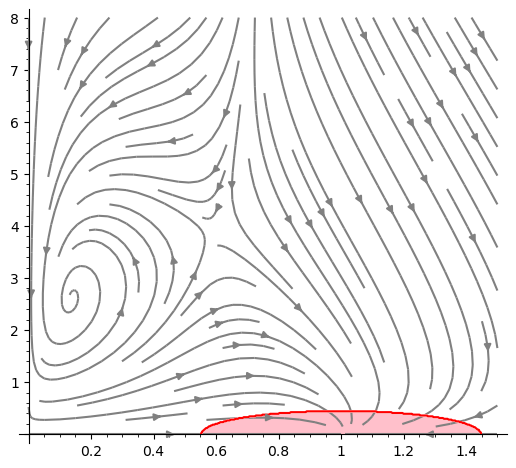

In [11]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Double start jump

In [12]:
P = Atomic((var("Whelk") - 1)^2 + var("Lobster")^2 < 0.2)

In [13]:
Qbox = [RIF(0, 0.3), RIF(1.75, 3.5)]

In [14]:
Q = (  Atomic(var("Whelk") < Qbox[0].upper())
     & Atomic(var("Whelk") > Qbox[0].lower())
     & Atomic(var("Lobster") < Qbox[1].upper())
     & Atomic(var("Lobster") > Qbox[1].lower()) )

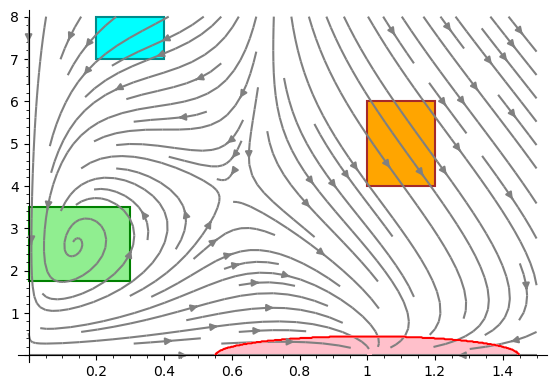

In [15]:
p1 = p
p1 += plot_box(v2, color='orange', edgecolor='brown', thickness=1.5)
p1 += plot_box(Qbox, color='lightgreen', edgecolor='green', thickness=1.5)
p1 += plot_box(v4, color='cyan', edgecolor='darkcyan', thickness=1.5)
p1.set_aspect_ratio(1/8)
p1.save("whelks-phase-portrait.pdf")
p1

## First prop

In [16]:
def plot_reach(s, duration=10, poly=None, color='blue', **kwargs):
    kwargs_ = dict(
        order=5, step=(0.01, 0.5),
        precondition=1,
        estimation=1e-3,
        integrationScheme=2,
        cutoff_threshold=1e-7,
        symbolic_composition=True,
    )
    kwargs_.update(kwargs)
    reach = s.reach(duration, **kwargs_)
    return reach.sage_interval_plot(
        str(s.varmap["Whelk"]), str(s1.varmap["Lobster"]),
        poly=poly)

In [17]:
s1 = m.process("[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 0.4] Whelk || [7, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-mf8ve7d4.py"' ...


In [18]:
s2 = m.process("[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[1, 1.2] Whelk || [4, 6] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-aijfwqnb.py"' ...


In [19]:
s1.varmap["Whelk"]

x1

In [20]:
kwargs = dict(step=(0.01, 0.1), order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

initials = (8.?, 1.?)
var_id_x = 1
var_id_y = 0
initials = (5.?, 1.?)
var_id_x = 1
var_id_y = 0


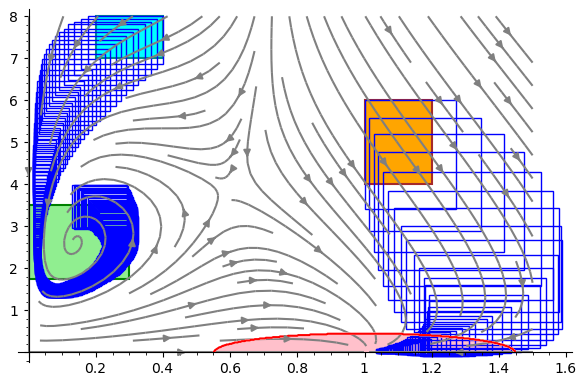

In [21]:
Qplt = p1 + plot_reach(s1, 25, **kwargs)
Qplt += plot_reach(s2, 5, **kwargs)
Qplt.show(aspect_ratio=1/8)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


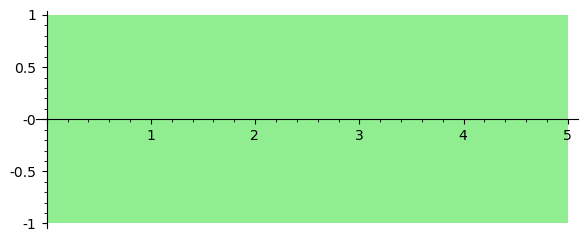

In [22]:
with suppress_stdout():
    sig = F(RIF(0, 10), Q).signal_for_system(s1, 5, **kwargs)

sig.plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


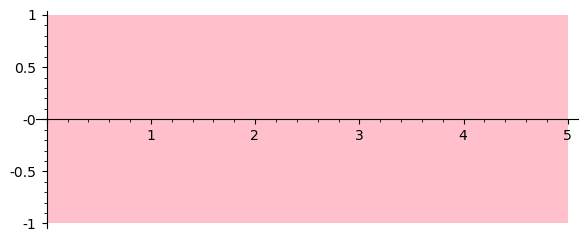

In [23]:
with suppress_stdout():
    sig = F(RIF(0, 10), Q).signal_for_system(s2, 5, **kwargs)

sig.plot()

In [42]:
Q.signal_for_system(s2, 5, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 113 flowpipes in 2.14884644508129 sec
PolyObserver(-x1 + 0.29999999999999999?, <flowstar.reachability.Reach object at 0x7f70e1751b80>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.06 seconds
roots = []
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = []
signal given bool roots: 1 items in 0.00 seconds
PolyObserver(x1, <flowstar.reachability.Reach object at 0

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 5.0000000000000000], False)], mask=None)

In [43]:
F(RIF(0, 5), P).signal_for_system(s2, 5, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 168 flowpipes in 2.943095948023256 sec
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f70e1751a60>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.05 seconds
roots = [[0.77864408243660210 .. 0.77864408243660777], [0.80217535945271223 .. 2.6949521091659161]]
domain = [0.0000000000000000 .. 10.002000000000001]
roots = [[0.77864408243660210 .. 0.77864408243660777], 
 [0.80217535945271223 .

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 5.0000000000000000], True)], mask=None)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


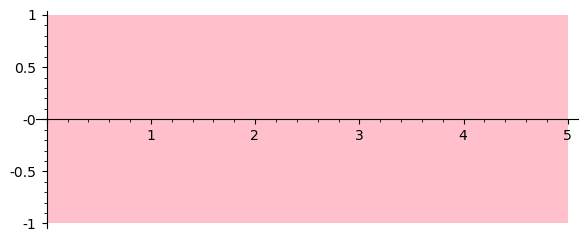

In [24]:
with suppress_stdout():
    sig = F(RIF(0, 5), G(RIF(0, 5), P)).signal_for_system(s1, 5, **kwargs)
    
sig.plot()

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


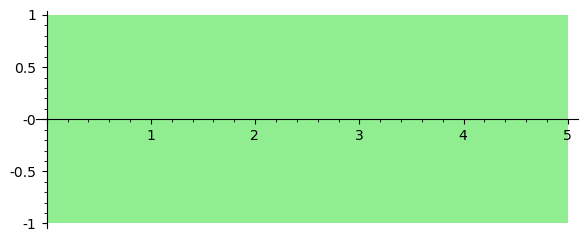

In [25]:
with suppress_stdout():
    sig = F(RIF(0, 5), G(RIF(0, 5), P)).signal_for_system(s2, 5, **kwargs)
    
sig.plot()

In [40]:
G(RIF(0, 5), P).signal_for_system(s2, 5, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 168 flowpipes in 3.075119676068425 sec
In G.signal
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f70e80155e0>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.16 seconds
roots = [[0.77864408243660210 .. 0.77864408243660777], [0.80217535945271223 .. 2.6949521091659161]]
domain = [0.0000000000000000 .. 10.002000000000001]
roots = [[0.77864408243660210 .. 0.77864408243660777], 
 [0.8021753

Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.80217535945271224], False), ([2.6949521091659160 .. 5.0000000000000000], True)], mask=None)

In [26]:
P.signal_for_system(s2, 15, **kwargs)

phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [[4 .. 6], [0.99999999999999988 .. 1.2000000000000004]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.2400000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})))
initials = (5.?, 1.?)
Computed 223 flowpipes in 3.585580966027919 sec
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f70e8015160>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 2.00 seconds
roots = [[0.77864408243660210 .. 0.77864408243660777], [0.80217535945271223 .. 2.6949521091659161]]
domain = [0.0000000000000000 .. 15.001999999999999]
roots = [[0.77864408243660210 .. 0.77864408243660777], 
 [0.80217535945271223 .

Signal([0.0000000000000000 .. 15.000000000000000], [([0.0000000000000000 .. 0.77864408243660211], False), ([0.77864408243660776 .. 0.80217535945271224], False), ([2.6949521091659160 .. 15.000000000000000], True)], mask=None)

## Jump between regions

initials = (8.?, 1.?)
S=[4.?, 0.1?]
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x0
S1=(5.?, 0.1?)
initials = [(None, 4.?), (1.?, 0.1?)]
var_id_x = 1
var_id_y = 0
var_id_x = 1
var_id_y = 0


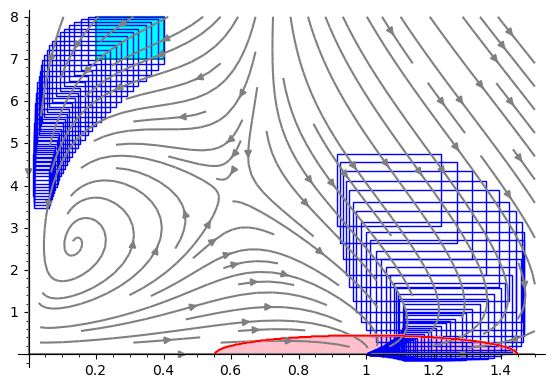

In [27]:
reach = s1.reach(3.5, **kwargs)
S = reach(RIF(3,3.5))
print(f"{S=}")
S1 = vector(S) + vector([RIF(0.9,1.1), 0])
s3 = s1.with_y0(S, [0, RIF(0.9,1.1)])
print(f"{S1=}")
reach1 = s3.reach(10, **kwargs)
p3 = p
p3 += plot_box(v4, color='cyan', edgecolor='darkcyan', thickness=1.5)
p3 += reach.sage_interval_plot(
        str(s1.varmap["Whelk"]),
        str(s1.varmap["Lobster"]))
p3 += reach1.sage_interval_plot(
        str(s1.varmap["Whelk"]),
        str(s1.varmap["Lobster"]))
p3.set_aspect_ratio(1/8)
p3.save("whelks-jump.pdf")
p3

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


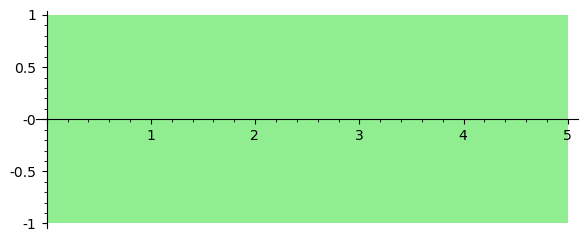

In [28]:
with suppress_stdout():
    sig = U(F(RIF(0, 10), Q), RIF(2,4), "[0.9, 1.1] Whelk" >> F(RIF(0, 5), G(RIF(0, 5), P))).signal_for_system(s1, 5, **kwargs)
    
sig.plot()

In [36]:
s4 = m.process("[0.9, 1.1] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.9, 1.1] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-vzax96ey.py"' ...


Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-dfmigjgz.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-h14li7zq.py"' ...
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x1
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.89999999999999980 .. 1.1000000000000001]], (-0.600000000000000?*x0

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


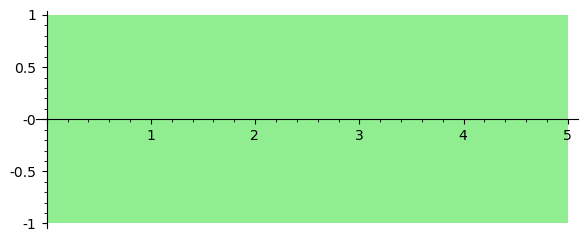

In [37]:
#with suppress_stdout():
sig = ("[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))).signal_for_system(s4, 5, **kwargs)
    
sig.plot()

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-8fdwwrhm.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-j07qwq58.py"' ...
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x1
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.89999999999999980 .. 1.1000000000000001]], (-0.600000000000000?*x0

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


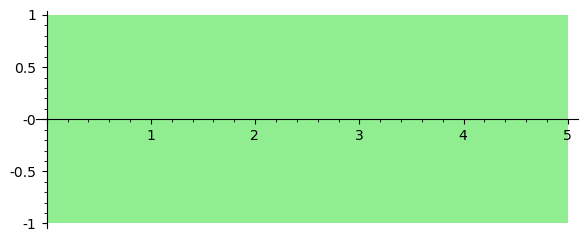

In [38]:
#with suppress_stdout():
sig = ("[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))).signal_for_system(s4, 5, use_masks=True, **kwargs)
    
sig.plot()

In [29]:
s3 = m.process("[0.2, 1.4] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0.2, 1.4] Whelk with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-s6x9dokb.py"' ...


In [31]:
#with suppress_stdout():
sig = ("[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))).signal_for_system(s3, 5, **kwargs)
    
sig.plot()

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-mfk86gep.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-ovw73xc2.py"' ...
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x1
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.19999999999999987 .. 1.4000000000000002]], (-0.600000000000000?*x0

y0=[0, [0.50034124299072657 .. 1.3919863275116263]]
y0_ctx=[[0 .. 2], None]
phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [0, [0.50034124299072657 .. 1.3919863275116263]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.240000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})), y0_ctx=[[0 .. 2], None]))
initials = [(1.?, 0), (None, 1.?)]
y0=[0, [0.50034124299072657 .. 1.3919863275116263]]
y0_ctx=[[0 .. 2], None]
phi variables sfs = {x0, x1}
system sfs = System(R, (x0, x1), [0, [0.50034124299072657 .. 1.3919863275116263]], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.240000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1

limit_output extension: Maximum message size of 10000 exceeded with 11058 characters

In [32]:
#with suppress_stdout():
csig = ("[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))).context_signal_for_system(s3, 5, **kwargs, refjine=1, verbosity=3)

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-q8ytvi_e.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-xoi9sr68.py"' ...
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x1
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.19999999999999987 .. 1.4000000000000002]], (-0.600000000000000?*x0

limit_output extension: Maximum message size of 10000 exceeded with 20460 characters

In [33]:
csig.signal

Signal([0.0000000000000000 .. 5.0000000000000000], [], mask=None)

In [34]:
import time

In [35]:
prop = "[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))

def ctx_ref(prop, system, duration, refine_ctx, refine):
    t0 = time.perf_counter()
    csig = prop.context_signal_for_system(system, duration, **kwargs, refine=refine_ctx, verbosity=0, epsilon_ctx=0.1)
    sig = csig.refined_signal(refine)
    t1 = time.perf_counter()
    return sig, t1 - t0

In [ ]:
ress = [
    [ctx_ref(prop, s3, 5, i, j)
    for i in range(3)]
    for j in range(3)
]

In [38]:
ress

[[(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.7675312500000002 .. 4.8456875000000004], True), ([4.9238437499999996 .. 5.0000000000000000], True)], mask=None),
   147.68072772299638),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   123.07645322999451),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   405.2219143819966)],
 [(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.6112187499999999 .. 5.0000000000000000], True)], mask=None),
   429.63320567199844),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.1422812499999999 .. 5.0000000000000000], True)], mask=None),
   381.8075098699919),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([4.1422812499999999 .. 5.0000000000000000], True)], mask=None),
   1089.1589814269973)],
 [(Signal([0.0000000000000000 .. 5.0000000000000000], [([4.5330624999999997 .. 5.0000000000000000], True)], mask=None),
   972.2100545119902),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([3.9859687499999996 .. 5.0000000000000000], True)], mask=None),
   822.7195987189916),
  (Signal([0.0000000000000000 .. 5.0000000000000000], [([3.9078124999999999 .. 5.0000000000000000], True)], mask=None),
   2046.742695316003)]]

In [39]:
table([[(sig.values[0][0].lower() if len(sig.values) else None)
        for sig, time in res[0:3]]
       for res in ress[0:3]])

4.76753125000000   4.61121874999999   4.61121874999999
  4.61121874999999   4.14228124999999   4.14228124999999
  4.53306249999999   3.98596874999999   3.90781249999999

In [40]:
table([[time for sig, time in res[0:3]]
       for res in ress[0:3]])

147.68072772299638   123.07645322999451   405.2219143819966
  429.63320567199844   381.8075098699919    1089.1589814269973
  972.2100545119902    822.7195987189916    2046.742695316003

In [37]:
#with suppress_stdout():
csig2 = ("[0, 2] Lobster" >> F(RIF(0, 5), G(RIF(0, 5), P))).context_signal_for_system(s3, 5, **kwargs, refine=2, verbosity=3)

Running cmd: 'savesage "([-1 .. 1] Whelk || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000001]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999999 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999999 .. 0.8]); }) || ([0, 2] Lobster)" "/tmp/bond-sage-script-2jwq5ary.py"' ...
Running cmd: 'savesage "[0, 2] Lobster || { growWhelk at rate NLGrowth([0.6 .. 0.6000000000000002]); dieWhelk || beLobster at rate RRPredation([0.3 .. 0.30000000000000004], [0.7999999999999998 .. 0.8]); dieLobster at rate NLDecay([4.9999999999999996e-2 .. 5.0e-2]); beWhelk || growLobster at rate RRPredation(2.0, [0.7999999999999998 .. 0.8]); }" "/tmp/bond-sage-script-g22xyvr1.py"' ...
moving [0.0000000000000000 .. -0.0000000000000000] from ctx to static for x1
phi variables sfs = {x0}
system sfs = System(R, (x0), [[0.39999999999999996 .. 0.50000000000000012]], (-0.600000000000000?*x

time = 0.050001,	step = 0.050001,	order = 6
time = 0.077501,	step = 0.027501,	order = 6
time = 0.107751,	step = 0.030251,	order = 6
time = 0.141026,	step = 0.033276,	order = 6
time = 0.177628,	step = 0.036603,	order = 6
time = 0.217891,	step = 0.040263,	order = 6
time = 0.262180,	step = 0.044290,	order = 6
time = 0.286539,	step = 0.024359,	order = 6
time = 0.313334,	step = 0.026795,	order = 6
time = 0.342808,	step = 0.029475,	order = 6
time = 0.375230,	step = 0.032422,	order = 6
time = 0.410894,	step = 0.035664,	order = 6
time = 0.450124,	step = 0.039231,	order = 6
time = 0.471701,	step = 0.021577,	order = 6
time = 0.495435,	step = 0.023735,	order = 6
time = 0.521543,	step = 0.026108,	order = 6
time = 0.550261,	step = 0.028719,	order = 6
time = 0.581852,	step = 0.031591,	order = 6
time = 0.616601,	step = 0.034750,	order = 6
time = 0.635714,	step = 0.019113,	order = 6
time = 0.656737,	step = 0.021024,	order = 6
time = 0.679863,	step = 0.023126,	order = 6
time = 0.705301,	step = 0.025439

time = 0.050001,	step = 0.050001,	order = 6
time = 0.077501,	step = 0.027501,	order = 6
time = 0.107751,	step = 0.030251,	order = 6
time = 0.141026,	step = 0.033276,	order = 6
time = 0.177628,	step = 0.036603,	order = 6
time = 0.217891,	step = 0.040263,	order = 6
time = 0.240035,	step = 0.022145,	order = 6
time = 0.264394,	step = 0.024359,	order = 6
time = 0.291189,	step = 0.026795,	order = 6
time = 0.320663,	step = 0.029475,	order = 6
time = 0.353085,	step = 0.032422,	order = 6
time = 0.370917,	step = 0.017832,	order = 6
time = 0.390532,	step = 0.019616,	order = 6
time = 0.412109,	step = 0.021577,	order = 6
time = 0.435843,	step = 0.023735,	order = 6
time = 0.461951,	step = 0.026108,	order = 6
time = 0.490670,	step = 0.028719,	order = 6
time = 0.506465,	step = 0.015796,	order = 6
time = 0.523840,	step = 0.017375,	order = 6
time = 0.542952,	step = 0.019113,	order = 6
time = 0.563975,	step = 0.021024,	order = 6
time = 0.587101,	step = 0.023126,	order = 6
time = 0.599820,	step = 0.012720

time = 0.050001,	step = 0.050001,	order = 6
time = 0.077501,	step = 0.027501,	order = 6
time = 0.107751,	step = 0.030251,	order = 6
time = 0.141026,	step = 0.033276,	order = 6
time = 0.177628,	step = 0.036603,	order = 6
time = 0.217891,	step = 0.040263,	order = 6
time = 0.240035,	step = 0.022145,	order = 6
time = 0.264394,	step = 0.024359,	order = 6
time = 0.291189,	step = 0.026795,	order = 6
time = 0.320663,	step = 0.029475,	order = 6
time = 0.353085,	step = 0.032422,	order = 6
time = 0.388749,	step = 0.035664,	order = 6
time = 0.408364,	step = 0.019616,	order = 6
time = 0.429941,	step = 0.021577,	order = 6
time = 0.453675,	step = 0.023735,	order = 6
time = 0.479783,	step = 0.026108,	order = 6
time = 0.508502,	step = 0.028719,	order = 6
time = 0.540092,	step = 0.031591,	order = 6
time = 0.557467,	step = 0.017375,	order = 6
time = 0.576579,	step = 0.019113,	order = 6
time = 0.597603,	step = 0.021024,	order = 6
time = 0.620728,	step = 0.023126,	order = 6
time = 0.646167,	step = 0.025439

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.268653,	step = 0.036603,	order = 6
time = 0.308916,	step = 0.040263,	order = 6
time = 0.353205,	step = 0.044290,	order = 6
time = 0.401923,	step = 0.048718,	order = 6
time = 0.455512,	step = 0.053590,	order = 6
time = 0.514461,	step = 0.058949,	order = 6
time = 0.546883,	step = 0.032422,	order = 6
time = 0.582547,	step = 0.035664,	order = 6
time = 0.621777,	step = 0.039231,	order = 6
time = 0.664931,	step = 0.043154,	order = 6
time = 0.712399,	step = 0.047469,	order = 6
time = 0.764615,	step = 0.052216,	order = 6
time = 0.793334,	step = 0.028719,	order = 6
time = 0.824924,	step = 0.031591,	order = 6
time = 0.859673,	step = 0.034750,	order = 6
time = 0.897898,	step = 0.038225,	order = 6
time = 0.939945,	step = 0.042047,	order = 6
time = 0.986196,	step = 0.046252,	order = 6
time = 1.011635,	step = 0.025439

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.198776,	step = 0.033276,	order = 6
time = 0.235378,	step = 0.036603,	order = 6
time = 0.275641,	step = 0.040263,	order = 6
time = 0.319930,	step = 0.044290,	order = 6
time = 0.368648,	step = 0.048718,	order = 6
time = 0.395443,	step = 0.026795,	order = 6
time = 0.424917,	step = 0.029475,	order = 6
time = 0.457339,	step = 0.032422,	order = 6
time = 0.493003,	step = 0.035664,	order = 6
time = 0.532233,	step = 0.039231,	order = 6
time = 0.575386,	step = 0.043154,	order = 6
time = 0.599121,	step = 0.023735,	order = 6
time = 0.625229,	step = 0.026108,	order = 6
time = 0.653947,	step = 0.028719,	order = 6
time = 0.685538,	step = 0.031591,	order = 6
time = 0.720287,	step = 0.034750,	order = 6
time = 0.739399,	step = 0.019113,	order = 6
time = 0.760423,	step = 0.021024,	order = 6
time = 0.783548,	step = 0.023126,	order = 6
time = 0.808987,	step = 0.025439

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.268653,	step = 0.036603,	order = 6
time = 0.308916,	step = 0.040263,	order = 6
time = 0.353205,	step = 0.044290,	order = 6
time = 0.401923,	step = 0.048718,	order = 6
time = 0.455512,	step = 0.053590,	order = 6
time = 0.484987,	step = 0.029475,	order = 6
time = 0.517409,	step = 0.032422,	order = 6
time = 0.553073,	step = 0.035664,	order = 6
time = 0.592303,	step = 0.039231,	order = 6
time = 0.635456,	step = 0.043154,	order = 6
time = 0.682925,	step = 0.047469,	order = 6
time = 0.709033,	step = 0.026108,	order = 6
time = 0.737751,	step = 0.028719,	order = 6
time = 0.769342,	step = 0.031591,	order = 6
time = 0.804091,	step = 0.034750,	order = 6
time = 0.842316,	step = 0.038225,	order = 6
time = 0.863339,	step = 0.021024,	order = 6
time = 0.886465,	step = 0.023126,	order = 6
time = 0.911903,	step = 0.025439

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.985781,	step = 0.080526,	order = 6
time = 1.030070,	step = 0.044290,	order = 6
time = 1.078788,	step = 0.048718,	order = 6
time = 1.132378,	step = 0.053590,	order = 6
time = 1.191326,	step = 0.058949,	order = 6
time = 1.256170,	step = 0.064844,	order = 6
time = 1.327498,	step = 0.071328,	order = 6
time = 1.366728,	step = 0.039231,	order = 6
time = 1.409882,	step = 0.043154,	order = 6
time = 1.457350,	step = 0.047469,	order = 6
time = 1.509566,	step = 0.052216,	order = 6
time = 1.567003,	step = 0.057438

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.350001,	step = 0.050001,	order = 6
time = 0.405001,	step = 0.055001,	order = 6
time = 0.465501,	step = 0.060501,	order = 6
time = 0.532051,	step = 0.066551,	order = 6
time = 0.605256,	step = 0.073206,	order = 6
time = 0.645518,	step = 0.040263,	order = 6
time = 0.689807,	step = 0.044290,	order = 6
time = 0.738525,	step = 0.048718,	order = 6
time = 0.792115,	step = 0.053590,	order = 6
time = 0.851064,	step = 0.058949,	order = 6
time = 0.915907,	step = 0.064844,	order = 6
time = 0.951571,	step = 0.035664,	order = 6
time = 0.990801,	step = 0.039231,	order = 6
time = 1.033955,	step = 0.043154,	order = 6
time = 1.081424,	step = 0.047469,	order = 6
time = 1.133639,	step = 0.052216,	order = 6
time = 1.162358,	step = 0.028719,	order = 6
time = 1.193948,	step = 0.031591,	order = 6
time = 1.228698,	step = 0.034750,	order = 6
time = 1.266922,	step = 0.038225

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.350001,	step = 0.050001,	order = 6
time = 0.405001,	step = 0.055001,	order = 6
time = 0.465501,	step = 0.060501,	order = 6
time = 0.532051,	step = 0.066551,	order = 6
time = 0.605256,	step = 0.073206,	order = 6
time = 0.645518,	step = 0.040263,	order = 6
time = 0.689807,	step = 0.044290,	order = 6
time = 0.738525,	step = 0.048718,	order = 6
time = 0.792115,	step = 0.053590,	order = 6
time = 0.851064,	step = 0.058949,	order = 6
time = 0.883485,	step = 0.032422,	order = 6
time = 0.919149,	step = 0.035664,	order = 6
time = 0.958380,	step = 0.039231,	order = 6
time = 1.001533,	step = 0.043154,	order = 6
time = 1.049002,	step = 0.047469,	order = 6
time = 1.101217,	step = 0.052216,	order = 6
time = 1.129936,	step = 0.028719,	order = 6
time = 1.161526,	step = 0.031591,	order = 6
time = 1.196276,	step = 0.034750,	order = 6
time = 1.234500,	step = 0.038225

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.550001,	step = 0.050001,	order = 6
time = 1.605001,	step = 0.055001,	order = 6
time = 1.665501,	step = 0.060501,	order = 6
time = 1.732051,	step = 0.066551,	order = 6
time = 1.805256,	step = 0.073206,	order = 6
time = 1.885781,	step = 0.080526,	order = 6
time = 1.930070,	step = 0.044290,	order = 6
time = 1.978788,	step = 0.048718

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.7032084635285014..0.37530819611483746]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.776663908293566..0.41004102015175237]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.8517825952310618..0.4459486023153598]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.00000

detect_roots(T0=[0.0..0.047468729197905235], epsilon=1e-05, verbosity=3)
T = [0.0..0.047468729197905235]
M = [0.023734364598952618..0.023734364598952618]
fI = [-2.735574904757892..0.9929893596623459]
Tfinal = [-0.0..0.047468729197905235]
root on boundary!
merging intervals:
[-0.0..2.3098810890691803]
[2.309881089069168..2.357349818267086]
===
reached detect roots t=[2.3573498182670725..2.357349818267086] + [0.0..0.05221560211769577]
detect_roots(T0=[0.0..0.05221560211769577], epsilon=1e-05, verbosity=3)
T = [0.0..0.05221560211769577]
M = [0.026107801058847885..0.026107801058847885]
fI = [-2.7507115249242924..1.0112724121902996]
Tfinal = [-0.0..0.05221560211769577]
root on boundary!
merging intervals:
[-0.0..2.357349818267086]
[2.3573498182670725..2.409565420384782]
===
reached detect roots t=[2.4095654203847676..2.409565420384782] + [0.0..0.05743716232946536]
detect_roots(T0=[0.0..0.05743716232946536], epsilon=1e-05, verbosity=3)
T = [0.0..0.05743716232946536]
M = [0.02871858116473268.

detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847..0.017679396706318847]
fI = [-2.8977743144745727..1.4400505143132758]
Tfinal = [-0.0..0.035358793412637694]
root on boundary!
merging intervals:
[-0.0..3.466994158699445]
[3.4669941586994093..3.5023529521120826]
===
reached detect roots t=[3.5023529521120462..3.5023529521120826] + [0.0..0.03889467275390147]
detect_roots(T0=[0.0..0.03889467275390147], epsilon=1e-05, verbosity=3)
T = [0.0..0.03889467275390147]
M = [0.019447336376950734..0.019447336376950734]
fI = [-2.8924285141285764..1.4517715828281437]
Tfinal = [-0.0..0.03889467275390147]
root on boundary!
merging intervals:
[-0.0..3.5023529521120826]
[3.5023529521120462..3.5412476248659845]
===
reached detect roots t=[3.5412476248659472..3.5412476248659845] + [0.0..0.04278414002929162]
detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.021392070014

detect_roots(T0=[0.0..0.05267654275660546], epsilon=1e-05, verbosity=3)
T = [0.0..0.05267654275660546]
M = [0.02633827137830273..0.02633827137830273]
fI = [-2.3654702058420787..1.50911884957797]
Tfinal = [-0.0..0.05267654275660546]
root on boundary!
merging intervals:
[-0.0..4.499673056680829]
[4.499673056680759..4.552349599437435]
===
reached detect roots t=[4.552349599437363..4.552349599437435] + [0.0..0.05794419703226601]
detect_roots(T0=[0.0..0.05794419703226601], epsilon=1e-05, verbosity=3)
T = [0.0..0.05794419703226601]
M = [0.028972098516133006..0.028972098516133006]
fI = [-2.326784762054099..1.5035635950374118]
Tfinal = [-0.0..0.05794419703226601]
root on boundary!
merging intervals:
[-0.0..4.552349599437435]
[4.552349599437363..4.610293796469701]
===
reached detect roots t=[4.610293796469628..4.610293796469701] + [0.0..0.03186930836774631]
detect_roots(T0=[0.0..0.03186930836774631], epsilon=1e-05, verbosity=3)
T = [0.0..0.03186930836774631]
M = [0.015934654183873156..0.0159346

detect_roots(T0=[0.0..0.07134185636026841], epsilon=1e-05, verbosity=3)
T = [0.0..0.07134185636026841]
M = [0.035670928180134204..0.035670928180134204]
fI = [-1.3639993669572974..1.167198927101134]
Tfinal = [-0.0..0.07134185636026841]
root on boundary!
merging intervals:
[-0.0..5.712689268001839]
[5.712689268001724..5.784031124362108]
===
reached detect roots t=[5.7840311243619915..5.784031124362108] + [0.0..0.03923802099814763]
detect_roots(T0=[0.0..0.03923802099814763], epsilon=1e-05, verbosity=3)
T = [0.0..0.03923802099814763]
M = [0.019619010499073816..0.019619010499073816]
fI = [-1.2820938900323526..1.1143741561091127]
Tfinal = [-0.0..0.03923802099814763]
root on boundary!
merging intervals:
[-0.0..5.784031124362108]
[5.7840311243619915..5.823269145360256]
===
reached detect roots t=[5.823269145360138..5.823269145360256] + [0.0..0.043161823097962404]
detect_roots(T0=[0.0..0.043161823097962404], epsilon=1e-05, verbosity=3)
T = [0.0..0.043161823097962404]
M = [0.021580911548981202..

detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.18120934540902123..0.48331202532124884]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..7.889723341704425]
[7.889723341704262..7.982244542716417]
===
reached detect roots t=[7.982244542716253..7.982244542716417] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.15944388442436486..0.46958458884029264]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..7.982244542716417]
[7.982244542716253..8.07476574372841]
===
reached detect roots t=[8.074765743728243..8.07476574372841] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626

merging intervals:
[-0.0..3.980732639685405]
[3.9807326396853577..4.011249675853936]
===
reached detect roots t=[4.011249675853887..4.011249675853936] + [0.0..0.033568739785383474]
detect_roots(T0=[0.0..0.033568739785383474], epsilon=1e-05, verbosity=3)
T = [0.0..0.033568739785383474]
M = [0.016784369892691737..0.016784369892691737]
fI = [-2.6892927980001033..1.528693870184319]
Tfinal = [-0.0..0.033568739785383474]
root on boundary!
merging intervals:
[-0.0..4.011249675853936]
[4.011249675853887..4.04481841563932]
===
reached detect roots t=[4.044818415639269..4.04481841563932] + [0.0..0.036925613763921825]
detect_roots(T0=[0.0..0.036925613763921825], epsilon=1e-05, verbosity=3)
T = [0.0..0.036925613763921825]
M = [0.018462806881960912..0.018462806881960912]
fI = [-2.6707318122515438..1.5311455549333461]
Tfinal = [-0.0..0.036925613763921825]
root on boundary!
merging intervals:
[-0.0..4.04481841563932]
[4.044818415639269..4.081744029403242]
===
reached detect roots t=[4.08174402940319.

root on boundary!
merging intervals:
[-0.0..8.167286944740402]
[8.167286944740232..8.259808145752395]
===
reached detect roots t=[8.25980814575222..8.259808145752395] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.1031086162449385..0.4337799615986838]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..8.259808145752395]
[8.25980814575222..8.352329346764387]
===
reached detect roots t=[8.35232934676421..8.352329346764387] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.08706609871946869..0.4235450563639669]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..8.352329346764387]
[8.35232934676421..8.44485054777638]
===
reached detect roots t=[8.4448505477

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.050001,	step = 0.050001,	order = 6
time = 1.105001,	step = 0.055001,	order = 6
time = 1.165501,	step = 0.060501,	order = 6
time = 1.232051,	step = 0.066551,	order = 6
time = 1.305256,	step = 0.073206,	order = 6
time = 1.345518,	step = 0.040263,	order = 6
time = 1.389807,	step = 0.044290,	order = 6
time = 1.438525,	step = 0.048718,	order = 6
time = 1.492115,	step = 0.053590,	order = 6
time = 1.551064,	step = 0.058949,	order = 6
time = 1.615907,	step = 0.064844,	order = 6
time = 1.651571,	step = 0.035664,	order = 6
time = 1.690801,	step = 0.039231

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.945518,	step = 0.040263,	order = 6
time = 0.989807,	step = 0.044290,	order = 6
time = 1.038525,	step = 0.048718,	order = 6
time = 1.092115,	step = 0.053590,	order = 6
time = 1.151064,	step = 0.058949,	order = 6
time = 1.183485,	step = 0.032422,	order = 6
time = 1.219149,	step = 0.035664,	order = 6
time = 1.258380,	step = 0.039231,	order = 6
time = 1.301533,	step = 0.043154,	order = 6
time = 1.349002,	step = 0.047469,	order = 6
time = 1.401217,	step = 0.052216,	order = 6
time = 1.429936,	step = 0.028719

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.150001,	step = 0.050001,	order = 6
time = 2.205001,	step = 0.055001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.6463537908717227..0.26987976773287525]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.7140115598132843..0.2989533216935355]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.7833497527288478..0.3288570974284635]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.00000

detect_roots(T0=[0.0..0.047468729197905235], epsilon=1e-05, verbosity=3)
T = [0.0..0.047468729197905235]
M = [0.023734364598952618..0.023734364598952618]
fI = [-2.7526566738349527..0.9794664946574675]
Tfinal = [-0.0..0.047468729197905235]
root on boundary!
merging intervals:
[-0.0..2.9098810890691817]
[2.909881089069162..2.957349818267087]
===
reached detect roots t=[2.9573498182670668..2.957349818267087] + [0.0..0.05221560211769577]
detect_roots(T0=[0.0..0.05221560211769577], epsilon=1e-05, verbosity=3)
T = [0.0..0.05221560211769577]
M = [0.026107801058847885..0.026107801058847885]
fI = [-2.7629711476253394..0.9998402611161159]
Tfinal = [-0.0..0.05221560211769577]
root on boundary!
merging intervals:
[-0.0..2.957349818267087]
[2.9573498182670668..3.0095654203847833]
===
reached detect roots t=[3.009565420384762..3.0095654203847833] + [0.0..0.05743716232946536]
detect_roots(T0=[0.0..0.05743716232946536], epsilon=1e-05, verbosity=3)
T = [0.0..0.05743716232946536]
M = [0.0287185811647326

detect_roots(T0=[0.0..0.05844428663245898], epsilon=1e-05, verbosity=3)
T = [0.0..0.05844428663245898]
M = [0.02922214331622949..0.02922214331622949]
fI = [-2.558395984028455..1.2959371776088338]
Tfinal = [-0.0..0.05844428663245898]
root on boundary!
merging intervals:
[-0.0..4.070368301094339]
[4.070368301094296..4.128812587726799]
===
reached detect roots t=[4.128812587726754..4.128812587726799] + [0.0..0.06428871529570489]
detect_roots(T0=[0.0..0.06428871529570489], epsilon=1e-05, verbosity=3)
T = [0.0..0.06428871529570489]
M = [0.032144357647852444..0.032144357647852444]
fI = [-2.5255220485450818..1.3012774431146223]
Tfinal = [-0.0..0.06428871529570489]
root on boundary!
merging intervals:
[-0.0..4.128812587726799]
[4.128812587726754..4.193101303022504]
===
reached detect roots t=[4.193101303022458..4.193101303022504] + [0.0..0.035358793412637694]
detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847..0.01

detect_roots(T0=[0.0..0.07915333246672492], epsilon=1e-05, verbosity=3)
T = [0.0..0.07915333246672492]
M = [0.03957666623336246..0.03957666623336246]
fI = [-1.4731660521896632..1.069572360928132]
Tfinal = [-0.0..0.07915333246672492]
root on boundary!
merging intervals:
[-0.0..5.416202014438685]
[5.416202014438598..5.49535534690541]
===
reached detect roots t=[5.495355346905321..5.49535534690541] + [0.0..0.043534332856698714]
detect_roots(T0=[0.0..0.043534332856698714], epsilon=1e-05, verbosity=3)
T = [0.0..0.043534332856698714]
M = [0.021767166428349357..0.021767166428349357]
fI = [-1.388321094421312..1.0248919526683609]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[-0.0..5.49535534690541]
[5.495355346905321..5.538889679762109]
===
reached detect roots t=[5.538889679762018..5.538889679762109] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.023943883071184297..0.02

detect_roots(T0=[0.0..0.09331970876243481], epsilon=1e-05, verbosity=3)
T = [0.0..0.09331970876243481]
M = [0.046659854381217405..0.046659854381217405]
fI = [-0.18298074733719571..0.43963254853174816]
Tfinal = [-0.0..0.09331970876243481]
root on boundary!
merging intervals:
[-0.0..7.486324446161742]
[7.4863244461616105..7.5796441549241775]
===
reached detect roots t=[7.579644154924044..7.5796441549241775] + [0.0..0.09331970876243481]
detect_roots(T0=[0.0..0.09331970876243481], epsilon=1e-05, verbosity=3)
T = [0.0..0.09331970876243481]
M = [0.046659854381217405..0.046659854381217405]
fI = [-0.1557526389954219..0.4242855863155657]
Tfinal = [-0.0..0.09331970876243481]
root on boundary!
merging intervals:
[-0.0..7.5796441549241775]
[7.579644154924044..7.672963863686613]
===
reached detect roots t=[7.672963863686478..7.672963863686613] + [0.0..0.09331970876243481]
detect_roots(T0=[0.0..0.09331970876243481], epsilon=1e-05, verbosity=3)
T = [0.0..0.09331970876243481]
M = [0.046659854381217405

M = [0.023531277016110397..0.023531277016110397]
fI = [-2.393357634795881..1.2864275404064553]
Tfinal = [-0.0..0.047062554032220795]
root on boundary!
merging intervals:
[-0.0..4.310138909218337]
[4.310138909218286..4.357201463250559]
===
reached detect roots t=[4.357201463250505..4.357201463250559] + [0.0..0.05176880943544288]
detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144..0.02588440471772144]
fI = [-2.360106314134188..1.2854052945630101]
Tfinal = [-0.0..0.05176880943544288]
root on boundary!
merging intervals:
[-0.0..4.357201463250559]
[4.357201463250505..4.408970272686002]
===
reached detect roots t=[4.408970272685947..4.408970272686002] + [0.0..0.056945690378987175]
detect_roots(T0=[0.0..0.056945690378987175], epsilon=1e-05, verbosity=3)
T = [0.0..0.056945690378987175]
M = [0.028472845189493588..0.028472845189493588]
fI = [-2.3222666543618065..1.2831294932721944]
Tfinal = [-0.0..0.056945690378987175]


time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.450001,	step = 0.050001,	order = 6
time = 1.505001,	step = 0.055001,	order = 6
time = 1.565501,	step = 0.060501,	order = 6
time = 1.632051,	step = 0.066551,	order = 6
time = 1.705256,	step = 0.073206,	order = 6
time = 1.745518,	step = 0.040263,	order = 6
time = 1.789807,	step = 0.044290,	order = 6
time = 1.838525,	step = 0.048718,	order = 6
time = 1.892115,	step = 0.053590

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.945518,	step = 0.040263,	order = 6
time = 0.989807,	step = 0.044290,	order = 6
time = 1.038525,	step = 0.048718,	order = 6
time = 1.092115,	step = 0.053590,	order = 6
time = 1.151064,	step = 0.058949,	order = 6
time = 1.183485,	step = 0.032422,	order = 6
time = 1.219149,	step = 0.035664,	order = 6
time = 1.258380,	step = 0.039231,	order = 6
time = 1.301533,	step = 0.043154,	order = 6
time = 1.349002,	step = 0.047469,	order = 6
time = 1.401217,	step = 0.052216,	order = 6
time = 1.429936,	step = 0.028719

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5727818512460063..0.31386281481659073]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.6310320873212567..0.34144526277235965]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.689228847750422..0.369470338821831]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.000000

detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.02435896375000003..0.02435896375000003]
fI = [-2.1781165522073125..0.8578392838523674]
Tfinal = [-0.0..0.04871792750000006]
root on boundary!
merging intervals:
[-0.0..2.8743585500000037]
[2.8743585499999877..2.923076477500004]
===
reached detect roots t=[2.923076477499987..2.923076477500004] + [0.0..0.05358972025000008]
detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-2.1736113684000116..0.870276178985882]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..2.923076477500004]
[2.923076477499987..2.976666197750004]
===
reached detect roots t=[2.9766661977499864..2.976666197750004] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.0294

detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935]
fI = [-1.2971291783232184..0.8494395128083142]
Tfinal = [-0.0..0.0991443310732187]
root on boundary!
merging intervals:
[-0.0..4.570105102267126]
[4.570105102267082..4.669249433340346]
===
reached detect roots t=[4.669249433340299..4.669249433340346] + [0.0..0.0991443310732187]
detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935]
fI = [-1.2258252330353994..0.8300624813892115]
Tfinal = [-0.0..0.0991443310732187]
root on boundary!
merging intervals:
[-0.0..4.669249433340346]
[4.669249433340299..4.768393764413565]
===
reached detect roots t=[4.768393764413517..4.768393764413565] + [0.0..0.0991443310732187]
detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935

detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935]
fI = [-0.188503855217504..0.4099808478231488]
Tfinal = [-0.0..0.0991443310732187]
root on boundary!
merging intervals:
[-0.0..6.552991723731514]
[6.552991723731434..6.652136054804734]
===
reached detect roots t=[6.652136054804652..6.652136054804734] + [0.0..0.0991443310732187]
detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935]
fI = [-0.15862822088350337..0.3955729523034368]
Tfinal = [-0.0..0.0991443310732187]
root on boundary!
merging intervals:
[-0.0..6.652136054804734]
[6.652136054804652..6.751280385877953]
===
reached detect roots t=[6.75128038587787..6.751280385877953] + [0.0..0.0991443310732187]
detect_roots(T0=[0.0..0.0991443310732187], epsilon=1e-05, verbosity=3)
T = [0.0..0.0991443310732187]
M = [0.04957216553660935..0.04957216553660935]

fI = [-1.961294955528172..0.5130584679855563]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.400000000000001]
[1.3999999999999977..1.500000000000001]
===
reached detect roots t=[1.4999999999999973..1.500000000000001] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.008628851863717..0.5420036397034595]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.500000000000001]
[1.4999999999999973..1.6000000000000012]
===
reached detect roots t=[1.599999999999997..1.6000000000000012] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.052362978111667..0.5706661189338134]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.6000000000000012]
[1.599999999999997..1.7000000000000013]
===
reached detect roots t=[1.6999999999999966..1.7000000000000013] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]


signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 10.006000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 10.006000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=6, estimation=0.000100000000000000, cutoff_threshold=1.00000000000000e-15, integr

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.350001,	step = 0.050001,	order = 6
time = 0.405001,	step = 0.055001,	order = 6
time = 0.465501,	step = 0.060501,	order = 6
time = 0.532051,	step = 0.066551,	order = 6
time = 0.605256,	step = 0.073206,	order = 6
time = 0.645518,	step = 0.040263,	order = 6
time = 0.689807,	step = 0.044290,	order = 6
time = 0.738525,	step = 0.048718,	order = 6
time = 0.792115,	step = 0.053590,	order = 6
time = 0.851064,	step = 0.058949,	order = 6
time = 0.915907,	step = 0.064844,	order = 6
time = 0.951571,	step = 0.035664,	order = 6
time = 0.990801,	step = 0.039231,	order = 6
time = 1.033955,	step = 0.043154,	order = 6
time = 1.081424,	step = 0.047469,	order = 6
time = 1.133639,	step = 0.052216,	order = 6
time = 1.191076,	step = 0.057438,	order = 6
time = 1.222667,	step = 0.031591,	order = 6
time = 1.257416,	step = 0.034750,	order = 6
time = 1.295641,	step = 0.038225

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.050001,	step = 0.050001,	order = 6
time = 2.105001,	step = 0.055001,	order = 6
time = 2.165501,	step = 0.060501

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5292810702441306..0.4360784050215777]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5774974700503663..0.46481145166055604]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.6236641564382372..0.49355765674133245]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000

detect_roots(T0=[0.0..0.07846070941802515], epsilon=1e-05, verbosity=3)
T = [0.0..0.07846070941802515]
M = [0.03923035470901257..0.03923035470901257]
fI = [-1.7735493103653004..0.8871811394338914]
Tfinal = [-0.0..0.07846070941802515]
root on boundary!
merging intervals:
[-0.0..2.771786369180255]
[2.771786369180238..2.8502470785982803]
===
reached detect roots t=[2.8502470785982625..2.8502470785982803] + [0.0..0.08630678035982768]
detect_roots(T0=[0.0..0.08630678035982768], epsilon=1e-05, verbosity=3)
T = [0.0..0.08630678035982768]
M = [0.04315339017991384..0.04315339017991384]
fI = [-1.7488612119360591..0.8949467311781393]
Tfinal = [-0.0..0.08630678035982768]
root on boundary!
merging intervals:
[-0.0..2.8502470785982803]
[2.8502470785982625..2.936553858958108]
===
reached detect roots t=[2.9365538589580895..2.936553858958108] + [0.0..0.047468729197905235]
detect_roots(T0=[0.0..0.047468729197905235], epsilon=1e-05, verbosity=3)
T = [0.0..0.047468729197905235]
M = [0.023734364598952618.

detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.5842034381204309..0.6089864618508694]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..4.959450923166202]
[4.959450923166152..5.0519540474694296]
===
reached detect roots t=[5.051954047469378..5.0519540474694296] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.5362015780532008..0.5870934313968812]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..5.0519540474694296]
[5.051954047469378..5.1444571717726575]
===
reached detect roots t=[5.144457171772604..5.1444571717726575] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04

T = [0.0..0.07644886306051843]
M = [0.038224431530259215..0.038224431530259215]
fI = [-1.5757927283019877..0.8881980025680088]
Tfinal = [-0.0..0.07644886306051843]
root on boundary!
merging intervals:
[-0.0..3.226355197584241]
[3.2263551975842177..3.3028040606447595]
===
reached detect roots t=[3.3028040606447355..3.3028040606447595] + [0.0..0.08409374936657028]
detect_roots(T0=[0.0..0.08409374936657028], epsilon=1e-05, verbosity=3)
T = [0.0..0.08409374936657028]
M = [0.04204687468328514..0.04204687468328514]
fI = [-1.535798968929642..0.8849318287553047]
Tfinal = [-0.0..0.08409374936657028]
root on boundary!
merging intervals:
[-0.0..3.3028040606447595]
[3.3028040606447355..3.38689781001133]
===
reached detect roots t=[3.386897810011305..3.38689781001133] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-1.4911894681250362..0.8805026352645322]
Tfinal =

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 0.950001,	step = 0.050001,	order = 6
time = 1.005001,	step = 0.055001,	order = 6
time = 1.065501,	step = 0.060501,	order = 6
time = 1.132051,	step = 0.066551,	order = 6
time = 1.205256,	step = 0.073206,	order = 6
time = 1.285781,	step = 0.080526,	order = 6
time = 1.330070,	step = 0.044290,	order = 6
time = 1.378788,	step = 0.048718,	order = 6
time = 1.432378,	step = 0.053590,	order = 6
time = 1.491326,	step = 0.058949,	order = 6
time = 1.556170,	step = 0.064844,	order = 6
time = 1.591834,	step = 0.035664,	order = 6
time = 1.631064,	step = 0.039231,	order = 6
time = 1.674218,	step = 0.043154

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.945518,	step = 0.040263,	order = 6
time = 0.989807,	step = 0.044290,	order = 6
time = 1.038525,	step = 0.048718,	order = 6
time = 1.092115,	step = 0.053590,	order = 6
time = 1.151064,	step = 0.058949,	order = 6
time = 1.215907,	step = 0.064844,	order = 6
time = 1.251571,	step = 0.035664,	order = 6
time = 1.290801,	step = 0.039231,	order = 6
time = 1.333955,	step = 0.043154,	order = 6
time = 1.381424,	step = 0.047469,	order = 6
time = 1.433639,	step = 0.052216,	order = 6
time = 1.491076,	step = 0.057438

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.795840227161275..0.5589506070224589]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.6000000000000012]
[1.599999999999997..1.7000000000000013]
===
reached detect roots t=[1.6999999999999966..1.7000000000000013] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.8123862505399506..0.5803954402405228]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.7000000000000013]
[1.6999999999999966..1.8000000000000014]
===
reached detect roots t=[1.7999999999999963..1.8000000000000014] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.8233630497467643..0.6005061327371187]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.8000000000000014]
[1.7999999999999963..1.9000000000000015]
===
reached detect roots t=[1.899999999999996..1.90000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.7956472444238685..0.6226572816125485]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.500000000000006]
[4.499999999999973..4.600000000000007]
===
reached detect roots t=[4.599999999999972..4.600000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.7393690971336326..0.6051999733909861]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.600000000000007]
[4.599999999999972..4.700000000000007]
===
reached detect roots t=[4.699999999999971..4.700000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.6844714301181885..0.587318531458478]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.700000000000007]
[4.699999999999971..4.800000000000008]
===
reached detect roots t=[4.79999999999997..4.800000000000008] + [0

===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5715745898807805..0.3945486589770484]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.6134455077529057..0.4192946222591284]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.6527169263448798..0.4438405167793029]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.1000000000000008]
[1.09999999999999

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.450001,	step = 0.050001,	order = 6
time = 1.505001,	step = 0.055001,	order = 6
time = 1.565501,	step = 0.060501,	order = 6
time = 1.632051,	step = 0.066551,	order = 6
time = 1.705256,	step = 0.073206,	order = 6
time = 1.785781,	step = 0.080526,	order = 6
time = 1.830070,	step = 0.044290,	order = 6
time = 1.878788,	step = 0.048718,	order = 6
time = 1.932378,	step = 0.053590

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.750001,	step = 0.050001,	order = 6
time = 0.805001,	step = 0.055001,	order = 6
time = 0.865501,	step = 0.060501,	order = 6
time = 0.932051,	step = 0.066551,	order = 6
time = 1.005256,	step = 0.073206,	order = 6
time = 1.085781,	step = 0.080526,	order = 6
time = 1.130070,	step = 0.044290,	order = 6
time = 1.178788,	step = 0.048718,	order = 6
time = 1.232378,	step = 0.053590,	order = 6
time = 1.291326,	step = 0.058949,	order = 6
time = 1.356170,	step = 0.064844,	order = 6
time = 1.391834,	step = 0.035664,	order = 6
time = 1.431064,	step = 0.039231,	order = 6
time = 1.474218,	step = 0.043154,	order = 6
time = 1.521686,	step = 0.047469,	order = 6
time = 1.573902,	step = 0.052216

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.537072175661943..0.5499727540744404]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.7000000000000013]
[1.6999999999999966..1.8000000000000014]
===
reached detect roots t=[1.7999999999999963..1.8000000000000014] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5292546086168375..0.5629585650976876]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.8000000000000014]
[1.7999999999999963..1.9000000000000015]
===
reached detect roots t=[1.899999999999996..1.9000000000000015] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.518900154787781..0.5756684658674895]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.9000000000000015]
[1.899999999999996..2.0000000000000018]
===
reached detect roots t=[1.9999999999999956..2.000000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.5857249006670752..0.5173793930820069]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.200000000000005]
[4.199999999999977..4.300000000000005]
===
reached detect roots t=[4.299999999999976..4.300000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.539072679402999..0.5033015542687317]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.300000000000005]
[4.299999999999976..4.400000000000006]
===
reached detect roots t=[4.399999999999975..4.400000000000006] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.4937830772814824..0.4889985104543748]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.400000000000006]
[4.399999999999975..4.500000000000006]
===
reached detect roots t=[4.499999999999973..4.500000000000006] + [

reached detect roots t=[5.499999999999961..5.5000000000000115] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.10935351794740578..0.34538124945292226]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..5.5000000000000115]
[5.499999999999961..5.600000000000012]
===
reached detect roots t=[5.59999999999996..5.600000000000012] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.08654544503950012..0.3365358418814953]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..5.600000000000012]
[5.59999999999996..5.700000000000013]
===
reached detect roots t=[5.699999999999958..5.700000000000013] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.06529045627148955..0.3281577042078805]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..5.700000000000013]
[5.699999999999958..5.800000

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.550001,	step = 0.050001,	order = 6
time = 1.605001,	step = 0.055001,	order = 6
time = 1.665501,	step = 0.060501,	order = 6
time = 1.732051,	step = 0.066551,	order = 6
time = 1.805256,	step = 0.073206,	order = 6
time = 1.885781,	step = 0.080526,	order = 6
time = 1.930070,	step = 0.044290,	order = 6
time = 1.978788,	step = 0.048718

detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.03242178075125005..0.03242178075125005]
fI = [-5.775901339493832..0.11194774275261854]
Tfinal = [-0.0..0.0648435615025001]
root on boundary!
merging intervals:
[1.9300695249999953..2.091325865025003]
[2.091325865024994..2.1561694265275033]
===
reached detect roots t=[2.1561694265274935..2.1561694265275033] + [0.0..0.07132791765275012]
detect_roots(T0=[0.0..0.07132791765275012], epsilon=1e-05, verbosity=3)
T = [0.0..0.07132791765275012]
M = [0.03566395882637506..0.03566395882637506]
fI = [-5.76068584842117..0.1477253168607504]
Tfinal = [-0.0..0.07132791765275012]
root on boundary!
merging intervals:
[1.9300695249999953..2.1561694265275033]
[2.1561694265274935..2.2274973441802537]
===
reached detect roots t=[2.227497344180243..2.2274973441802537] + [0.0..0.03923035470901257]
detect_roots(T0=[0.0..0.03923035470901257], epsilon=1e-05, verbosity=3)
T = [0.0..0.03923035470901257]
M = [

detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-5.392342406299981..0.4802001349802736]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[1.9300695249999953..2.986214430668478]
[2.9862144306684524..3.035786596205088]
===
reached detect roots t=[3.035786596205061..3.035786596205088] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-5.34786641796457..0.4899162061135357]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
merging intervals:
[1.9300695249999953..3.035786596205088]
[3.035786596205061..3.0903159782953584]
===
reached detect roots t=[3.090315978295331..3.0903159782953584] + [0.0..0.029991160149648664]
detect_roots(T0=[0.0..0.029991160149648664], epsilon=1e-05, verbosity=3)
T = [0.0..0.029991160149648664]


detect_roots(T0=[0.0..0.030517036168530427], epsilon=1e-05, verbosity=3)
T = [0.0..0.030517036168530427]
M = [0.015258518084265213..0.015258518084265213]
fI = [-4.040980220253348..0.9282712392747511]
Tfinal = [-0.0..0.030517036168530427]
root on boundary!
merging intervals:
[1.9300695249999953..3.9499522250735057]
[3.9499522250734587..3.9804692612420363]
===
reached detect roots t=[3.9804692612419883..3.9804692612420363] + [0.0..0.033568739785383474]
detect_roots(T0=[0.0..0.033568739785383474], epsilon=1e-05, verbosity=3)
T = [0.0..0.033568739785383474]
M = [0.016784369892691737..0.016784369892691737]
fI = [-3.987096315250221..0.9439039160128132]
Tfinal = [-0.0..0.033568739785383474]
root on boundary!
merging intervals:
[1.9300695249999953..3.9804692612420363]
[3.9804692612419883..4.01403800102742]
===
reached detect roots t=[4.01403800102737..4.01403800102742] + [0.0..0.036925613763921825]
detect_roots(T0=[0.0..0.036925613763921825], epsilon=1e-05, verbosity=3)
T = [0.0..0.03692561376

detect_roots(T0=[0.0..0.03757308103974725], epsilon=1e-05, verbosity=3)
T = [0.0..0.03757308103974725]
M = [0.018786540519873624..0.018786540519873624]
fI = [-2.2245162133328176..1.0038561607484284]
Tfinal = [-0.0..0.03757308103974725]
root on boundary!
merging intervals:
[1.9300695249999953..4.978124572575517]
[4.978124572575428..5.015697653615264]
===
reached detect roots t=[5.015697653615174..5.015697653615264] + [0.0..0.04133038914372198]
detect_roots(T0=[0.0..0.04133038914372198], epsilon=1e-05, verbosity=3)
T = [0.0..0.04133038914372198]
M = [0.02066519457186099..0.02066519457186099]
fI = [-2.1654510630213073..0.9970175089539746]
Tfinal = [-0.0..0.04133038914372198]
root on boundary!
merging intervals:
[1.9300695249999953..5.015697653615264]
[5.015697653615174..5.057028042758986]
===
reached detect roots t=[5.057028042758894..5.057028042758986] + [0.0..0.04546342805809419]
detect_roots(T0=[0.0..0.04546342805809419], epsilon=1e-05, verbosity=3)
T = [0.0..0.04546342805809419]
M = [

detect_roots(T0=[0.0..0.0949560108155173], epsilon=1e-05, verbosity=3)
T = [0.0..0.0949560108155173]
M = [0.04747800540775865..0.04747800540775865]
fI = [-0.6451151616955636..0.5775908482062956]
Tfinal = [-0.0..0.0949560108155173]
root on boundary!
merging intervals:
[1.9300695249999953..6.279798701186917]
[6.279798701186793..6.374754712002435]
===
reached detect roots t=[6.374754712002309..6.374754712002435] + [0.0..0.0949560108155173]
detect_roots(T0=[0.0..0.0949560108155173], epsilon=1e-05, verbosity=3)
T = [0.0..0.0949560108155173]
M = [0.04747800540775865..0.04747800540775865]
fI = [-0.5770531788163377..0.5530799162798116]
Tfinal = [-0.0..0.0949560108155173]
root on boundary!
merging intervals:
[1.9300695249999953..6.374754712002435]
[6.374754712002309..6.469710722817953]
===
reached detect roots t=[6.469710722817825..6.469710722817953] + [0.0..0.0949560108155173]
detect_roots(T0=[0.0..0.0949560108155173], epsilon=1e-05, verbosity=3)
T = [0.0..0.0949560108155173]
M = [0.0474780054

detect_roots(T0=[0.0..0.0949560108155173], epsilon=1e-05, verbosity=3)
T = [0.0..0.0949560108155173]
M = [0.04747800540775865..0.04747800540775865]
fI = [-0.002034961712037431..0.33056286146624125]
Tfinal = [-0.0..0.0949560108155173]
root on boundary!
merging intervals:
[1.9300695249999953..8.08396290668176]
[8.0839629066816..8.17891891749728]
===
reached detect roots t=[8.178918917497116..8.17891891749728] + [0.0..0.0949560108155173]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.273874928312631..8.273874928312798] + [0.0..0.0949560108155173]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.368830939128147..8.368830939128317] + [0.0..0.0949560108155173]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.463786949943662..8.463786949943836] + [0.0..0.0949560108155173]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=

===
reached detect roots t=[4.943967226175659..4.943967226175746] + [0.0..0.03415734639977022]
detect_roots(T0=[0.0..0.03415734639977022], epsilon=1e-05, verbosity=3)
T = [0.0..0.03415734639977022]
M = [0.01707867319988511..0.01707867319988511]
fI = [-2.279203211335192..1.0097392029420975]
Tfinal = [-0.0..0.03415734639977022]
root on boundary!
merging intervals:
[1.9300695249999953..4.943967226175746]
[4.943967226175659..4.978124572575517]
===
reached detect roots t=[4.978124572575428..4.978124572575517] + [0.0..0.03757308103974725]
detect_roots(T0=[0.0..0.03757308103974725], epsilon=1e-05, verbosity=3)
T = [0.0..0.03757308103974725]
M = [0.018786540519873624..0.018786540519873624]
fI = [-2.2245162133328176..1.0038561607484284]
Tfinal = [-0.0..0.03757308103974725]
root on boundary!
merging intervals:
[1.9300695249999953..4.978124572575517]
[4.978124572575428..5.015697653615264]
===
reached detect roots t=[5.015697653615174..5.015697653615264] + [0.0..0.04133038914372198]
detect_roots(T

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.305256,	step = 0.073206,	order = 6
time = 0.385781,	step = 0.080526,	order = 6
time = 0.430070,	step = 0.044290,	order = 6
time = 0.478788,	step = 0.048718,	order = 6
time = 0.532378,	step = 0.053590,	order = 6
time = 0.591326,	step = 0.058949,	order = 6
time = 0.656170,	step = 0.064844,	order = 6
time = 0.691834,	step = 0.035664,	order = 6
time = 0.731064,	step = 0.039231,	order = 6
time = 0.774218,	step = 0.043154,	order = 6
time = 0.821686,	step = 0.047469,	order = 6
time = 0.873902,	step = 0.052216,	order = 6
time = 0.931339,	step = 0.057438,	order = 6
time = 0.962930,	step = 0.031591,	order = 6
time = 0.997679,	step = 0.034750,	order = 6
time = 1.035903,	step = 0.038225,	order = 6
time = 1.077950,	step = 0.042047,	order = 6
time = 1.124202,	step = 0.046252,	order = 6
time = 1.175079,	step = 0.050877

detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.02435896375000003..0.02435896375000003]
fI = [-4.833000524440621..0.7981701073159653]
Tfinal = [-0.0..0.04871792750000006]
root on boundary!
merging intervals:
[-0.0..0.4300695250000004]
[0.43006952499999995..0.4787874525000005]
===
reached detect roots t=[0.47878745249999993..0.4787874525000005] + [0.0..0.05358972025000008]
detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-4.9043262659495825..0.8500480711528736]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..0.4787874525000005]
[0.47878745249999993..0.5323771727500006]
===
reached detect roots t=[0.5323771727499998..0.5323771727500006] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.0294743461375000

detect_roots(T0=[0.0..0.036289303781074894], epsilon=1e-05, verbosity=3)
T = [0.0..0.036289303781074894]
M = [0.018144651890537447..0.018144651890537447]
fI = [-5.491536603335504..1.7547029713251654]
Tfinal = [-0.0..0.036289303781074894]
root on boundary!
merging intervals:
[-0.0..1.5060100475868685]
[1.5060100475868594..1.5422993513679435]
===
reached detect roots t=[1.542299351367934..1.5422993513679435] + [0.0..0.03991823415918239]
detect_roots(T0=[0.0..0.03991823415918239], epsilon=1e-05, verbosity=3)
T = [0.0..0.03991823415918239]
M = [0.019959117079591197..0.019959117079591197]
fI = [-5.49911779484663..1.791335972152025]
Tfinal = [-0.0..0.03991823415918239]
root on boundary!
merging intervals:
[-0.0..1.5422993513679435]
[1.542299351367934..1.582217585527126]
===
reached detect roots t=[1.582217585527116..1.582217585527126] + [0.0..0.04391005757510064]
detect_roots(T0=[0.0..0.04391005757510064], epsilon=1e-05, verbosity=3)
T = [0.0..0.04391005757510064]
M = [0.02195502878755032..0

detect_roots(T0=[0.0..0.024573995959889988], epsilon=1e-05, verbosity=3)
T = [0.0..0.024573995959889988]
M = [0.012286997979944994..0.012286997979944994]
fI = [-5.301240628933494..2.365634362090347]
Tfinal = [-0.0..0.024573995959889988]
root on boundary!
merging intervals:
[-0.0..2.277201395110438]
[2.277201395110413..2.3017753910703282]
===
reached detect roots t=[2.3017753910703025..2.3017753910703282] + [0.0..0.027031395555878992]
detect_roots(T0=[0.0..0.027031395555878992], epsilon=1e-05, verbosity=3)
T = [0.0..0.027031395555878992]
M = [0.013515697777939496..0.013515697777939496]
fI = [-5.286041977431199..2.3826274821420217]
Tfinal = [-0.0..0.027031395555878992]
root on boundary!
merging intervals:
[-0.0..2.3017753910703282]
[2.3017753910703025..2.3288067866262074]
===
reached detect roots t=[2.328806786626181..2.3288067866262074] + [0.0..0.029734535111466894]
detect_roots(T0=[0.0..0.029734535111466894], epsilon=1e-05, verbosity=3)
T = [0.0..0.029734535111466894]
M = [0.0148672675

detect_roots(T0=[0.0..0.018786540519873624], epsilon=1e-05, verbosity=3)
T = [0.0..0.018786540519873624]
M = [0.009393270259936812..0.009393270259936812]
fI = [-4.73274115197531..2.5035851164152443]
Tfinal = [-0.0..0.018786540519873624]
root on boundary!
merging intervals:
[-0.0..2.7978848927006914]
[2.7978848927006497..2.816671433220565]
===
reached detect roots t=[2.8166714332205225..2.816671433220565] + [0.0..0.02066519457186099]
detect_roots(T0=[0.0..0.02066519457186099], epsilon=1e-05, verbosity=3)
T = [0.0..0.02066519457186099]
M = [0.010332597285930495..0.010332597285930495]
fI = [-4.712119295740552..2.508409413057037]
Tfinal = [-0.0..0.02066519457186099]
root on boundary!
merging intervals:
[-0.0..2.816671433220565]
[2.8166714332205225..2.837336627792426]
===
reached detect roots t=[2.8373366277923826..2.837336627792426] + [0.0..0.022731714029047095]
detect_roots(T0=[0.0..0.022731714029047095], epsilon=1e-05, verbosity=3)
T = [0.0..0.022731714029047095]
M = [0.01136585701452354

detect_roots(T0=[0.0..0.03078642963674031], epsilon=1e-05, verbosity=3)
T = [0.0..0.03078642963674031]
M = [0.015393214818370155..0.015393214818370155]
fI = [-3.8198682617251247..2.4457615941663526]
Tfinal = [-0.0..0.03078642963674031]
root on boundary!
merging intervals:
[-0.0..3.488281658887828]
[3.4882816588877623..3.5190680885245684]
===
reached detect roots t=[3.519068088524502..3.5190680885245684] + [0.0..0.033865072600414346]
detect_roots(T0=[0.0..0.033865072600414346], epsilon=1e-05, verbosity=3)
T = [0.0..0.033865072600414346]
M = [0.016932536300207173..0.016932536300207173]
fI = [-3.781626721156679..2.4413574226162087]
Tfinal = [-0.0..0.033865072600414346]
root on boundary!
merging intervals:
[-0.0..3.5190680885245684]
[3.519068088524502..3.552933161124983]
===
reached detect roots t=[3.5529331611249155..3.552933161124983] + [0.0..0.03725157986045579]
detect_roots(T0=[0.0..0.03725157986045579], epsilon=1e-05, verbosity=3)
T = [0.0..0.03725157986045579]
M = [0.0186257899302278

detect_roots(T0=[0.0..0.028478409275399512], epsilon=1e-05, verbosity=3)
T = [0.0..0.028478409275399512]
M = [0.014239204637699756..0.014239204637699756]
fI = [-2.9705081608305424..2.1719983326798635]
Tfinal = [-0.0..0.028478409275399512]
root on boundary!
merging intervals:
[-0.0..4.083677822813572]
[4.083677822813484..4.112156232088972]
===
reached detect roots t=[4.112156232088882..4.112156232088972] + [0.0..0.03132625020293947]
detect_roots(T0=[0.0..0.03132625020293947], epsilon=1e-05, verbosity=3)
T = [0.0..0.03132625020293947]
M = [0.015663125101469735..0.015663125101469735]
fI = [-2.936546729524367..2.161444513488391]
Tfinal = [-0.0..0.03132625020293947]
root on boundary!
merging intervals:
[-0.0..4.112156232088972]
[4.112156232088882..4.143482482291912]
===
reached detect roots t=[4.14348248229182..4.143482482291912] + [0.0..0.034458875223233425]
detect_roots(T0=[0.0..0.034458875223233425], epsilon=1e-05, verbosity=3)
T = [0.0..0.034458875223233425]
M = [0.017229437611616712..0

detect_roots(T0=[0.0..0.028977760164765096], epsilon=1e-05, verbosity=3)
T = [0.0..0.028977760164765096]
M = [0.014488880082382548..0.014488880082382548]
fI = [-2.028780056335888..1.7330782677652712]
Tfinal = [-0.0..0.028977760164765096]
root on boundary!
merging intervals:
[-0.0..4.8272173110668195]
[4.8272173110666925..4.856195071231585]
===
reached detect roots t=[4.856195071231456..4.856195071231585] + [0.0..0.03187553618124161]
detect_roots(T0=[0.0..0.03187553618124161], epsilon=1e-05, verbosity=3)
T = [0.0..0.03187553618124161]
M = [0.015937768090620804..0.015937768090620804]
fI = [-2.0036426268001706..1.7231115979409666]
Tfinal = [-0.0..0.03187553618124161]
root on boundary!
merging intervals:
[-0.0..4.856195071231585]
[4.856195071231456..4.888070607412827]
===
reached detect roots t=[4.888070607412696..4.888070607412827] + [0.0..0.035063089799365774]
detect_roots(T0=[0.0..0.035063089799365774], epsilon=1e-05, verbosity=3)
T = [0.0..0.035063089799365774]
M = [0.01753154489968288

detect_roots(T0=[0.0..0.05897173371210822], epsilon=1e-05, verbosity=3)
T = [0.0..0.05897173371210822]
M = [0.02948586685605411..0.02948586685605411]
fI = [-1.3545737863156981..1.4045595309484178]
Tfinal = [-0.0..0.05897173371210822]
root on boundary!
merging intervals:
[-0.0..5.712122569309219]
[5.712122569309053..5.771094303021328]
===
reached detect roots t=[5.77109430302116..5.771094303021328] + [0.0..0.032434453541659525]
detect_roots(T0=[0.0..0.032434453541659525], epsilon=1e-05, verbosity=3)
T = [0.0..0.032434453541659525]
M = [0.016217226770829762..0.016217226770829762]
fI = [-1.2731550643695353..1.340269206981896]
Tfinal = [-0.0..0.032434453541659525]
root on boundary!
merging intervals:
[-0.0..5.771094303021328]
[5.77109430302116..5.803528756562987]
===
reached detect roots t=[5.803528756562818..5.803528756562987] + [0.0..0.03567789889582548]
detect_roots(T0=[0.0..0.03567789889582548], epsilon=1e-05, verbosity=3)
T = [0.0..0.03567789889582548]
M = [0.01783894944791274..0.0178

detect_roots(T0=[0.0..0.0495915419449815], epsilon=1e-05, verbosity=3)
T = [0.0..0.0495915419449815]
M = [0.02479577097249075..0.02479577097249075]
fI = [-0.9703199764893906..1.197733793403884]
Tfinal = [-0.0..0.0495915419449815]
root on boundary!
merging intervals:
[-0.0..6.566617516653708]
[6.566617516653507..6.61620905859869]
===
reached detect roots t=[6.6162090585984865..6.61620905859869] + [0.0..0.05455069613947966]
detect_roots(T0=[0.0..0.05455069613947966], epsilon=1e-05, verbosity=3)
T = [0.0..0.05455069613947966]
M = [0.02727534806973983..0.02727534806973983]
fI = [-0.9636504848781953..1.198364764824648]
Tfinal = [-0.0..0.05455069613947966]
root on boundary!
merging intervals:
[-0.0..6.61620905859869]
[6.6162090585984865..6.67075975473817]
===
reached detect roots t=[6.670759754737965..6.67075975473817] + [0.0..0.060005765753427635]
detect_roots(T0=[0.0..0.060005765753427635], epsilon=1e-05, verbosity=3)
T = [0.0..0.060005765753427635]
M = [0.030002882876713818..0.03000288287

detect_roots(T0=[0.0..0.040634051677889735], epsilon=1e-05, verbosity=3)
T = [0.0..0.040634051677889735]
M = [0.020317025838944867..0.020317025838944867]
fI = [-0.73081486833732..1.0787174683323537]
Tfinal = [-0.0..0.040634051677889735]
root on boundary!
merging intervals:
[-0.0..7.777785873481016]
[7.7777858734807666..7.818419925158906]
===
reached detect roots t=[7.818419925158655..7.818419925158906] + [0.0..0.04469745684567872]
detect_roots(T0=[0.0..0.04469745684567872], epsilon=1e-05, verbosity=3)
T = [0.0..0.04469745684567872]
M = [0.02234872842283936..0.02234872842283936]
fI = [-0.7318575668955807..1.082499596552696]
Tfinal = [-0.0..0.04469745684567872]
root on boundary!
merging intervals:
[-0.0..7.818419925158906]
[7.818419925158655..7.863117382004585]
===
reached detect roots t=[7.863117382004332..7.863117382004585] + [0.0..0.0491672025302466]
detect_roots(T0=[0.0..0.0491672025302466], epsilon=1e-05, verbosity=3)
T = [0.0..0.0491672025302466]
M = [0.0245836012651233..0.02458360

detect_roots(T0=[0.0..0.031064270523170217], epsilon=1e-05, verbosity=3)
T = [0.0..0.031064270523170217]
M = [0.015532135261585108..0.015532135261585108]
fI = [-0.6476205682025571..1.0361750020696472]
Tfinal = [-0.0..0.031064270523170217]
root on boundary!
merging intervals:
[-0.0..8.63875615212192]
[8.638756152121609..8.66982042264509]
===
reached detect roots t=[8.669820422644776..8.66982042264509] + [0.0..0.03417069757548725]
detect_roots(T0=[0.0..0.03417069757548725], epsilon=1e-05, verbosity=3)
T = [0.0..0.03417069757548725]
M = [0.017085348787743624..0.017085348787743624]
fI = [-0.6498215270981491..1.0397318527935688]
Tfinal = [-0.0..0.03417069757548725]
root on boundary!
merging intervals:
[-0.0..8.66982042264509]
[8.669820422644776..8.703991120220579]
===
reached detect roots t=[8.70399112022026..8.703991120220579] + [0.0..0.03758776733303598]
detect_roots(T0=[0.0..0.03758776733303598], epsilon=1e-05, verbosity=3)
T = [0.0..0.03758776733303598]
M = [0.01879388366651799..0.01879

detect_roots(T0=[0.0..0.04749656326601479], epsilon=1e-05, verbosity=3)
T = [0.0..0.04749656326601479]
M = [0.023748281633007396..0.023748281633007396]
fI = [-0.63085679587402..1.0441539724672924]
Tfinal = [-0.0..0.04749656326601479]
root on boundary!
merging intervals:
[-0.0..9.46043211091465]
[9.460432110914272..9.507928674180667]
===
reached detect roots t=[9.507928674180285..9.507928674180667] + [0.0..0.05224621959261628]
detect_roots(T0=[0.0..0.05224621959261628], epsilon=1e-05, verbosity=3)
T = [0.0..0.05224621959261628]
M = [0.02612310979630814..0.02612310979630814]
fI = [-0.635236114219987..1.0500457223876227]
Tfinal = [-0.0..0.05224621959261628]
root on boundary!
merging intervals:
[-0.0..9.507928674180667]
[9.507928674180285..9.560174893773283]
===
reached detect roots t=[9.560174893772897..9.560174893773283] + [0.0..0.05747084155187791]
detect_roots(T0=[0.0..0.05747084155187791], epsilon=1e-05, verbosity=3)
T = [0.0..0.05747084155187791]
M = [0.028735420775938957..0.02873542

fI = [-1.4037730714887184..1.20476669987165]
Tfinal = [-0.0..0.032144357647852444]
root on boundary!
merging intervals:
[-0.0..1.706065902917698]
[1.7060659029176863..1.7382102605655507]
===
reached detect roots t=[1.7382102605655385..1.7382102605655507] + [0.0..0.035358793412637694]
detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847..0.017679396706318847]
fI = [-1.403304562718916..1.2207825230615506]
Tfinal = [-0.0..0.035358793412637694]
root on boundary!
merging intervals:
[-0.0..1.7382102605655507]
[1.7382102605655385..1.7735690539781885]
===
reached detect roots t=[1.7735690539781759..1.7735690539781885] + [0.0..0.03889467275390147]
detect_roots(T0=[0.0..0.03889467275390147], epsilon=1e-05, verbosity=3)
T = [0.0..0.03889467275390147]
M = [0.019447336376950734..0.019447336376950734]
fI = [-1.4023411614412662..1.237919138323206]
Tfinal = [-0.0..0.03889467275390147]
root on boundary!
merging intervals:
[-0

M = [0.013285388103607179..0.013285388103607179]
fI = [-0.9867636234339718..1.4179015373301316]
Tfinal = [-0.0..0.026570776207214358]
root on boundary!
merging intervals:
[-0.0..3.850638988184314]
[3.8506389881842367..3.8772097643915284]
===
reached detect roots t=[3.8772097643914503..3.8772097643915284] + [0.0..0.029227853827935798]
detect_roots(T0=[0.0..0.029227853827935798], epsilon=1e-05, verbosity=3)
T = [0.0..0.029227853827935798]
M = [0.014613926913967899..0.014613926913967899]
fI = [-0.9868495955202494..1.4175337705358653]
Tfinal = [-0.0..0.029227853827935798]
root on boundary!
merging intervals:
[-0.0..3.8772097643915284]
[3.8772097643914503..3.9064376182194644]
===
reached detect roots t=[3.9064376182193854..3.9064376182194644] + [0.0..0.03215063921072939]
detect_roots(T0=[0.0..0.03215063921072939], epsilon=1e-05, verbosity=3)
T = [0.0..0.03215063921072939]
M = [0.016075319605364694..0.016075319605364694]
fI = [-0.9867179396300335..1.4168939914372958]
Tfinal = [-0.0..0.032150

detect_roots(T0=[0.0..0.036303488280823734], epsilon=1e-05, verbosity=3)
T = [0.0..0.036303488280823734]
M = [0.018151744140411867..0.018151744140411867]
fI = [-0.5530582098703131..0.9763724128742557]
Tfinal = [-0.0..0.036303488280823734]
root on boundary!
merging intervals:
[-0.0..6.763768691655984]
[6.763768691655775..6.800072179936808]
===
reached detect roots t=[6.800072179936597..6.800072179936808] + [0.0..0.03993383710890611]
detect_roots(T0=[0.0..0.03993383710890611], epsilon=1e-05, verbosity=3)
T = [0.0..0.03993383710890611]
M = [0.019966918554453057..0.019966918554453057]
fI = [-0.5561612468249391..0.9800860647796419]
Tfinal = [-0.0..0.03993383710890611]
root on boundary!
merging intervals:
[-0.0..6.800072179936808]
[6.800072179936597..6.840006017045714]
===
reached detect roots t=[6.840006017045502..6.840006017045714] + [0.0..0.04392722081979673]
detect_roots(T0=[0.0..0.04392722081979673], epsilon=1e-05, verbosity=3)
T = [0.0..0.04392722081979673]
M = [0.021963610409898367..0

fI = [-0.48691704204824715..0.5076525353835442]
Tfinal = [-0.0..0.04428902500000005]
root on boundary!
merging intervals:
[-0.0..0.3857805000000003]
[0.38578049999999997..0.4300695250000004]
===
reached detect roots t=[0.43006952499999995..0.4300695250000004] + [0.0..0.04871792750000006]
detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.02435896375000003..0.02435896375000003]
fI = [-0.5024552036626284..0.5255385315071596]
Tfinal = [-0.0..0.04871792750000006]
root on boundary!
merging intervals:
[-0.0..0.4300695250000004]
[0.43006952499999995..0.4787874525000005]
===
reached detect roots t=[0.47878745249999993..0.4787874525000005] + [0.0..0.05358972025000008]
detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-0.5197316690457782..0.5455717885308029]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-

reached detect roots t=[3.2503868860399145..3.2503868860399723] + [0.0..0.02611290297426726]
detect_roots(T0=[0.0..0.02611290297426726], epsilon=1e-05, verbosity=3)
T = [0.0..0.02611290297426726]
M = [0.01305645148713363..0.01305645148713363]
fI = [-0.9909766337465821..1.429863183087045]
Tfinal = [-0.0..0.02611290297426726]
root on boundary!
merging intervals:
[-0.0..3.2503868860399723]
[3.2503868860399145..3.2764997890142395]
===
reached detect roots t=[3.276499789014181..3.2764997890142395] + [0.0..0.028724193271693992]
detect_roots(T0=[0.0..0.028724193271693992], epsilon=1e-05, verbosity=3)
T = [0.0..0.028724193271693992]
M = [0.014362096635846996..0.014362096635846996]
fI = [-0.995381151582393..1.4341331105218622]
Tfinal = [-0.0..0.028724193271693992]
root on boundary!
merging intervals:
[-0.0..3.2764997890142395]
[3.276499789014181..3.3052239822859337]
===
reached detect roots t=[3.305223982285874..3.3052239822859337] + [0.0..0.0315966125988634]
detect_roots(T0=[0.0..0.03159661259

M = [0.022541609974991588..0.022541609974991588]
fI = [-0.5664438759307189..0.9887725480321021]
Tfinal = [-0.0..0.045083219949983176]
root on boundary!
merging intervals:
[-0.0..6.521534296703725]
[6.521534296703525..6.566617516653708]
===
reached detect roots t=[6.566617516653507..6.566617516653708] + [0.0..0.0495915419449815]
detect_roots(T0=[0.0..0.0495915419449815], epsilon=1e-05, verbosity=3)
T = [0.0..0.0495915419449815]
M = [0.02479577097249075..0.02479577097249075]
fI = [-0.569787775380211..0.992912302771891]
Tfinal = [-0.0..0.0495915419449815]
root on boundary!
merging intervals:
[-0.0..6.566617516653708]
[6.566617516653507..6.61620905859869]
===
reached detect roots t=[6.6162090585984865..6.61620905859869] + [0.0..0.05455069613947966]
detect_roots(T0=[0.0..0.05455069613947966], epsilon=1e-05, verbosity=3)
T = [0.0..0.05455069613947966]
M = [0.02727534806973983..0.02727534806973983]
fI = [-0.5736351850201611..0.9976600566754626]
Tfinal = [-0.0..0.05455069613947966]
root on bou

reached detect roots t=[9.948323834261837..9.948323834262254] + [0.0..0.033878309534269395]
detect_roots(T0=[0.0..0.033878309534269395], epsilon=1e-05, verbosity=3)
T = [0.0..0.033878309534269395]
M = [0.016939154767134697..0.016939154767134697]
fI = [-0.5311634778281304..0.9778104849486754]
Tfinal = [-0.0..0.033878309534269395]
root on boundary!
merging intervals:
[-0.0..9.948323834262254]
[9.948323834261837..9.982202143796524]
===
reached detect roots t=[9.982202143796103..9.982202143796524] + [0.0..0.023797856202477874]
detect_roots(T0=[0.0..0.023797856202477874], epsilon=1e-05, verbosity=3)
T = [0.0..0.023797856202477874]
M = [0.011898928101238937..0.011898928101238937]
fI = [-0.5198629103731601..0.9654687867210887]
Tfinal = [-0.0..0.023797856202477874]
root on boundary!
merging intervals:
[-0.0..9.982202143796524]
[9.982202143796103..10.005999999999002]
top-level root detection: 1 items in 0.67 seconds
roots = [[0.0000000000000000 .. 10.005999999999002]]
domain = [0.00000000000000

fI = [-1.0212174194272419..0.7498614434878615]
Tfinal = [-0.0..0.030255911372661697]
root on boundary!
merging intervals:
[-0.0..2.912578601228573]
[2.912578601228527..2.9428345126012347]
===
reached detect roots t=[2.9428345126011877..2.9428345126012347] + [0.0..0.033281502509927875]
detect_roots(T0=[0.0..0.033281502509927875], epsilon=1e-05, verbosity=3)
T = [0.0..0.033281502509927875]
M = [0.016640751254963938..0.016640751254963938]
fI = [-1.0123007603414769..0.7549197830075591]
Tfinal = [-0.0..0.033281502509927875]
root on boundary!
merging intervals:
[-0.0..2.9428345126012347]
[2.9428345126011877..2.9761160151111627]
===
reached detect roots t=[2.976116015111115..2.9761160151111627] + [0.0..0.018304826380460333]
detect_roots(T0=[0.0..0.018304826380460333], epsilon=1e-05, verbosity=3)
T = [0.0..0.018304826380460333]
M = [0.009152413190230167..0.009152413190230167]
fI = [-0.9947316729014152..0.7518184124194515]
Tfinal = [-0.0..0.018304826380460333]
root on boundary!
merging interval

M = [0.01911968620935074..0.01911968620935074]
fI = [-0.5388693134274085..0.835282030367274]
Tfinal = [-0.0..0.03823937241870148]
root on boundary!
merging intervals:
[-0.0..6.145171363020689]
[6.145171363020505..6.183410735439391]
===
reached detect roots t=[6.183410735439205..6.183410735439391] + [0.0..0.04206330966057163]
detect_roots(T0=[0.0..0.04206330966057163], epsilon=1e-05, verbosity=3)
T = [0.0..0.04206330966057163]
M = [0.021031654830285816..0.021031654830285816]
fI = [-0.5415059953108058..0.8406949237634578]
Tfinal = [-0.0..0.04206330966057163]
root on boundary!
merging intervals:
[-0.0..6.183410735439391]
[6.183410735439205..6.225474045099963]
===
reached detect roots t=[6.225474045099776..6.225474045099963] + [0.0..0.046269640626628805]
detect_roots(T0=[0.0..0.046269640626628805], epsilon=1e-05, verbosity=3)
T = [0.0..0.046269640626628805]
M = [0.023134820313314403..0.023134820313314403]
fI = [-0.5444894017310072..0.8466830672147299]
Tfinal = [-0.0..0.046269640626628805]


T = [0.0..0.046278682513857486]
M = [0.023139341256928743..0.023139341256928743]
fI = [-0.5384502192798161..0.9639531468357195]
Tfinal = [-0.0..0.046278682513857486]
root on boundary!
merging intervals:
[-0.0..9.764342931928411]
[9.764342931928008..9.810621614442269]
===
reached detect roots t=[9.810621614441862..9.810621614442269] + [0.0..0.05090655076524324]
detect_roots(T0=[0.0..0.05090655076524324], epsilon=1e-05, verbosity=3)
T = [0.0..0.05090655076524324]
M = [0.02545327538262162..0.02545327538262162]
fI = [-0.544392489966484..0.970994039363087]
Tfinal = [-0.0..0.05090655076524324]
root on boundary!
merging intervals:
[-0.0..9.810621614442269]
[9.810621614441862..9.861528165207513]
===
reached detect roots t=[9.861528165207103..9.861528165207513] + [0.0..0.055997205841767574]
detect_roots(T0=[0.0..0.055997205841767574], epsilon=1e-05, verbosity=3)
T = [0.0..0.055997205841767574]
M = [0.027998602920883787..0.027998602920883787]
fI = [-0.5509397691501592..0.9787415136618743]
Tfinal

T = [0.0..0.033281502509927875]
M = [0.016640751254963938..0.016640751254963938]
fI = [-4.000436955315409..0.5251617744737722]
Tfinal = [-0.0..0.033281502509927875]
root on boundary!
merging intervals:
[1.3049435005774406..2.9428345126012347]
[2.9428345126011877..2.9761160151111627]
===
reached detect roots t=[2.976116015111115..2.9761160151111627] + [0.0..0.018304826380460333]
detect_roots(T0=[0.0..0.018304826380460333], epsilon=1e-05, verbosity=3)
T = [0.0..0.018304826380460333]
M = [0.009152413190230167..0.009152413190230167]
fI = [-3.9544385379581075..0.5250982086310079]
Tfinal = [-0.0..0.018304826380460333]
root on boundary!
merging intervals:
[1.3049435005774406..2.9761160151111627]
[2.976116015111115..2.9944208414916234]
===
reached detect roots t=[2.9944208414915745..2.9944208414916234] + [0.0..0.02013530901850637]
detect_roots(T0=[0.0..0.02013530901850637], epsilon=1e-05, verbosity=3)
T = [0.0..0.02013530901850637]
M = [0.010067654509253185..0.010067654509253185]
fI = [-3.9325

reached detect roots t=[5.839206655458642..5.839206655458813] + [0.0..0.03924568878540804]
detect_roots(T0=[0.0..0.03924568878540804], epsilon=1e-05, verbosity=3)
T = [0.0..0.03924568878540804]
M = [0.01962284439270402..0.01962284439270402]
fI = [-1.0175760811542267..0.979140104528011]
Tfinal = [-0.0..0.03924568878540804]
root on boundary!
merging intervals:
[1.3049435005774406..5.839206655458813]
[5.839206655458642..5.878452344244222]
===
reached detect roots t=[5.878452344244049..5.878452344244222] + [0.0..0.04317025766394885]
detect_roots(T0=[0.0..0.04317025766394885], epsilon=1e-05, verbosity=3)
T = [0.0..0.04317025766394885]
M = [0.021585128831974425..0.021585128831974425]
fI = [-1.0067301498277572..0.981574821706442]
Tfinal = [-0.0..0.04317025766394885]
root on boundary!
merging intervals:
[1.3049435005774406..5.878452344244222]
[5.878452344244049..5.9216226019081715]
===
reached detect roots t=[5.9216226019079965..5.9216226019081715] + [0.0..0.047487283430343745]
detect_roots(T0

T = [0.0..0.05747084155187791]
M = [0.028735420775938957..0.028735420775938957]
fI = [-0.5996181817080668..1.0008488648331921]
Tfinal = [-0.0..0.05747084155187791]
root on boundary!
merging intervals:
[1.3049435005774406..9.560174893773283]
[9.560174893772897..9.617645735325162]
===
reached detect roots t=[9.617645735324773..9.617645735325162] + [0.0..0.03160896285353286]
detect_roots(T0=[0.0..0.03160896285353286], epsilon=1e-05, verbosity=3)
T = [0.0..0.03160896285353286]
M = [0.01580448142676643..0.01580448142676643]
fI = [-0.5670920161139118..0.9676166454983449]
Tfinal = [-0.0..0.03160896285353286]
root on boundary!
merging intervals:
[1.3049435005774406..9.617645735325162]
[9.617645735324773..9.649254698178696]
===
reached detect roots t=[9.649254698178304..9.649254698178696] + [0.0..0.03476985913888615]
detect_roots(T0=[0.0..0.03476985913888615], epsilon=1e-05, verbosity=3)
T = [0.0..0.03476985913888615]
M = [0.017384929569443076..0.017384929569443076]
fI = [-0.5705167760370022..0

detect_roots(T0=[0.0..0.02544333027829777], epsilon=1e-05, verbosity=3)
T = [0.0..0.02544333027829777]
M = [0.012721665139148885..0.012721665139148885]
fI = [-1.7853934318113334..0.42277059566360786]
Tfinal = [-0.0..0.02544333027829777]
root on boundary!
merging intervals:
[1.4430286112725978..3.434850665303402]
[3.434850665303338..3.4602939955817003]
===
reached detect roots t=[3.4602939955816354..3.4602939955817003] + [0.0..0.02798766330612755]
detect_roots(T0=[0.0..0.02798766330612755], epsilon=1e-05, verbosity=3)
T = [0.0..0.02798766330612755]
M = [0.013993831653063775..0.013993831653063775]
fI = [-1.7674056059198986..0.4221683388974071]
Tfinal = [-0.0..0.02798766330612755]
root on boundary!
merging intervals:
[1.4430286112725978..3.4602939955817003]
[3.4602939955816354..3.488281658887828]
===
reached detect roots t=[3.4882816588877623..3.488281658887828] + [0.0..0.03078642963674031]
detect_roots(T0=[0.0..0.03078642963674031], epsilon=1e-05, verbosity=3)
T = [0.0..0.030786429636740

T = [0.0..0.048319942901776415]
M = [0.024159971450888208..0.024159971450888208]
fI = [-0.6084914221080724..0.8583015881343652]
Tfinal = [-0.0..0.048319942901776415]
root on boundary!
merging intervals:
[1.4430286112725978..6.883933237865511]
[6.883933237865297..6.932253180767288]
===
reached detect roots t=[6.932253180767072..6.932253180767288] + [0.0..0.05315193719195407]
detect_roots(T0=[0.0..0.05315193719195407], epsilon=1e-05, verbosity=3)
T = [0.0..0.05315193719195407]
M = [0.026575968595977034..0.026575968595977034]
fI = [-0.6111803297331657..0.8663962083006282]
Tfinal = [-0.0..0.05315193719195407]
root on boundary!
merging intervals:
[1.4430286112725978..6.932253180767288]
[6.932253180767072..6.9854051179592425]
===
reached detect roots t=[6.985405117959025..6.9854051179592425] + [0.0..0.05846713091114948]
detect_roots(T0=[0.0..0.05846713091114948], epsilon=1e-05, verbosity=3)
T = [0.0..0.05846713091114948]
M = [0.02923356545557474..0.02923356545557474]
fI = [-0.614313958746471

signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 10.006000000000001], [([0.0000000000000000 .. 1.4430286112725979], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 10.006000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=6, estimation=0.000100000000

M = [0.014613926913967899..0.014613926913967899]
fI = [-2.737183140964655..0.9679221185837538]
Tfinal = [-0.0..0.029227853827935798]
root on boundary!
merging intervals:
[1.8552478667613683..3.8772097643915284]
[3.8772097643914503..3.9064376182194644]
===
reached detect roots t=[3.9064376182193854..3.9064376182194644] + [0.0..0.03215063921072939]
detect_roots(T0=[0.0..0.03215063921072939], epsilon=1e-05, verbosity=3)
T = [0.0..0.03215063921072939]
M = [0.016075319605364694..0.016075319605364694]
fI = [-2.7023735924857712..0.9816568029331887]
Tfinal = [-0.0..0.03215063921072939]
root on boundary!
merging intervals:
[1.8552478667613683..3.9064376182194644]
[3.9064376182193854..3.9385882574301943]
===
reached detect roots t=[3.9385882574301143..3.9385882574301943] + [0.0..0.03536570313180233]
detect_roots(T0=[0.0..0.03536570313180233], epsilon=1e-05, verbosity=3)
T = [0.0..0.03536570313180233]
M = [0.017682851565901166..0.017682851565901166]
fI = [-2.6643984433348655..0.9960126331431745]


reached detect roots t=[7.076029170871304..7.076029170871525] + [0.0..0.035372614201245454]
detect_roots(T0=[0.0..0.035372614201245454], epsilon=1e-05, verbosity=3)
T = [0.0..0.035372614201245454]
M = [0.017686307100622727..0.017686307100622727]
fI = [-0.7021024357723625..0.9409531507407927]
Tfinal = [-0.0..0.035372614201245454]
root on boundary!
merging intervals:
[1.8552478667613683..7.076029170871525]
[7.076029170871304..7.111401785072771]
===
reached detect roots t=[7.111401785072548..7.111401785072771] + [0.0..0.03890987562137001]
detect_roots(T0=[0.0..0.03890987562137001], epsilon=1e-05, verbosity=3)
T = [0.0..0.03890987562137001]
M = [0.019454937810685004..0.019454937810685004]
fI = [-0.7021009600842947..0.9455565452259558]
Tfinal = [-0.0..0.03890987562137001]
root on boundary!
merging intervals:
[1.8552478667613683..7.111401785072771]
[7.111401785072548..7.1503116606941415]
===
reached detect roots t=[7.150311660693917..7.1503116606941415] + [0.0..0.04280086318350702]
detect_ro

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.550001,	step = 0.050001,	order = 6
time = 0.605001,	step = 0.055001,	order = 6
time = 0.665501,	step = 0.060501,	order = 6
time = 0.732051,	step = 0.066551,	order = 6
time = 0.805256,	step = 0.073206,	order = 6
time = 0.885781,	step = 0.080526,	order = 6
time = 0.930070,	step = 0.044290,	order = 6
time = 0.978788,	step = 0.048718,	order = 6
time = 1.032378,	step = 0.053590,	order = 6
time = 1.091326,	step = 0.058949,	order = 6
time = 1.156170,	step = 0.064844,	order = 6
time = 1.227498,	step = 0.071328,	order = 6
time = 1.266728,	step = 0.039231,	order = 6
time = 1.309882,	step = 0.043154,	order = 6
time = 1.357350,	step = 0.047469,	order = 6
time = 1.409566,	step = 0.052216,	order = 6
time = 1.467003,	step = 0.057438,	order = 6
time = 1.530184,	step = 0.063181

detect_roots(T0=[0.0..0.06655000000000004], epsilon=1e-05, verbosity=3)
T = [0.0..0.06655000000000004]
M = [0.03327500000000002..0.03327500000000002]
fI = [-4.969325795875762..0.7604299892778731]
Tfinal = [-0.0..0.06655000000000004]
root on boundary!
merging intervals:
[-0.0..0.6655000000000003]
[0.6654999999999993..0.7320500000000004]
===
reached detect roots t=[0.7320499999999992..0.7320500000000004] + [0.0..0.07320500000000006]
detect_roots(T0=[0.0..0.07320500000000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.07320500000000006]
M = [0.03660250000000003..0.03660250000000003]
fI = [-5.03625647746311..0.8127563765760228]
Tfinal = [-0.0..0.07320500000000006]
root on boundary!
merging intervals:
[-0.0..0.7320500000000004]
[0.7320499999999992..0.8052550000000005]
===
reached detect roots t=[0.805254999999999..0.8052550000000005] + [0.0..0.08052550000000008]
detect_roots(T0=[0.0..0.08052550000000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.08052550000000008]
M = [0.04026275000000004..0.0

detect_roots(T0=[0.0..0.05596439020345255], epsilon=1e-05, verbosity=3)
T = [0.0..0.05596439020345255]
M = [0.027982195101726275..0.027982195101726275]
fI = [-5.262467959881479..1.4744467863182562]
Tfinal = [-0.0..0.05596439020345255]
root on boundary!
merging intervals:
[-0.0..1.7423325312179168]
[1.742332531217908..1.7982969214213693]
===
reached detect roots t=[1.7982969214213602..1.7982969214213693] + [0.0..0.030780414611898906]
detect_roots(T0=[0.0..0.030780414611898906], epsilon=1e-05, verbosity=3)
T = [0.0..0.030780414611898906]
M = [0.015390207305949453..0.015390207305949453]
fI = [-5.2299178019014585..1.488888036882244]
Tfinal = [-0.0..0.030780414611898906]
root on boundary!
merging intervals:
[-0.0..1.7982969214213693]
[1.7982969214213602..1.8290773360332684]
===
reached detect roots t=[1.8290773360332588..1.8290773360332684] + [0.0..0.0338584560730888]
detect_roots(T0=[0.0..0.0338584560730888], epsilon=1e-05, verbosity=3)
T = [0.0..0.0338584560730888]
M = [0.0169292280365444

detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.02139207001464581..0.02139207001464581]
fI = [-4.742094404600826..1.838178028113681]
Tfinal = [-0.0..0.04278414002929162]
root on boundary!
merging intervals:
[-0.0..2.5104672102540815]
[2.5104672102540584..2.5532513502833734]
===
reached detect roots t=[2.5532513502833494..2.5532513502833734] + [0.0..0.047062554032220795]
detect_roots(T0=[0.0..0.047062554032220795], epsilon=1e-05, verbosity=3)
T = [0.0..0.047062554032220795]
M = [0.023531277016110397..0.023531277016110397]
fI = [-4.699437892463669..1.8559228547934212]
Tfinal = [-0.0..0.047062554032220795]
root on boundary!
merging intervals:
[-0.0..2.5532513502833734]
[2.5532513502833494..2.6003139043155943]
===
reached detect roots t=[2.6003139043155694..2.6003139043155943] + [0.0..0.02588440471772144]
detect_roots(T0=[0.0..0.02588440471772144], epsilon=1e-05, verbosity=3)
T = [0.0..0.02588440471772144]
M = [0.012942202358860

detect_roots(T0=[0.0..0.03957666623336246], epsilon=1e-05, verbosity=3)
T = [0.0..0.03957666623336246]
M = [0.01978833311668123..0.01978833311668123]
fI = [-3.744993749763205..1.887446039987728]
Tfinal = [-0.0..0.03957666623336246]
root on boundary!
merging intervals:
[-0.0..3.2597573855145194]
[3.2597573855144777..3.299334051747882]
===
reached detect roots t=[3.2993340517478393..3.299334051747882] + [0.0..0.043534332856698714]
detect_roots(T0=[0.0..0.043534332856698714], epsilon=1e-05, verbosity=3)
T = [0.0..0.043534332856698714]
M = [0.021767166428349357..0.021767166428349357]
fI = [-3.690061880192096..1.8855375991639058]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[-0.0..3.299334051747882]
[3.2993340517478393..3.342868384604581]
===
reached detect roots t=[3.3428683846045373..3.342868384604581] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.02394388307118429

detect_roots(T0=[0.0..0.04027061803701274], epsilon=1e-05, verbosity=3)
T = [0.0..0.04027061803701274]
M = [0.02013530901850637..0.02013530901850637]
fI = [-2.423202233950067..1.5552270088652218]
Tfinal = [-0.0..0.04027061803701274]
root on boundary!
merging intervals:
[-0.0..4.1149308500670365]
[4.114930850066972..4.15520146810405]
===
reached detect roots t=[4.155201468103983..4.15520146810405] + [0.0..0.044297679840714026]
detect_roots(T0=[0.0..0.044297679840714026], epsilon=1e-05, verbosity=3)
T = [0.0..0.044297679840714026]
M = [0.022148839920357013..0.022148839920357013]
fI = [-2.3658707139491284..1.5363277544503078]
Tfinal = [-0.0..0.044297679840714026]
root on boundary!
merging intervals:
[-0.0..4.15520146810405]
[4.155201468103983..4.199499147944764]
===
reached detect roots t=[4.199499147944696..4.199499147944764] + [0.0..0.048727447824785435]
detect_roots(T0=[0.0..0.048727447824785435], epsilon=1e-05, verbosity=3)
T = [0.0..0.048727447824785435]
M = [0.024363723912392717..0.

detect_roots(T0=[0.0..0.06773014520082869], epsilon=1e-05, verbosity=3)
T = [0.0..0.06773014520082869]
M = [0.033865072600414346..0.033865072600414346]
fI = [-1.12610625269509..0.9816951764496362]
Tfinal = [-0.0..0.06773014520082869]
root on boundary!
merging intervals:
[-0.0..5.134358200670023]
[5.134358200669922..5.202088345870852]
===
reached detect roots t=[5.20208834587075..5.202088345870852] + [0.0..0.07450315972091158]
detect_roots(T0=[0.0..0.07450315972091158], epsilon=1e-05, verbosity=3)
T = [0.0..0.07450315972091158]
M = [0.03725157986045579..0.03725157986045579]
fI = [-1.065367489486106..0.9532541853938784]
Tfinal = [-0.0..0.07450315972091158]
root on boundary!
merging intervals:
[-0.0..5.202088345870852]
[5.20208834587075..5.276591505591764]
===
reached detect roots t=[5.27659150559166..5.276591505591764] + [0.0..0.08195347569300275]
detect_roots(T0=[0.0..0.08195347569300275], epsilon=1e-05, verbosity=3)
T = [0.0..0.08195347569300275]
M = [0.040976737846501375..0.0409767378

detect_roots(T0=[0.0..0.09916370558853337], epsilon=1e-05, verbosity=3)
T = [0.0..0.09916370558853337]
M = [0.04958185279426668..0.04958185279426668]
fI = [-0.15326261734635283..0.4633731881687674]
Tfinal = [-0.0..0.09916370558853337]
root on boundary!
merging intervals:
[-0.0..7.035313093963618]
[7.035313093963482..7.134476799552152]
===
reached detect roots t=[7.134476799552014..7.134476799552152] + [0.0..0.09916370558853337]
detect_roots(T0=[0.0..0.09916370558853337], epsilon=1e-05, verbosity=3)
T = [0.0..0.09916370558853337]
M = [0.04958185279426668..0.04958185279426668]
fI = [-0.1334002429749518..0.45175634773277973]
Tfinal = [-0.0..0.09916370558853337]
root on boundary!
merging intervals:
[-0.0..7.134476799552152]
[7.134476799552014..7.233640505140686]
===
reached detect roots t=[7.233640505140547..7.233640505140686] + [0.0..0.09916370558853337]
detect_roots(T0=[0.0..0.09916370558853337], epsilon=1e-05, verbosity=3)
T = [0.0..0.09916370558853337]
M = [0.04958185279426668..0.04958

M = [0.021209024718735182..0.021209024718735182]
fI = [-0.7127104654712728..1.0409558801930003]
Tfinal = [-0.0..0.042418049437470365]
root on boundary!
merging intervals:
[-0.0..3.5515539313386264]
[3.5515539313385776..3.593971980776097]
===
reached detect roots t=[3.5939719807760473..3.593971980776097] + [0.0..0.046659854381217405]
detect_roots(T0=[0.0..0.046659854381217405], epsilon=1e-05, verbosity=3)
T = [0.0..0.046659854381217405]
M = [0.023329927190608703..0.023329927190608703]
fI = [-0.6973314794140179..1.0337080226719604]
Tfinal = [-0.0..0.046659854381217405]
root on boundary!
merging intervals:
[-0.0..3.593971980776097]
[3.5939719807760473..3.640631835157315]
===
reached detect roots t=[3.640631835157264..3.640631835157315] + [0.0..0.05132583981933915]
detect_roots(T0=[0.0..0.05132583981933915], epsilon=1e-05, verbosity=3)
T = [0.0..0.05132583981933915]
M = [0.025662919909669575..0.025662919909669575]
fI = [-0.6805647930599263..1.0252436639572289]
Tfinal = [-0.0..0.05132583981

T = [0.0..0.0648435615025001]
M = [0.03242178075125005..0.03242178075125005]
fI = [-0.5575991154840217..0.5884559315679557]
Tfinal = [-0.0..0.0648435615025001]
root on boundary!
merging intervals:
[-0.0..1.0913258650250013]
[1.0913258650249982..1.1561694265275015]
===
reached detect roots t=[1.156169426527498..1.1561694265275015] + [0.0..0.07132791765275012]
detect_roots(T0=[0.0..0.07132791765275012], epsilon=1e-05, verbosity=3)
T = [0.0..0.07132791765275012]
M = [0.03566395882637506..0.03566395882637506]
fI = [-0.5717674267333795..0.6089503323622896]
Tfinal = [-0.0..0.07132791765275012]
root on boundary!
merging intervals:
[-0.0..1.1561694265275015]
[1.156169426527498..1.2274973441802517]
===
reached detect roots t=[1.2274973441802477..1.2274973441802517] + [0.0..0.03923035470901257]
detect_roots(T0=[0.0..0.03923035470901257], epsilon=1e-05, verbosity=3)
T = [0.0..0.03923035470901257]
M = [0.019615177354506286..0.019615177354506286]
fI = [-0.5776828539884202..0.6229889679362834]
Tfina

reached detect roots t=[4.301826788376743..4.301826788376815] + [0.0..0.05896021186799039]
detect_roots(T0=[0.0..0.05896021186799039], epsilon=1e-05, verbosity=3)
T = [0.0..0.05896021186799039]
M = [0.029480105933995197..0.029480105933995197]
fI = [-0.43725538850171985..0.8461215259797314]
Tfinal = [-0.0..0.05896021186799039]
root on boundary!
merging intervals:
[-0.0..4.301826788376815]
[4.301826788376743..4.360787000244805]
===
reached detect roots t=[4.3607870002447315..4.360787000244805] + [0.0..0.032428116527394725]
detect_roots(T0=[0.0..0.032428116527394725], epsilon=1e-05, verbosity=3)
T = [0.0..0.032428116527394725]
M = [0.016214058263697362..0.016214058263697362]
fI = [-0.40786343456570506..0.8165463078269732]
Tfinal = [-0.0..0.032428116527394725]
root on boundary!
merging intervals:
[-0.0..4.360787000244805]
[4.3607870002447315..4.3932151167722004]
===
reached detect roots t=[4.393215116772125..4.3932151167722004] + [0.0..0.035670928180134204]
detect_roots(T0=[0.0..0.03567092

merging intervals:
[-0.0..2.273415010124976]
[2.273415010124958..2.321716073457587]
===
reached detect roots t=[2.3217160734575684..2.321716073457587] + [0.0..0.053131169665871794]
detect_roots(T0=[0.0..0.053131169665871794], epsilon=1e-05, verbosity=3)
T = [0.0..0.053131169665871794]
M = [0.026565584832935897..0.026565584832935897]
fI = [-1.1296987373921394..0.3943075907233541]
Tfinal = [-0.0..0.053131169665871794]
root on boundary!
merging intervals:
[-0.0..2.321716073457587]
[2.3217160734575684..2.374847243123459]
===
reached detect roots t=[2.3748472431234395..2.374847243123459] + [0.0..0.02922214331622949]
detect_roots(T0=[0.0..0.02922214331622949], epsilon=1e-05, verbosity=3)
T = [0.0..0.02922214331622949]
M = [0.014611071658114745..0.014611071658114745]
fI = [-1.1092080996176965..0.39296379985146646]
Tfinal = [-0.0..0.02922214331622949]
root on boundary!
merging intervals:
[-0.0..2.374847243123459]
[2.3748472431234395..2.404069386439689]
===
reached detect roots t=[2.40406938643

reached detect roots t=[8.026950149848805..8.02695014984896] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.126113855437335..8.126113855437493] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.225277561025866..8.225277561026028] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.324441266614397..8.324441266614562] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.423604972202927..8.423604972203096] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.522768677791458..8.52276867779163] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.621932383379988..8.621932383380164] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roots t=[8.721096088968519..8.721096088968698] + [0.0..0.09916370558853337]
skipping given cached bool!
===
reached detect roo

reached detect roots t=[4.731631312145768..4.731631312145856] + [0.0..0.0695125477174995]
detect_roots(T0=[0.0..0.0695125477174995], epsilon=1e-05, verbosity=3)
T = [0.0..0.0695125477174995]
M = [0.03475627385874975..0.03475627385874975]
fI = [-1.236330341728237..0.4649459977450261]
Tfinal = [-0.0..0.0695125477174995]
root on boundary!
merging intervals:
[1.9411488256351819..4.731631312145856]
[4.731631312145768..4.801143859863356]
===
reached detect roots t=[4.8011438598632665..4.801143859863356] + [0.0..0.07646380248924946]
detect_roots(T0=[0.0..0.07646380248924946], epsilon=1e-05, verbosity=3)
T = [0.0..0.07646380248924946]
M = [0.03823190124462473..0.03823190124462473]
fI = [-1.1655653919455964..0.4704361867555601]
Tfinal = [-0.0..0.07646380248924946]
root on boundary!
merging intervals:
[1.9411488256351819..4.801143859863356]
[4.8011438598632665..4.877607662352606]
===
reached detect roots t=[4.877607662352514..4.877607662352606] + [0.0..0.04205509136908721]
detect_roots(T0=[0.0..

fI = [-1.3901996368149796..0.30967352566830586]
Tfinal = [-0.0..0.05132583981933915]
root on boundary!
merging intervals:
[2.090315978295341..3.640631835157315]
[3.640631835157264..3.691957674976654]
===
reached detect roots t=[3.6919576749766025..3.691957674976654] + [0.0..0.028229211900636538]
detect_roots(T0=[0.0..0.028229211900636538], epsilon=1e-05, verbosity=3)
T = [0.0..0.028229211900636538]
M = [0.014114605950318269..0.014114605950318269]
fI = [-1.3423965833003326..0.3064068550805966]
Tfinal = [-0.0..0.028229211900636538]
root on boundary!
merging intervals:
[2.090315978295341..3.691957674976654]
[3.6919576749766025..3.7201868868772907]
===
reached detect roots t=[3.7201868868772383..3.7201868868772907] + [0.0..0.031052133090700196]
detect_roots(T0=[0.0..0.031052133090700196], epsilon=1e-05, verbosity=3)
T = [0.0..0.031052133090700196]
M = [0.015526066545350098..0.015526066545350098]
fI = [-1.3189836602161273..0.30796635744426337]
Tfinal = [-0.0..0.031052133090700196]
root on b

T = [0.0..0.04061817514031402]
M = [0.02030908757015701..0.02030908757015701]
fI = [-3.6677997359150547..0.2611212630361599]
Tfinal = [-0.0..0.04061817514031402]
root on boundary!
merging intervals:
[2.5104672102540584..2.9998585190252443]
[2.9998585190252087..3.0404766941655583]
===
reached detect roots t=[3.040476694165522..3.0404766941655583] + [0.0..0.04467999265434543]
detect_roots(T0=[0.0..0.04467999265434543], epsilon=1e-05, verbosity=3)
T = [0.0..0.04467999265434543]
M = [0.022339996327172713..0.022339996327172713]
fI = [-3.6095165279366057..0.27691675478510336]
Tfinal = [-0.0..0.04467999265434543]
root on boundary!
merging intervals:
[2.5104672102540584..3.0404766941655583]
[3.040476694165522..3.085156686819904]
===
reached detect roots t=[3.0851566868198668..3.085156686819904] + [0.0..0.049147991919779976]
detect_roots(T0=[0.0..0.049147991919779976], epsilon=1e-05, verbosity=3)
T = [0.0..0.049147991919779976]
M = [0.024573995959889988..0.024573995959889988]
fI = [-3.544058084

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 0.950001,	step = 0.050001,	order = 6
time = 1.005001,	step = 0.055001,	order = 6
time = 1.065501,	step = 0.060501,	order = 6
time = 1.132051,	step = 0.066551,	order = 6
time = 1.205256,	step = 0.073206,	order = 6
time = 1.285781,	step = 0.080526,	order = 6
time = 1.330070,	step = 0.044290,	order = 6
time = 1.378788,	step = 0.048718,	order = 6
time = 1.432378,	step = 0.053590,	order = 6
time = 1.491326,	step = 0.058949,	order = 6
time = 1.556170,	step = 0.064844,	order = 6
time = 1.627498,	step = 0.071328,	order = 6
time = 1.666728,	step = 0.039231,	order = 6
time = 1.709882,	step = 0.043154

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.933427030962163..0.6408453442157098]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.0159904299231615..0.7015698924911917]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.05]
detect_roots(T0=[0.0..0.05], epsilon=1e-05, verbosity=3)
T = [0.0..0.05]
M = [0.025..0.025]
fI = [-5.057098027709639..0.73957231711449]
Tfinal = [-0.0..0.05]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..0.9500000000000005]
===
reached detect roots t=[0.949999999999999..0.9500

detect_roots(T0=[0.0..0.034749483209326554], epsilon=1e-05, verbosity=3)
T = [0.0..0.034749483209326554]
M = [0.017374741604663277..0.017374741604663277]
fI = [-5.047390158003502..1.2733531474420927]
Tfinal = [-0.0..0.034749483209326554]
root on boundary!
merging intervals:
[-0.0..1.9301834612766575]
[1.9301834612766486..1.9649329444859842]
===
reached detect roots t=[1.9649329444859749..1.9649329444859842] + [0.0..0.038224431530259215]
detect_roots(T0=[0.0..0.038224431530259215], epsilon=1e-05, verbosity=3)
T = [0.0..0.038224431530259215]
M = [0.019112215765129607..0.019112215765129607]
fI = [-5.031796146449263..1.2934322532438283]
Tfinal = [-0.0..0.038224431530259215]
root on boundary!
merging intervals:
[-0.0..1.9649329444859842]
[1.9649329444859749..2.0031573760162438]
===
reached detect roots t=[2.0031573760162336..2.0031573760162438] + [0.0..0.04204687468328514]
detect_roots(T0=[0.0..0.04204687468328514], epsilon=1e-05, verbosity=3)
T = [0.0..0.04204687468328514]
M = [0.021023437

detect_roots(T0=[0.0..0.03132012970844295], epsilon=1e-05, verbosity=3)
T = [0.0..0.03132012970844295]
M = [0.015660064854221476..0.015660064854221476]
fI = [-3.6251922183052563..1.5373954570015533]
Tfinal = [-0.0..0.03132012970844295]
root on boundary!
merging intervals:
[-0.0..3.1990221222078037]
[3.1990221222077704..3.230342251916247]
===
reached detect roots t=[3.2303422519162126..3.230342251916247] + [0.0..0.034452142679287256]
detect_roots(T0=[0.0..0.034452142679287256], epsilon=1e-05, verbosity=3)
T = [0.0..0.034452142679287256]
M = [0.017226071339643628..0.017226071339643628]
fI = [-3.580074987630924..1.5375956224361633]
Tfinal = [-0.0..0.034452142679287256]
root on boundary!
merging intervals:
[-0.0..3.230342251916247]
[3.2303422519162126..3.264794394595534]
===
reached detect roots t=[3.264794394595499..3.264794394595534] + [0.0..0.037897356947215986]
detect_roots(T0=[0.0..0.037897356947215986], epsilon=1e-05, verbosity=3)
T = [0.0..0.037897356947215986]
M = [0.01894867847360

detect_roots(T0=[0.0..0.05794419703226601], epsilon=1e-05, verbosity=3)
T = [0.0..0.05794419703226601]
M = [0.028972098516133006..0.028972098516133006]
fI = [-2.266128510844387..1.3047552786336098]
Tfinal = [-0.0..0.05794419703226601]
root on boundary!
merging intervals:
[-0.0..4.097513043357478]
[4.0975130433574245..4.155457240389744]
===
reached detect roots t=[4.155457240389689..4.155457240389744] + [0.0..0.06373861673549262]
detect_roots(T0=[0.0..0.06373861673549262], epsilon=1e-05, verbosity=3)
T = [0.0..0.06373861673549262]
M = [0.03186930836774631..0.03186930836774631]
fI = [-2.183756602577069..1.2822101378286166]
Tfinal = [-0.0..0.06373861673549262]
root on boundary!
merging intervals:
[-0.0..4.155457240389744]
[4.155457240389689..4.219195857125237]
===
reached detect roots t=[4.21919585712518..4.219195857125237] + [0.0..0.0701124784090419]
detect_roots(T0=[0.0..0.0701124784090419], epsilon=1e-05, verbosity=3)
T = [0.0..0.0701124784090419]
M = [0.03505623920452095..0.0350562392

detect_roots(T0=[0.0..0.08859535968142805], epsilon=1e-05, verbosity=3)
T = [0.0..0.08859535968142805]
M = [0.044297679840714026..0.044297679840714026]
fI = [-0.8731174272899695..0.7622030382856417]
Tfinal = [-0.0..0.08859535968142805]
root on boundary!
merging intervals:
[-0.0..5.244277581679777]
[5.24427758167969..5.332872941361205]
===
reached detect roots t=[5.332872941361116..5.332872941361205] + [0.0..0.09745489564957087]
detect_roots(T0=[0.0..0.09745489564957087], epsilon=1e-05, verbosity=3)
T = [0.0..0.09745489564957087]
M = [0.048727447824785435..0.048727447824785435]
fI = [-0.8016873695773951..0.7318525132132685]
Tfinal = [-0.0..0.09745489564957087]
root on boundary!
merging intervals:
[-0.0..5.332872941361205]
[5.332872941361116..5.430327837010776]
===
reached detect roots t=[5.430327837010686..5.430327837010776] + [0.0..0.09745489564957087]
detect_roots(T0=[0.0..0.09745489564957087], epsilon=1e-05, verbosity=3)
T = [0.0..0.09745489564957087]
M = [0.048727447824785435..0.048

T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-1.1029880802913938..0.8979933737436744]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[-0.0..2.416994845280375]
[2.4169948452803567..2.4665670108169846]
===
reached detect roots t=[2.4665670108169655..2.4665670108169846] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-1.0879072928047824..0.9064335120595696]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
merging intervals:
[-0.0..2.4665670108169846]
[2.4665670108169655..2.521096392907255]
===
reached detect roots t=[2.521096392907235..2.521096392907255] + [0.0..0.05998232029929733]
detect_roots(T0=[0.0..0.05998232029929733], epsilon=1e-05, verbosity=3)
T = [0.0..0.05998232029929733]
M = [0.029991160149648664..0.029991160149648664]
fI = [-1.0705841335685728..0.9147408011940911]
T

T = [0.0..0.07320500000000006]
M = [0.03660250000000003..0.03660250000000003]
fI = [-0.47754902864629867..0.48730435564249464]
Tfinal = [-0.0..0.07320500000000006]
root on boundary!
merging intervals:
[-0.0..1.1320500000000009]
[1.132049999999998..1.205255000000001]
===
reached detect roots t=[1.2052549999999977..1.205255000000001] + [0.0..0.08052550000000008]
detect_roots(T0=[0.0..0.08052550000000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.08052550000000008]
M = [0.04026275000000004..0.04026275000000004]
fI = [-0.4893114724154908..0.5057206380056637]
Tfinal = [-0.0..0.08052550000000008]
root on boundary!
merging intervals:
[-0.0..1.205255000000001]
[1.2052549999999977..1.2857805000000013]
===
reached detect roots t=[1.2857804999999976..1.2857805000000013] + [0.0..0.04428902500000005]
detect_roots(T0=[0.0..0.04428902500000005], epsilon=1e-05, verbosity=3)
T = [0.0..0.04428902500000005]
M = [0.022144512500000026..0.022144512500000026]
fI = [-0.49417476897976353..0.5186689882484882]
Tf

skipping given cached bool!
===
reached detect roots t=[8.061610019549063..8.061610019549203] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.15906491519863..8.159064915198774] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.256519810848198..8.256519810848346] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.353974706497766..8.353974706497917] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.451429602147334..8.451429602147488] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.548884497796902..8.54888449779706] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.64633939344647..8.646339393446631] + [0.0..0.09745489564957087]
skipping given cached bool!
===
reached detect roots t=[8.743794289096037..8.743794289096202] + [0.0..0.09745489564957087]
skipping given cach

M = [0.021767166428349357..0.021767166428349357]
fI = [-0.42236678136283257..0.38451563766838726]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[0.09999999999999999..3.9534144016018042]
[3.953414401601755..3.996948734458503]
===
reached detect roots t=[3.996948734458453..3.996948734458503] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.023943883071184297..0.023943883071184297]
fI = [-0.4071679727603942..0.3842763111128872]
Tfinal = [-0.0..0.047887766142368594]
root on boundary!
merging intervals:
[0.09999999999999999..3.996948734458503]
[3.996948734458453..4.044836500600872]
===
reached detect roots t=[4.0448365006008205..4.044836500600872] + [0.0..0.05267654275660546]
detect_roots(T0=[0.0..0.05267654275660546], epsilon=1e-05, verbosity=3)
T = [0.0..0.05267654275660546]
M = [0.02633827137830273..0.02633827137830273]
fI = [-0.3907981823676846..0.3838039027596827]
T

===
reached detect roots t=[3.526678584662474..3.5266785846625144] + [0.0..0.033568739785383474]
detect_roots(T0=[0.0..0.033568739785383474], epsilon=1e-05, verbosity=3)
T = [0.0..0.033568739785383474]
M = [0.016784369892691737..0.016784369892691737]
fI = [-2.7798729460425737..0.26880320930418145]
Tfinal = [-0.0..0.033568739785383474]
root on boundary!
merging intervals:
[2.4169948452803567..3.5266785846625144]
[3.526678584662474..3.5602473244478983]
===
reached detect roots t=[3.560247324447857..3.5602473244478983] + [0.0..0.036925613763921825]
detect_roots(T0=[0.0..0.036925613763921825], epsilon=1e-05, verbosity=3)
T = [0.0..0.036925613763921825]
M = [0.018462806881960912..0.018462806881960912]
fI = [-2.7278813636545833..0.27337714911630084]
Tfinal = [-0.0..0.036925613763921825]
root on boundary!
merging intervals:
[2.4169948452803567..3.5602473244478983]
[3.560247324447857..3.5971729382118203]
===
reached detect roots t=[3.597172938211778..3.5971729382118203] + [0.0..0.0406181751403

T = [0.0..0.030517036168530427]
M = [0.015258518084265213..0.015258518084265213]
fI = [-1.435304931364718..0.19755788370294958]
Tfinal = [-0.0..0.030517036168530427]
root on boundary!
merging intervals:
[2.581078713206532..3.496161548493984]
[3.4961615484939443..3.5266785846625144]
===
reached detect roots t=[3.526678584662474..3.5266785846625144] + [0.0..0.033568739785383474]
detect_roots(T0=[0.0..0.033568739785383474], epsilon=1e-05, verbosity=3)
T = [0.0..0.033568739785383474]
M = [0.016784369892691737..0.016784369892691737]
fI = [-1.4076151502476275..0.2019599710330593]
Tfinal = [-0.0..0.033568739785383474]
root on boundary!
merging intervals:
[2.581078713206532..3.5266785846625144]
[3.526678584662474..3.5602473244478983]
===
reached detect roots t=[3.560247324447857..3.5602473244478983] + [0.0..0.036925613763921825]
detect_roots(T0=[0.0..0.036925613763921825], epsilon=1e-05, verbosity=3)
T = [0.0..0.036925613763921825]
M = [0.018462806881960912..0.018462806881960912]
fI = [-1.3773

M = [0.018462806881960912..0.018462806881960912]
fI = [-2.7236214269135206..0.22054576176159868]
Tfinal = [-0.0..0.036925613763921825]
root on boundary!
merging intervals:
[3.0004609283318304..3.5602473244478983]
[3.560247324447857..3.5971729382118203]
===
reached detect roots t=[3.597172938211778..3.5971729382118203] + [0.0..0.04061817514031402]
detect_roots(T0=[0.0..0.04061817514031402], epsilon=1e-05, verbosity=3)
T = [0.0..0.04061817514031402]
M = [0.02030908757015701..0.02030908757015701]
fI = [-2.666041754837861..0.23047458770465468]
Tfinal = [-0.0..0.04061817514031402]
root on boundary!
merging intervals:
[3.0004609283318304..3.5971729382118203]
[3.597172938211778..3.6377911133521343]
===
reached detect roots t=[3.6377911133520913..3.6377911133521343] + [0.0..0.04467999265434543]
detect_roots(T0=[0.0..0.04467999265434543], epsilon=1e-05, verbosity=3)
T = [0.0..0.04467999265434543]
M = [0.022339996327172713..0.022339996327172713]
fI = [-2.6027494623725422..0.2406878115717469]
Tfi

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.150001,	step = 0.050001,	order = 6
time = 1.205001,	step = 0.055001,	order = 6
time = 1.265501,	step = 0.060501,	order = 6
time = 1.332051,	step = 0.066551,	order = 6
time = 1.405256,	step = 0.073206,	order = 6
time = 1.485781,	step = 0.080526,	order = 6
time = 1.530070,	step = 0.044290,	order = 6
time = 1.578788,	step = 0.048718,	order = 6
time = 1.632378,	step = 0.053590,	order = 6
time = 1.691326,	step = 0.058949,	order = 6
time = 1.756170,	step = 0.064844,	order = 6
time = 1.827498,	step = 0.071328

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.5991509711408245..0.6419514393967963]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.629428262953809..0.6941847488153022]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.647112109229041..0.7451469880950854]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.00000000

detect_roots(T0=[0.0..0.05743716232946536], epsilon=1e-05, verbosity=3)
T = [0.0..0.05743716232946536]
M = [0.02871858116473268..0.02871858116473268]
fI = [-3.9820803403446883..1.128052671935127]
Tfinal = [-0.0..0.05743716232946536]
root on boundary!
merging intervals:
[-0.0..2.0487957750937933]
[2.048795775093784..2.106232937423259]
===
reached detect roots t=[2.1062329374232487..2.106232937423259] + [0.0..0.0631808785624119]
detect_roots(T0=[0.0..0.0631808785624119], epsilon=1e-05, verbosity=3)
T = [0.0..0.0631808785624119]
M = [0.03159043928120595..0.03159043928120595]
fI = [-3.9244432156649087..1.146428140195006]
Tfinal = [-0.0..0.0631808785624119]
root on boundary!
merging intervals:
[-0.0..2.106232937423259]
[2.1062329374232487..2.169413815985671]
===
reached detect roots t=[2.16941381598566..2.169413815985671] + [0.0..0.06949896641865311]
detect_roots(T0=[0.0..0.06949896641865311], epsilon=1e-05, verbosity=3)
T = [0.0..0.06949896641865311]
M = [0.034749483209326554..0.0347494832

detect_roots(T0=[0.0..0.05844428663245898], epsilon=1e-05, verbosity=3)
T = [0.0..0.05844428663245898]
M = [0.02922214331622949..0.02922214331622949]
fI = [-2.3114342785619573..1.0855915717506943]
Tfinal = [-0.0..0.05844428663245898]
root on boundary!
merging intervals:
[-0.0..3.2882054250327832]
[3.2882054250327544..3.3466497116652425]
===
reached detect roots t=[3.3466497116652127..3.3466497116652425] + [0.0..0.06428871529570489]
detect_roots(T0=[0.0..0.06428871529570489], epsilon=1e-05, verbosity=3)
T = [0.0..0.06428871529570489]
M = [0.032144357647852444..0.032144357647852444]
fI = [-2.2291270711097715..1.0714644850647406]
Tfinal = [-0.0..0.06428871529570489]
root on boundary!
merging intervals:
[-0.0..3.3466497116652425]
[3.3466497116652127..3.4109384269609477]
===
reached detect roots t=[3.410938426960917..3.4109384269609477] + [0.0..0.07071758682527539]
detect_roots(T0=[0.0..0.07071758682527539], epsilon=1e-05, verbosity=3)
T = [0.0..0.07071758682527539]
M = [0.03535879341263769

detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.5598493167563866..0.5432931972159718]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..4.87412443143411]
[4.874124431434053..4.965836035246373]
===
reached detect roots t=[4.965836035246315..4.965836035246373] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.5017385919232253..0.5206264477842378]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..4.965836035246373]
[4.965836035246315..5.057547639058637]
===
reached detect roots t=[5.057547639058576..5.057547639058637] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]

T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-1.0619052032567642..0.6521280709206484]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..1.578787452500002]
[1.5787874524999965..1.6323771727500023]
===
reached detect roots t=[1.6323771727499963..1.6323771727500023] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.029474346137500045]
fI = [-1.052392752369334..0.6639893812207662]
Tfinal = [-0.0..0.05894869227500009]
root on boundary!
merging intervals:
[-0.0..1.6323771727500023]
[1.6323771727499963..1.6913258650250025]
===
reached detect roots t=[1.691325865024996..1.6913258650250025] + [0.0..0.0648435615025001]
detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.03242178075125005..0.03242178075125005]
fI = [-1.040939134583077..0.6764208941972287]
Tfinal =

M = [0.03660250000000003..0.03660250000000003]
fI = [-0.42473334736824675..0.5095291903121814]
Tfinal = [-0.0..0.07320500000000006]
root on boundary!
merging intervals:
[-0.0..1.3320500000000013]
[1.3320499999999975..1.4052550000000015]
===
reached detect roots t=[1.4052549999999973..1.4052550000000015] + [0.0..0.08052550000000008]
detect_roots(T0=[0.0..0.08052550000000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.08052550000000008]
M = [0.04026275000000004..0.04026275000000004]
fI = [-0.42942111382143444..0.5225858013109613]
Tfinal = [-0.0..0.08052550000000008]
root on boundary!
merging intervals:
[-0.0..1.4052550000000015]
[1.4052549999999973..1.4857805000000017]
===
reached detect roots t=[1.485780499999997..1.4857805000000017] + [0.0..0.04428902500000005]
detect_roots(T0=[0.0..0.04428902500000005], epsilon=1e-05, verbosity=3)
T = [0.0..0.04428902500000005]
M = [0.022144512500000026..0.022144512500000026]
fI = [-0.4272899110777002..0.5300092236106877]
Tfinal = [-0.0..0.0442890250000

root on boundary!
merging intervals:
[-0.0..1.4857805000000017]
[1.485780499999997..1.5300695250000018]
===
reached detect roots t=[1.5300695249999967..1.5300695250000018] + [0.0..0.04871792750000006]
detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.02435896375000003..0.02435896375000003]
fI = [-1.040217811027467..0.252477610820697]
Tfinal = [-0.0..0.04871792750000006]
root on boundary!
merging intervals:
[-0.0..1.5300695250000018]
[1.5300695249999967..1.578787452500002]
===
reached detect roots t=[1.5787874524999965..1.578787452500002] + [0.0..0.05358972025000008]
detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-1.0304317862251364..0.2587584797554806]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..1.578787452500002]
[1.5787874524999965..1.6323771727500023]
===
reached detect roots t=[1

fI = [-2.6325346314366835..0.14180548575735097]
Tfinal = [-0.0..0.04506560503328122]
root on boundary!
merging intervals:
[2.16941381598566..2.7552362674491797]
[2.7552362674491597..2.800301872482461]
===
reached detect roots t=[2.8003018724824402..2.800301872482461] + [0.0..0.04957216553660935]
detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-2.5667864965017864..0.15184506421677058]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[2.16941381598566..2.800301872482461]
[2.8003018724824402..2.849874038019071]
===
reached detect roots t=[2.849874038019049..2.849874038019071] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-2.494644513694579..0.1622564618145983]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
mer

===
reached detect roots t=[4.14043160093596..4.140431600936003] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.4366769119184659..0.22530997591113688]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[2.3574085201481148..4.140431600936003]
[4.14043160093596..4.232143204748266]
===
reached detect roots t=[4.232143204748222..4.232143204748266] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.3900611985782493..0.22655742604468]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[2.3574085201481148..4.232143204748266]
[4.232143204748222..4.3238548085605295]
===
reached detect roots t=[4.323854808560483..4.3238548085605295] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.750001,	step = 0.050001,	order = 6
time = 0.805001,	step = 0.055001,	order = 6
time = 0.865501,	step = 0.060501,	order = 6
time = 0.932051,	step = 0.066551,	order = 6
time = 1.005256,	step = 0.073206,	order = 6
time = 1.085781,	step = 0.080526,	order = 6
time = 1.174359,	step = 0.088579,	order = 6
time = 1.223077,	step = 0.048718,	order = 6
time = 1.276667,	step = 0.053590,	order = 6
time = 1.335615,	step = 0.058949,	order = 6
time = 1.400459,	step = 0.064844,	order = 6
time = 1.471787,	step = 0.071328,	order = 6
time = 1.550248,	step = 0.078461,	order = 6
time = 1.593401,	step = 0.043154,	order = 6
time = 1.640870,	step = 0.047469,	order = 6
time = 1.693085,	step = 0.052216

detect_roots(T0=[0.0..0.055000000000000014], epsilon=1e-05, verbosity=3)
T = [0.0..0.055000000000000014]
M = [0.027500000000000007..0.027500000000000007]
fI = [-4.290284197506135..0.7465865012526719]
Tfinal = [-0.0..0.055000000000000014]
root on boundary!
merging intervals:
[-0.0..0.7500000000000003]
[0.7499999999999992..0.8050000000000004]
===
reached detect roots t=[0.804999999999999..0.8050000000000004] + [0.0..0.060500000000000026]
detect_roots(T0=[0.0..0.060500000000000026], epsilon=1e-05, verbosity=3)
T = [0.0..0.060500000000000026]
M = [0.030250000000000013..0.030250000000000013]
fI = [-4.282049819729773..0.7767076088524539]
Tfinal = [-0.0..0.060500000000000026]
root on boundary!
merging intervals:
[-0.0..0.8050000000000004]
[0.804999999999999..0.8655000000000005]
===
reached detect roots t=[0.8654999999999989..0.8655000000000005] + [0.0..0.06655000000000004]
detect_roots(T0=[0.0..0.06655000000000004], epsilon=1e-05, verbosity=3)
T = [0.0..0.06655000000000004]
M = [0.03327500000

detect_roots(T0=[0.0..0.050876718366775035], epsilon=1e-05, verbosity=3)
T = [0.0..0.050876718366775035]
M = [0.025438359183387518..0.025438359183387518]
fI = [-3.2931167135116852..1.1412523324394737]
Tfinal = [-0.0..0.050876718366775035]
root on boundary!
merging intervals:
[-0.0..2.009724675769481]
[2.0097246757694713..2.060601394136256]
===
reached detect roots t=[2.0606013941362455..2.060601394136256] + [0.0..0.05596439020345255]
detect_roots(T0=[0.0..0.05596439020345255], epsilon=1e-05, verbosity=3)
T = [0.0..0.05596439020345255]
M = [0.027982195101726275..0.027982195101726275]
fI = [-3.230056274040285..1.1470101812230988]
Tfinal = [-0.0..0.05596439020345255]
root on boundary!
merging intervals:
[-0.0..2.060601394136256]
[2.0606013941362455..2.1165657843397088]
===
reached detect roots t=[2.116565784339697..2.1165657843397088] + [0.0..0.06156082922379781]
detect_roots(T0=[0.0..0.06156082922379781], epsilon=1e-05, verbosity=3)
T = [0.0..0.06156082922379781]
M = [0.03078041461189890

detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.02139207001464581..0.02139207001464581]
fI = [-1.7610664952483712..0.9371579745280962]
Tfinal = [-0.0..0.04278414002929162]
root on boundary!
merging intervals:
[-0.0..3.1282656510833675]
[3.12826565108334..3.1710497911126594]
===
reached detect roots t=[3.171049791112631..3.1710497911126594] + [0.0..0.047062554032220795]
detect_roots(T0=[0.0..0.047062554032220795], epsilon=1e-05, verbosity=3)
T = [0.0..0.047062554032220795]
M = [0.023531277016110397..0.023531277016110397]
fI = [-1.7061295156868472..0.9238194632439568]
Tfinal = [-0.0..0.047062554032220795]
root on boundary!
merging intervals:
[-0.0..3.1710497911126594]
[3.171049791112631..3.2181123451448803]
===
reached detect roots t=[3.218112345144851..3.2181123451448803] + [0.0..0.05176880943544288]
detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144

detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.10453657196648936..0.36221970402390025]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..5.451772365158345]
[5.451772365158279..5.543483968970609]
===
reached detect roots t=[5.54348396897054..5.543483968970609] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.0823809294265968..0.3523970179272464]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..5.543483968970609]
[5.54348396897054..5.635195572782872]
===
reached detect roots t=[5.635195572782802..5.635195572782872] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135

fI = [-0.8552732409850871..0.7157889840581845]
Tfinal = [-0.0..0.0631808785624119]
root on boundary!
merging intervals:
[-0.0..1.7505219624232577]
[1.7505219624232504..1.8137028409856697]
===
reached detect roots t=[1.813702840985662..1.8137028409856697] + [0.0..0.06949896641865311]
detect_roots(T0=[0.0..0.06949896641865311], epsilon=1e-05, verbosity=3)
T = [0.0..0.06949896641865311]
M = [0.034749483209326554..0.034749483209326554]
fI = [-0.83535218913338..0.7214134436544082]
Tfinal = [-0.0..0.06949896641865311]
root on boundary!
merging intervals:
[-0.0..1.8137028409856697]
[1.813702840985662..1.8832018074043229]
===
reached detect roots t=[1.8832018074043146..1.8832018074043229] + [0.0..0.038224431530259215]
detect_roots(T0=[0.0..0.038224431530259215], epsilon=1e-05, verbosity=3)
T = [0.0..0.038224431530259215]
M = [0.019112215765129607..0.019112215765129607]
fI = [-0.8060087478819601..0.7182463309157892]
Tfinal = [-0.0..0.038224431530259215]
root on boundary!
merging intervals:
[-0.

merging intervals:
[-0.0..1.4717863691802522]
[1.4717863691802469..1.5502470785982774]
===
reached detect roots t=[1.5502470785982716..1.5502470785982774] + [0.0..0.04315339017991384]
detect_roots(T0=[0.0..0.04315339017991384], epsilon=1e-05, verbosity=3)
T = [0.0..0.04315339017991384]
M = [0.02157669508995692..0.02157669508995692]
fI = [-0.41426182598604366..0.5886258407036401]
Tfinal = [-0.0..0.04315339017991384]
root on boundary!
merging intervals:
[-0.0..1.5502470785982774]
[1.5502470785982716..1.5934004687781913]
===
reached detect roots t=[1.593400468778185..1.5934004687781913] + [0.0..0.047468729197905235]
detect_roots(T0=[0.0..0.047468729197905235], epsilon=1e-05, verbosity=3)
T = [0.0..0.047468729197905235]
M = [0.023734364598952618..0.023734364598952618]
fI = [-0.415082228568027..0.5947143628351343]
Tfinal = [-0.0..0.047468729197905235]
root on boundary!
merging intervals:
[-0.0..1.5934004687781913]
[1.593400468778185..1.6408691979760965]
===
reached detect roots t=[1.6408691

M = [0.019112215765129607..0.019112215765129607]
fI = [-0.7704448785073177..0.32772896001199336]
Tfinal = [-0.0..0.038224431530259215]
root on boundary!
merging intervals:
[-0.0..1.8832018074043229]
[1.8832018074043146..1.9214262389345822]
===
reached detect roots t=[1.9214262389345735..1.9214262389345822] + [0.0..0.04204687468328514]
detect_roots(T0=[0.0..0.04204687468328514], epsilon=1e-05, verbosity=3)
T = [0.0..0.04204687468328514]
M = [0.02102343734164257..0.02102343734164257]
fI = [-0.7567703744090504..0.32877602666153716]
Tfinal = [-0.0..0.04204687468328514]
root on boundary!
merging intervals:
[-0.0..1.9214262389345822]
[1.9214262389345735..1.9634731136178674]
===
reached detect roots t=[1.9634731136178583..1.9634731136178674] + [0.0..0.04625156215161366]
detect_roots(T0=[0.0..0.04625156215161366], epsilon=1e-05, verbosity=3)
T = [0.0..0.04625156215161366]
M = [0.02312578107580683..0.02312578107580683]
fI = [-0.7414653217984741..0.3296797527477663]
Tfinal = [-0.0..0.04625156215

reached detect roots t=[2.8570257168221..2.857025716822124] + [0.0..0.05844428663245898]
detect_roots(T0=[0.0..0.05844428663245898], epsilon=1e-05, verbosity=3)
T = [0.0..0.05844428663245898]
M = [0.02922214331622949..0.02922214331622949]
fI = [-1.7242726199254954..0.2361651202780357]
Tfinal = [-0.0..0.05844428663245898]
root on boundary!
merging intervals:
[1.6930848000937855..2.857025716822124]
[2.8570257168221..2.9154700034545833]
===
reached detect roots t=[2.9154700034545584..2.9154700034545833] + [0.0..0.06428871529570489]
detect_roots(T0=[0.0..0.06428871529570489], epsilon=1e-05, verbosity=3)
T = [0.0..0.06428871529570489]
M = [0.032144357647852444..0.032144357647852444]
fI = [-1.648568996500387..0.24219222644171023]
Tfinal = [-0.0..0.06428871529570489]
root on boundary!
merging intervals:
[1.6930848000937855..2.9154700034545833]
[2.9154700034545584..2.9797587187502885]
===
reached detect roots t=[2.9797587187502628..2.9797587187502885] + [0.0..0.07071758682527539]
detect_roots(

reached detect roots t=[3.3894671043761653..3.3894671043761972] + [0.0..0.06890428535857451]
detect_roots(T0=[0.0..0.06890428535857451], epsilon=1e-05, verbosity=3)
T = [0.0..0.06890428535857451]
M = [0.034452142679287256..0.034452142679287256]
fI = [-0.5826603347482229..0.23229693823217934]
Tfinal = [-0.0..0.06890428535857451]
root on boundary!
merging intervals:
[1.813702840985662..3.3894671043761972]
[3.3894671043761653..3.458371389734772]
===
reached detect roots t=[3.4583713897347392..3.458371389734772] + [0.0..0.07579471389443197]
detect_roots(T0=[0.0..0.07579471389443197], epsilon=1e-05, verbosity=3)
T = [0.0..0.07579471389443197]
M = [0.037897356947215986..0.037897356947215986]
fI = [-0.5416739400836942..0.23469594742714084]
Tfinal = [-0.0..0.07579471389443197]
root on boundary!
merging intervals:
[1.813702840985662..3.458371389734772]
[3.4583713897347392..3.5341661036292042]
===
reached detect roots t=[3.5341661036291705..3.5341661036292042] + [0.0..0.08337418528387518]
detect

T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.13842700840105793..0.23838065055646862]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[2.2830878273900685..4.809791138472502]
[4.809791138472447..4.901502742284765]
===
reached detect roots t=[4.901502742284709..4.901502742284765] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.10988539172855383..0.23700786051743983]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[2.2830878273900685..4.901502742284765]
[4.901502742284709..4.993214346097028]
===
reached detect roots t=[4.993214346096971..4.993214346097028] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.08369113952181217..0.2355808

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.450001,	step = 0.050001,	order = 6
time = 1.505001,	step = 0.055001,	order = 6
time = 1.565501,	step = 0.060501,	order = 6
time = 1.632051,	step = 0.066551,	order = 6
time = 1.705256,	step = 0.073206,	order = 6
time = 1.785781,	step = 0.080526,	order = 6
time = 1.874359,	step = 0.088579,	order = 6
time = 1.923077,	step = 0.048718,	order = 6
time = 1.976667,	step = 0.053590

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.244203598005281..0.6707282759217109]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.212862678205357..0.7106787069804819]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.168383620155661..0.7475607689192564]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000

detect_roots(T0=[0.0..0.08409374936657028], epsilon=1e-05, verbosity=3)
T = [0.0..0.08409374936657028]
M = [0.04204687468328514..0.04204687468328514]
fI = [-2.3492258241499666..0.9432452768297303]
Tfinal = [-0.0..0.08409374936657028]
root on boundary!
merging intervals:
[-0.0..2.659650670464844]
[2.6596506704648273..2.7437444198314145]
===
reached detect roots t=[2.7437444198313967..2.7437444198314145] + [0.0..0.04625156215161366]
detect_roots(T0=[0.0..0.04625156215161366], epsilon=1e-05, verbosity=3)
T = [0.0..0.04625156215161366]
M = [0.02312578107580683..0.02312578107580683]
fI = [-2.2263484019863324..0.9098396020825678]
Tfinal = [-0.0..0.04625156215161366]
root on boundary!
merging intervals:
[-0.0..2.7437444198314145]
[2.7437444198313967..2.7899959819830285]
===
reached detect roots t=[2.78999598198301..2.7899959819830285] + [0.0..0.050876718366775035]
detect_roots(T0=[0.0..0.050876718366775035], epsilon=1e-05, verbosity=3)
T = [0.0..0.050876718366775035]
M = [0.025438359183387518

detect_roots(T0=[0.0..0.09660212666522143], epsilon=1e-05, verbosity=3)
T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.048301063332610715]
fI = [-0.5540149970392669..0.5022912194615877]
Tfinal = [-0.0..0.09660212666522143]
root on boundary!
merging intervals:
[-0.0..4.322584480324919]
[4.322584480324879..4.4191866069901415]
===
reached detect roots t=[4.4191866069901..4.4191866069901415] + [0.0..0.09660212666522143]
detect_roots(T0=[0.0..0.09660212666522143], epsilon=1e-05, verbosity=3)
T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.048301063332610715]
fI = [-0.49281307640237326..0.48099724708116365]
Tfinal = [-0.0..0.09660212666522143]
root on boundary!
merging intervals:
[-0.0..4.4191866069901415]
[4.4191866069901..4.515788733655364]
===
reached detect roots t=[4.51578873365532..4.515788733655364] + [0.0..0.09660212666522143]
detect_roots(T0=[0.0..0.09660212666522143], epsilon=1e-05, verbosity=3)
T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.04

reached detect roots t=[2.100458451527494..2.100458451527503] + [0.0..0.07132791765275012]
detect_roots(T0=[0.0..0.07132791765275012], epsilon=1e-05, verbosity=3)
T = [0.0..0.07132791765275012]
M = [0.03566395882637506..0.03566395882637506]
fI = [-0.7004054344912407..0.6252564934647594]
Tfinal = [-0.0..0.07132791765275012]
root on boundary!
merging intervals:
[-0.0..2.100458451527503]
[2.100458451527494..2.1717863691802535]
===
reached detect roots t=[2.1717863691802437..2.1717863691802535] + [0.0..0.07846070941802515]
detect_roots(T0=[0.0..0.07846070941802515], epsilon=1e-05, verbosity=3)
T = [0.0..0.07846070941802515]
M = [0.03923035470901257..0.03923035470901257]
fI = [-0.6743128943718777..0.6252228102775748]
Tfinal = [-0.0..0.07846070941802515]
root on boundary!
merging intervals:
[-0.0..2.1717863691802535]
[2.1717863691802437..2.250247078598279]
===
reached detect roots t=[2.2502470785982682..2.250247078598279] + [0.0..0.04315339017991384]
detect_roots(T0=[0.0..0.04315339017991384

M = [0.027264691045135146..0.027264691045135146]
fI = [-0.12099119759781207..0.44953843371273283]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
merging intervals:
[-0.0..3.3222442745840755]
[3.3222442745840497..3.376773656674346]
===
reached detect roots t=[3.3767736566743194..3.376773656674346] + [0.0..0.05998232029929733]
detect_roots(T0=[0.0..0.05998232029929733], epsilon=1e-05, verbosity=3)
T = [0.0..0.05998232029929733]
M = [0.029991160149648664..0.029991160149648664]
fI = [-0.11140347242412096..0.4430700557423256]
Tfinal = [-0.0..0.05998232029929733]
root on boundary!
merging intervals:
[-0.0..3.376773656674346]
[3.3767736566743194..3.4367559769736435]
===
reached detect roots t=[3.436755976973616..3.4367559769736435] + [0.0..0.06598055232922707]
detect_roots(T0=[0.0..0.06598055232922707], epsilon=1e-05, verbosity=3)
T = [0.0..0.06598055232922707]
M = [0.03299027616461354..0.03299027616461354]
fI = [-0.10089016932936634..0.43582094967405816]
Tfinal = [-0.0..0.06598055232

reached detect roots t=[9.152690813585888..9.152690813586037] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.249292940251108..9.24929294025126] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.345895066916327..9.345895066916484] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.442497193581547..9.442497193581707] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.539099320246766..9.53909932024693] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.635701446911986..9.635701446912153] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.732303573577205..9.732303573577376] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roots t=[9.828905700242425..9.828905700242599] + [0.0..0.09660212666522143]
skipping given cached bool!
===
reached detect roo

T = [0.0..0.07132791765275012]
M = [0.03566395882637506..0.03566395882637506]
fI = [-1.5167060545425115..-0.007628001034322818]
T = [0.07132791765275012..0.07132791765275012]
M = [0.07132791765275012..0.07132791765275012]
fI = [-1.5009183248164333..0.010709194176202752]
Tfinal = [0.07132791765275012..0.07132791765275012]
root on boundary!
new root:
[2.171786369180244..2.1717863691802535]
===
reached detect roots t=[2.1717863691802437..2.1717863691802535] + [0.0..0.07846070941802515]
detect_roots(T0=[0.0..0.07846070941802515], epsilon=1e-05, verbosity=3)
T = [0.0..0.07846070941802515]
M = [0.03923035470901257..0.03923035470901257]
fI = [-1.4581955123012489..0.012397318124695467]
Tfinal = [-0.0..0.07846070941802515]
root on boundary!
merging intervals:
[2.171786369180244..2.1717863691802535]
[2.1717863691802437..2.250247078598279]
===
reached detect roots t=[2.2502470785982682..2.250247078598279] + [0.0..0.04315339017991384]
detect_roots(T0=[0.0..0.04315339017991384], epsilon=1e-05, verb

T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.048301063332610715]
fI = [-0.3166336948819073..0.21470842727426043]
Tfinal = [-0.0..0.09660212666522143]
root on boundary!
merging intervals:
[2.6596506704648273..4.322584480324919]
[4.322584480324879..4.4191866069901415]
===
reached detect roots t=[4.4191866069901..4.4191866069901415] + [0.0..0.09660212666522143]
detect_roots(T0=[0.0..0.09660212666522143], epsilon=1e-05, verbosity=3)
T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.048301063332610715]
fI = [-0.26910228930907876..0.21495854523270097]
Tfinal = [-0.0..0.09660212666522143]
root on boundary!
merging intervals:
[2.6596506704648273..4.4191866069901415]
[4.4191866069901..4.515788733655364]
===
reached detect roots t=[4.51578873365532..4.515788733655364] + [0.0..0.09660212666522143]
detect_roots(T0=[0.0..0.09660212666522143], epsilon=1e-05, verbosity=3)
T = [0.0..0.09660212666522143]
M = [0.048301063332610715..0.048301063332610715]
fI = [-0.2276787505820067

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.450001,	step = 0.050001,	order = 6
time = 1.505001,	step = 0.055001,	order = 6
time = 1.565501,	step = 0.060501,	order = 6
time = 1.632051,	step = 0.066551,	order = 6
time = 1.705256,	step = 0.073206,	order = 6
time = 1.785781,	step = 0.080526,	order = 6
time = 1.874359,	step = 0.088579,	order = 6
time = 1.923077,	step = 0.048718,	order = 6
time = 1.976667,	step = 0.053590

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.876576431185079..0.6388596173483598]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.8067026154711026..0.6719505711262727]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.7259190707352743..0.7018413598371759]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000

detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-1.2483400994015803..0.6611800415853514]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..3.064407182921011]
[3.0644071829209905..3.1569103072242384]
===
reached detect roots t=[3.156910307224217..3.1569103072242384] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-1.1511544837451153..0.6383435934675097]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..3.1569103072242384]
[3.156910307224217..3.249413431527466]
===
reached detect roots t=[3.2494134315274437..3.249413431527466] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04

detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.05629037210824406..0.3229511646810659]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..5.191979041895249]
[5.1919790418951965..5.284482166198477]
===
reached detect roots t=[5.284482166198423..5.284482166198477] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.0380008725046147..0.31633682422891274]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..5.284482166198477]
[5.284482166198423..5.376985290501705]
===
reached detect roots t=[5.376985290501649..5.376985290501705] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.0462

merging intervals:
[-0.0..3.989438425953286]
[3.9894384259532565..4.081941550256514]
===
reached detect roots t=[4.081941550256483..4.081941550256514] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.174444674559709..4.174444674559742] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.266947798862935..4.26694779886297] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.359450923166161..4.3594509231661975] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.451954047469387..4.4519540474694255] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.544457171772613..4.544457171772653] + [0.0..0.09250312430322732]
skipping given consistent value over domain
===
reached detect roots t=[4.63696029607584..4.636960296075881] + [0.0..0.09250

root on boundary!
merging intervals:
[-0.0..1.2000000000000008]
[1.1999999999999984..1.300000000000001]
===
reached detect roots t=[1.299999999999998..1.300000000000001] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.7719405485544473..0.2315569125141168]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.300000000000001]
[1.299999999999998..1.400000000000001]
===
reached detect roots t=[1.3999999999999977..1.400000000000001] + [0.0..0.05]
detect_roots(T0=[0.0..0.05], epsilon=1e-05, verbosity=3)
T = [0.0..0.05]
M = [0.025..0.025]
fI = [-0.7398644175365103..0.23600235098502664]
Tfinal = [-0.0..0.05]
root on boundary!
merging intervals:
[-0.0..1.400000000000001]
[1.3999999999999977..1.450000000000001]
===
reached detect roots t=[1.4499999999999973..1.450000000000001] + [0.0..0.055000000000000014]
detect_roots(T0=[0.0..0.055000000000000014], epsilon=1e-05, verbosity=3)
T = [0.0..0.055000000000000014]
M = [0.0275

merging intervals:
[1.9230764774999956..3.064407182921011]
[3.0644071829209905..3.1569103072242384]
===
reached detect roots t=[3.156910307224217..3.1569103072242384] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.8707841507535614..0.20781320861882135]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[1.9230764774999956..3.1569103072242384]
[3.156910307224217..3.249413431527466]
===
reached detect roots t=[3.2494134315274437..3.249413431527466] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.7900208750596351..0.21234303883476757]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[1.9230764774999956..3.249413431527466]
[3.2494134315274437..3.3419165558306934]
===

skipping given cached bool!
===
reached detect roots t=[1.504999999999997..1.5050000000000012] + [0.0..0.060500000000000026]
skipping given cached bool!
===
reached detect roots t=[1.5654999999999968..1.5655000000000014] + [0.0..0.06655000000000004]
skipping given cached bool!
===
reached detect roots t=[1.6320499999999964..1.6320500000000016] + [0.0..0.07320500000000006]
skipping given cached bool!
===
reached detect roots t=[1.7052549999999962..1.7052550000000017] + [0.0..0.08052550000000008]
skipping given cached bool!
===
reached detect roots t=[1.785780499999996..1.785780500000002] + [0.0..0.0885780500000001]
skipping given consistent value over domain
===
reached detect roots t=[1.8743585499999957..1.8743585500000022] + [0.0..0.04871792750000006]
skipping given consistent value over domain
===
reached detect roots t=[1.9230764774999956..1.9230764775000024] + [0.0..0.05358972025000008]
skipping given consistent value over domain
===
reached detect roots t=[1.9766661977499953..1.97

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.305256,	step = 0.073206,	order = 6
time = 0.345518,	step = 0.040263,	order = 6
time = 0.389807,	step = 0.044290,	order = 6
time = 0.438525,	step = 0.048718,	order = 6
time = 0.492115,	step = 0.053590,	order = 6
time = 0.551064,	step = 0.058949,	order = 6
time = 0.615907,	step = 0.064844,	order = 6
time = 0.651571,	step = 0.035664,	order = 6
time = 0.690801,	step = 0.039231,	order = 6
time = 0.733955,	step = 0.043154,	order = 6
time = 0.781424,	step = 0.047469,	order = 6
time = 0.833639,	step = 0.052216,	order = 6
time = 0.891076,	step = 0.057438,	order = 6
time = 0.922667,	step = 0.031591,	order = 6
time = 0.957416,	step = 0.034750,	order = 6
time = 0.995641,	step = 0.038225,	order = 6
time = 1.037688,	step = 0.042047,	order = 6
time = 1.083939,	step = 0.046252,	order = 6
time = 1.134816,	step = 0.050877

detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-3.9935178041000507..0.8148308396463223]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..0.4385247025000005]
[0.43852470249999986..0.49211442275000056]
===
reached detect roots t=[0.49211442274999984..0.49211442275000056] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.029474346137500045]
fI = [-3.9670775964734624..0.8564693310385322]
Tfinal = [-0.0..0.05894869227500009]
root on boundary!
merging intervals:
[-0.0..0.49211442275000056]
[0.49211442274999984..0.5510631150250007]
===
reached detect roots t=[0.5510631150249997..0.5510631150250007] + [0.0..0.0648435615025001]
detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.0324217807512

detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-3.036452059301852..1.170571592433223]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[-0.0..1.378697282560892]
[1.378697282560885..1.4282694480975016]
===
reached detect roots t=[1.428269448097494..1.4282694480975016] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-2.9736860968580117..1.1774918004412918]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
merging intervals:
[-0.0..1.4282694480975016]
[1.428269448097494..1.482798830187772]
===
reached detect roots t=[1.482798830187764..1.482798830187772] + [0.0..0.029991160149648664]
detect_roots(T0=[0.0..0.029991160149648664], epsilon=1e-05, verbosity=3)
T = [0.0..0.029991160149648664]
M = [0.014995580074824332..

detect_roots(T0=[0.0..0.07385122752784365], epsilon=1e-05, verbosity=3)
T = [0.0..0.07385122752784365]
M = [0.036925613763921825..0.036925613763921825]
fI = [-1.4257931091701257..0.9124735890681598]
Tfinal = [-0.0..0.07385122752784365]
root on boundary!
merging intervals:
[-0.0..2.5873645072411215]
[2.5873645072410976..2.6612157347689656]
===
reached detect roots t=[2.6612157347689407..2.6612157347689656] + [0.0..0.08123635028062803]
detect_roots(T0=[0.0..0.08123635028062803], epsilon=1e-05, verbosity=3)
T = [0.0..0.08123635028062803]
M = [0.04061817514031402..0.04061817514031402]
fI = [-1.3468743962133418..0.8899750006138928]
Tfinal = [-0.0..0.08123635028062803]
root on boundary!
merging intervals:
[-0.0..2.6612157347689656]
[2.6612157347689407..2.7424520850495937]
===
reached detect roots t=[2.742452085049568..2.7424520850495937] + [0.0..0.04467999265434543]
detect_roots(T0=[0.0..0.04467999265434543], epsilon=1e-05, verbosity=3)
T = [0.0..0.04467999265434543]
M = [0.02233999632717271

detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.2902816568799105..0.4702056567714048]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[-0.0..4.115387271916149]
[4.115387271916107..4.211162804200887]
===
reached detect roots t=[4.211162804200843..4.211162804200887] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.2527516599207289..0.45250754332019616]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[-0.0..4.211162804200887]
[4.211162804200843..4.306938336485625]
===
reached detect roots t=[4.306938336485579..4.306938336485625] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.0

fI = [-0.07145924917484836..0.43379627356194905]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[-0.0..3.444958545922987]
[3.444958545922953..3.5407340782077243]
===
reached detect roots t=[3.5407340782076893..3.5407340782077243] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.05348796174510151..0.41958175168127176]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[-0.0..3.5407340782077243]
[3.5407340782076893..3.6365096104924617]
===
reached detect roots t=[3.6365096104924257..3.6365096104924617] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.036541864817751124..0.4059724568664864]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:

merging intervals:
[-0.0..3.0871854831733896]
[3.087185483173359..3.1663388156401147]
===
reached detect roots t=[3.166338815640083..3.1663388156401147] + [0.0..0.08706866571339743]
detect_roots(T0=[0.0..0.08706866571339743], epsilon=1e-05, verbosity=3)
T = [0.0..0.08706866571339743]
M = [0.043534332856698714..0.043534332856698714]
fI = [-0.07796179924366353..0.4493447681380217]
Tfinal = [-0.0..0.08706866571339743]
root on boundary!
merging intervals:
[-0.0..3.1663388156401147]
[3.166338815640083..3.2534074813535123]
===
reached detect roots t=[3.25340748135348..3.2534074813535123] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.062264355424208606..0.43580491003359745]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[-0.0..3.2534074813535123]
[3.25340748135348..3.3491830136382497]
===
reached detect roots t=[3.3491830136

reached detect roots t=[3.0152279082036095..3.0152279082036393] + [0.0..0.07195757496974992]
detect_roots(T0=[0.0..0.07195757496974992], epsilon=1e-05, verbosity=3)
T = [0.0..0.07195757496974992]
M = [0.03597878748487496..0.03597878748487496]
fI = [-0.1383350777841421..0.33707536209107747]
Tfinal = [-0.0..0.07195757496974992]
root on boundary!
merging intervals:
[-0.0..3.0152279082036393]
[3.0152279082036095..3.0871854831733896]
===
reached detect roots t=[3.087185483173359..3.0871854831733896] + [0.0..0.07915333246672492]
detect_roots(T0=[0.0..0.07915333246672492], epsilon=1e-05, verbosity=3)
T = [0.0..0.07915333246672492]
M = [0.03957666623336246..0.03957666623336246]
fI = [-0.12104172030602578..0.3326527160212316]
Tfinal = [-0.0..0.07915333246672492]
root on boundary!
merging intervals:
[-0.0..3.0871854831733896]
[3.087185483173359..3.1663388156401147]
===
reached detect roots t=[3.166338815640083..3.1663388156401147] + [0.0..0.08706866571339743]
detect_roots(T0=[0.0..0.087068665713

M = [0.047887766142368594..0.047887766142368594]
fI = [-0.4821108829568669..0.29867628657940903]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[0.8910758738878665..3.3491830136382497]
[3.3491830136382164..3.444958545922987]
===
reached detect roots t=[3.444958545922953..3.444958545922987] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.42579549479224366..0.29495186964975806]
Tfinal = [-0.0..0.09577553228473719]
root on boundary!
merging intervals:
[0.8910758738878665..3.444958545922987]
[3.444958545922953..3.5407340782077243]
===
reached detect roots t=[3.5407340782076893..3.5407340782077243] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [-0.3735898835571786..0.2909483405915826]
Tf

detect_roots(T0=[0.0..0.07195757496974992], epsilon=1e-05, verbosity=3)
T = [0.0..0.07195757496974992]
M = [0.03597878748487496..0.03597878748487496]
fI = [-0.37366130147518173..0.2764691829101704]
Tfinal = [-0.0..0.07195757496974992]
root on boundary!
merging intervals:
[0.9574157963783986..3.0152279082036393]
[3.0152279082036095..3.0871854831733896]
===
reached detect roots t=[3.087185483173359..3.0871854831733896] + [0.0..0.07915333246672492]
detect_roots(T0=[0.0..0.07915333246672492], epsilon=1e-05, verbosity=3)
T = [0.0..0.07915333246672492]
M = [0.03957666623336246..0.03957666623336246]
fI = [-0.34011287060269946..0.2749921122122335]
Tfinal = [-0.0..0.07915333246672492]
root on boundary!
merging intervals:
[0.9574157963783986..3.0871854831733896]
[3.087185483173359..3.1663388156401147]
===
reached detect roots t=[3.166338815640083..3.1663388156401147] + [0.0..0.08706866571339743]
detect_roots(T0=[0.0..0.08706866571339743], epsilon=1e-05, verbosity=3)
T = [0.0..0.08706866571339743

===
reached detect roots t=[4.594264933339787..4.594264933339838] + [0.0..0.09577553228473719]
detect_roots(T0=[0.0..0.09577553228473719], epsilon=1e-05, verbosity=3)
T = [0.0..0.09577553228473719]
M = [0.047887766142368594..0.047887766142368594]
fI = [0.0007846175775314546..0.24367688357124173]
T = [0.09577553228473719..0.09577553228473719]
M = [0.09577553228473719..0.09577553228473719]
fI = [-0.00033017286498826515..0.24918997670048382]
Tfinal = [0.09577553228473719..0.09577553228473719]
root on boundary!
new root:
[4.690040465624524..4.690040465624576]
===
reached detect roots t=[4.690040465624523..4.690040465624576] + [0.0..0.09577553228473719]
skipping given cached bool!
===
reached detect roots t=[4.785815997909259..4.785815997909314] + [0.0..0.09577553228473719]
skipping given cached bool!
===
reached detect roots t=[4.881591530193995..4.881591530194052] + [0.0..0.09577553228473719]
skipping given cached bool!
===
reached detect roots t=[4.977367062478731..4.977367062478789] + [

In [38]:
csig.refined_signal(1)

 ==> creating ContextSignal with coord=(0,), signal = <function C.context_signal.<locals>.signal_fn at 0x7f4076b68160>, reach_tree = None, ctx_mask=None
mask = None
y0=[0, [0.39999999220775694 .. 0.94339237308376856]]
y0_ctx=[[0 .. 2], None]
context_signal_for_system with:
C = [0, 2] Lobster
phi = LogicWithSystem(F([0 .. 5], G([0 .. 5], Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000))), repr(System(R, (x0, x1), [0, 0], (-2*x0*x1^2 - 0.05000000000000000?*x0^2 + 1.600000000000000?*x0*x1 - 0.05000000000000000?*x0, 0.3000000000000000?*x0*x1^2 - 0.240000000000000?*x0*x1 - 0.600000000000000?*x1^2 + 0.600000000000000?*x1), varmap=bidict({'Lobster': x0, 'Whelk': x1})), y0_ctx=[[0 .. 2], None]))))
kwargs = {'restriction_method': <RestrictionMethod.SYMBOLIC: 1>, 'precompose_systems': False, 'step': (0.0100000000000000, 0.100000000000000), 'order': 6, 'estimation': 0.000100000000000000, 'cutoff_threshold': 1.00000000000000e-15, 'integration_method': 2, 'verbosity': 3, 'instrumentor': <flows

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.135251,	step = 0.030251,	order = 6
time = 0.168526,	step = 0.033276,	order = 6
time = 0.205128,	step = 0.036603,	order = 6
time = 0.245391,	step = 0.040263,	order = 6
time = 0.289680,	step = 0.044290,	order = 6
time = 0.314039,	step = 0.024359,	order = 6
time = 0.340834,	step = 0.026795,	order = 6
time = 0.370308,	step = 0.029475,	order = 6
time = 0.402730,	step = 0.032422,	order = 6
time = 0.438394,	step = 0.035664,	order = 6
time = 0.458009,	step = 0.019616,	order = 6
time = 0.479586,	step = 0.021577,	order = 6
time = 0.503320,	step = 0.023735,	order = 6
time = 0.529428,	step = 0.026108,	order = 6
time = 0.558146,	step = 0.028719,	order = 6
time = 0.589737,	step = 0.031591,	order = 6
time = 0.607111,	step = 0.017375,	order = 6
time = 0.626224,	step = 0.019113,	order = 6
time = 0.647247,	step = 0.021024,	order = 6
time = 0.670373,	step = 0.023126,	order = 6
time = 0.695811,	step = 0.025439

time = 0.100001,	step = 0.100001,	order = 6
time = 0.150001,	step = 0.050001,	order = 6
time = 0.205001,	step = 0.055001,	order = 6
time = 0.265501,	step = 0.060501,	order = 6
time = 0.332051,	step = 0.066551,	order = 6
time = 0.405256,	step = 0.073206,	order = 6
time = 0.445518,	step = 0.040263,	order = 6
time = 0.489807,	step = 0.044290,	order = 6
time = 0.538525,	step = 0.048718,	order = 6
time = 0.592115,	step = 0.053590,	order = 6
time = 0.651064,	step = 0.058949,	order = 6
time = 0.683485,	step = 0.032422,	order = 6
time = 0.719149,	step = 0.035664,	order = 6
time = 0.758380,	step = 0.039231,	order = 6
time = 0.801533,	step = 0.043154,	order = 6
time = 0.849002,	step = 0.047469,	order = 6
time = 0.875110,	step = 0.026108,	order = 6
time = 0.903828,	step = 0.028719,	order = 6
time = 0.935419,	step = 0.031591,	order = 6
time = 0.970168,	step = 0.034750,	order = 6
time = 1.008393,	step = 0.038225,	order = 6
time = 1.050439,	step = 0.042047,	order = 6
time = 1.073565,	step = 0.023126

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.945518,	step = 0.040263,	order = 6
time = 0.989807,	step = 0.044290,	order = 6
time = 1.038525,	step = 0.048718,	order = 6
time = 1.092115,	step = 0.053590,	order = 6
time = 1.151064,	step = 0.058949,	order = 6
time = 1.183485,	step = 0.032422,	order = 6
time = 1.219149,	step = 0.035664,	order = 6
time = 1.258380,	step = 0.039231,	order = 6
time = 1.301533,	step = 0.043154,	order = 6
time = 1.349002,	step = 0.047469,	order = 6
time = 1.401217,	step = 0.052216,	order = 6
time = 1.429936,	step = 0.028719

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 0.950001,	step = 0.050001,	order = 6
time = 1.005001,	step = 0.055001,	order = 6
time = 1.065501,	step = 0.060501,	order = 6
time = 1.132051,	step = 0.066551,	order = 6
time = 1.205256,	step = 0.073206,	order = 6
time = 1.245518,	step = 0.040263,	order = 6
time = 1.289807,	step = 0.044290,	order = 6
time = 1.338525,	step = 0.048718,	order = 6
time = 1.392115,	step = 0.053590,	order = 6
time = 1.451064,	step = 0.058949,	order = 6
time = 1.483485,	step = 0.032422,	order = 6
time = 1.519149,	step = 0.035664,	order = 6
time = 1.558380,	step = 0.039231,	order = 6
time = 1.601533,	step = 0.043154

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 0.950001,	step = 0.050001,	order = 6
time = 1.005001,	step = 0.055001,	order = 6
time = 1.065501,	step = 0.060501,	order = 6
time = 1.132051,	step = 0.066551,	order = 6
time = 1.205256,	step = 0.073206,	order = 6
time = 1.245518,	step = 0.040263,	order = 6
time = 1.289807,	step = 0.044290,	order = 6
time = 1.338525,	step = 0.048718,	order = 6
time = 1.392115,	step = 0.053590,	order = 6
time = 1.451064,	step = 0.058949,	order = 6
time = 1.515907,	step = 0.064844,	order = 6
time = 1.551571,	step = 0.035664,	order = 6
time = 1.590801,	step = 0.039231,	order = 6
time = 1.633955,	step = 0.043154

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.985781,	step = 0.080526,	order = 6
time = 1.030070,	step = 0.044290,	order = 6
time = 1.078788,	step = 0.048718,	order = 6
time = 1.132378,	step = 0.053590,	order = 6
time = 1.191326,	step = 0.058949,	order = 6
time = 1.256170,	step = 0.064844,	order = 6
time = 1.291834,	step = 0.035664,	order = 6
time = 1.331064,	step = 0.039231,	order = 6
time = 1.374218,	step = 0.043154,	order = 6
time = 1.421686,	step = 0.047469,	order = 6
time = 1.473902,	step = 0.052216,	order = 6
time = 1.531339,	step = 0.057438

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.050001,	step = 0.050001,	order = 6
time = 1.105001,	step = 0.055001,	order = 6
time = 1.165501,	step = 0.060501,	order = 6
time = 1.232051,	step = 0.066551,	order = 6
time = 1.305256,	step = 0.073206,	order = 6
time = 1.385781,	step = 0.080526,	order = 6
time = 1.430070,	step = 0.044290,	order = 6
time = 1.478788,	step = 0.048718,	order = 6
time = 1.532378,	step = 0.053590,	order = 6
time = 1.591326,	step = 0.058949,	order = 6
time = 1.656170,	step = 0.064844,	order = 6
time = 1.691834,	step = 0.035664,	order = 6
time = 1.731064,	step = 0.039231

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.250001,	step = 0.050001,	order = 6
time = 1.305001,	step = 0.055001,	order = 6
time = 1.365501,	step = 0.060501,	order = 6
time = 1.432051,	step = 0.066551,	order = 6
time = 1.505256,	step = 0.073206,	order = 6
time = 1.585781,	step = 0.080526,	order = 6
time = 1.630070,	step = 0.044290,	order = 6
time = 1.678788,	step = 0.048718,	order = 6
time = 1.732378,	step = 0.053590,	order = 6
time = 1.791326,	step = 0.058949,	order = 6
time = 1.856170,	step = 0.064844

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.2771384475666085..0.47756855878004345]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.394363343596158..0.5254179040720498]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.502667212314058..0.5743410817028682]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000

detect_roots(T0=[0.0..0.05596439020345255], epsilon=1e-05, verbosity=3)
T = [0.0..0.05596439020345255]
M = [0.027982195101726275..0.027982195101726275]
fI = [-5.753143492859074..1.2875239888524481]
Tfinal = [-0.0..0.05596439020345255]
root on boundary!
merging intervals:
[-0.0..2.44233253121792]
[2.442332531217903..2.4982969214213724]
===
reached detect roots t=[2.4982969214213546..2.4982969214213724] + [0.0..0.030780414611898906]
detect_roots(T0=[0.0..0.030780414611898906], epsilon=1e-05, verbosity=3)
T = [0.0..0.030780414611898906]
M = [0.015390207305949453..0.015390207305949453]
fI = [-5.699268990970869..1.293308997226527]
Tfinal = [-0.0..0.030780414611898906]
root on boundary!
merging intervals:
[-0.0..2.4982969214213724]
[2.4982969214213546..2.5290773360332715]
===
reached detect roots t=[2.529077336033253..2.5290773360332715] + [0.0..0.0338584560730888]
detect_roots(T0=[0.0..0.0338584560730888], epsilon=1e-05, verbosity=3)
T = [0.0..0.0338584560730888]
M = [0.0169292280365444..0.

detect_roots(T0=[0.0..0.047062554032220795], epsilon=1e-05, verbosity=3)
T = [0.0..0.047062554032220795]
M = [0.023531277016110397..0.023531277016110397]
fI = [-5.092013690667764..1.6697016419173287]
Tfinal = [-0.0..0.047062554032220795]
root on boundary!
merging intervals:
[-0.0..3.2266857654504406]
[3.226685765450406..3.2737483194826615]
===
reached detect roots t=[3.273748319482626..3.2737483194826615] + [0.0..0.05176880943544288]
detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144..0.02588440471772144]
fI = [-5.04074457229437..1.6917939251741894]
Tfinal = [-0.0..0.05176880943544288]
root on boundary!
merging intervals:
[-0.0..3.2737483194826615]
[3.273748319482626..3.3255171289181047]
===
reached detect roots t=[3.3255171289180683..3.3255171289181047] + [0.0..0.028472845189493588]
detect_roots(T0=[0.0..0.028472845189493588], epsilon=1e-05, verbosity=3)
T = [0.0..0.028472845189493588]
M = [0.0142364225947467

detect_roots(T0=[0.0..0.038561863124973055], epsilon=1e-05, verbosity=3)
T = [0.0..0.038561863124973055]
M = [0.019280931562486527..0.019280931562486527]
fI = [-3.4606918536672544..1.6919550668827357]
Tfinal = [-0.0..0.038561863124973055]
root on boundary!
merging intervals:
[-0.0..4.290901246080998]
[4.290901246080932..4.329463109205972]
===
reached detect roots t=[4.329463109205904..4.329463109205972] + [0.0..0.042418049437470365]
detect_roots(T0=[0.0..0.042418049437470365], epsilon=1e-05, verbosity=3)
T = [0.0..0.042418049437470365]
M = [0.021209024718735182..0.021209024718735182]
fI = [-3.4013009650036414..1.6878194050017707]
Tfinal = [-0.0..0.042418049437470365]
root on boundary!
merging intervals:
[-0.0..4.329463109205972]
[4.329463109205904..4.3718811586434425]
===
reached detect roots t=[4.371881158643373..4.3718811586434425] + [0.0..0.046659854381217405]
detect_roots(T0=[0.0..0.046659854381217405], epsilon=1e-05, verbosity=3)
T = [0.0..0.046659854381217405]
M = [0.023329927190

detect_roots(T0=[0.0..0.03923802099814763], epsilon=1e-05, verbosity=3)
T = [0.0..0.03923802099814763]
M = [0.019619010499073816..0.019619010499073816]
fI = [-1.9921547434392055..1.296936265266138]
Tfinal = [-0.0..0.03923802099814763]
root on boundary!
merging intervals:
[-0.0..5.206795222819683]
[5.206795222819578..5.246033243817831]
===
reached detect roots t=[5.246033243817725..5.246033243817831] + [0.0..0.043161823097962404]
detect_roots(T0=[0.0..0.043161823097962404], epsilon=1e-05, verbosity=3)
T = [0.0..0.043161823097962404]
M = [0.021580911548981202..0.021580911548981202]
fI = [-1.9434889772850286..1.2822464174053319]
Tfinal = [-0.0..0.043161823097962404]
root on boundary!
merging intervals:
[-0.0..5.246033243817831]
[5.246033243817725..5.289195066915794]
===
reached detect roots t=[5.289195066915686..5.289195066915794] + [0.0..0.04747800540775865]
detect_roots(T0=[0.0..0.04747800540775865], epsilon=1e-05, verbosity=3)
T = [0.0..0.04747800540775865]
M = [0.023739002703879325..0

detect_roots(T0=[0.0..0.06599344606916899], epsilon=1e-05, verbosity=3)
T = [0.0..0.06599344606916899]
M = [0.032996723034584494..0.032996723034584494]
fI = [-0.8018407556134791..0.7959372110786193]
Tfinal = [-0.0..0.06599344606916899]
root on boundary!
merging intervals:
[-0.0..6.352487013918818]
[6.352487013918678..6.418480459987988]
===
reached detect roots t=[6.418480459987846..6.418480459987988] + [0.0..0.0725927906760859]
detect_roots(T0=[0.0..0.0725927906760859], epsilon=1e-05, verbosity=3)
T = [0.0..0.0725927906760859]
M = [0.03629639533804295..0.03629639533804295]
fI = [-0.7591249110117225..0.7771584326935536]
Tfinal = [-0.0..0.0725927906760859]
root on boundary!
merging intervals:
[-0.0..6.418480459987988]
[6.418480459987846..6.4910732506640745]
===
reached detect roots t=[6.491073250663931..6.4910732506640745] + [0.0..0.0798520697436945]
detect_roots(T0=[0.0..0.0798520697436945], epsilon=1e-05, verbosity=3)
T = [0.0..0.0798520697436945]
M = [0.03992603487184725..0.0399260348

detect_roots(T0=[0.0..0.09662100438987038], epsilon=1e-05, verbosity=3)
T = [0.0..0.09662100438987038]
M = [0.04831050219493519..0.04831050219493519]
fI = [-0.1388106977027378..0.46249379265126]
Tfinal = [-0.0..0.09662100438987038]
root on boundary!
merging intervals:
[-0.0..8.108077662973892]
[8.108077662973715..8.204698667363763]
===
reached detect roots t=[8.204698667363582..8.204698667363763] + [0.0..0.09662100438987038]
detect_roots(T0=[0.0..0.09662100438987038], epsilon=1e-05, verbosity=3)
T = [0.0..0.09662100438987038]
M = [0.04831050219493519..0.04831050219493519]
fI = [-0.12193934041976118..0.4524421670958868]
Tfinal = [-0.0..0.09662100438987038]
root on boundary!
merging intervals:
[-0.0..8.204698667363763]
[8.204698667363582..8.301319671753634]
===
reached detect roots t=[8.301319671753449..8.301319671753634] + [0.0..0.09662100438987038]
detect_roots(T0=[0.0..0.09662100438987038], epsilon=1e-05, verbosity=3)
T = [0.0..0.09662100438987038]
M = [0.04831050219493519..0.04831050

reached detect roots t=[4.050904958236868..4.050904958236923] + [0.0..0.043534332856698714]
detect_roots(T0=[0.0..0.043534332856698714], epsilon=1e-05, verbosity=3)
T = [0.0..0.043534332856698714]
M = [0.021767166428349357..0.021767166428349357]
fI = [-0.7372245807815414..0.9019429795986252]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[-0.0..4.050904958236923]
[4.050904958236868..4.094439291093622]
===
reached detect roots t=[4.094439291093565..4.094439291093622] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.023943883071184297..0.023943883071184297]
fI = [-0.7210015127925592..0.9010499964084133]
Tfinal = [-0.0..0.047887766142368594]
root on boundary!
merging intervals:
[-0.0..4.094439291093622]
[4.094439291093565..4.142327057235991]
===
reached detect roots t=[4.142327057235932..4.142327057235991] + [0.0..0.05267654275660546]
detect_roots(T0=[0.0..0.05267654275

skipping given consistent value over domain
===
reached detect roots t=[2.7903159782953337..2.7903159782953577] + [0.0..0.029991160149648664]
skipping given consistent value over domain
===
reached detect roots t=[2.820307138444982..2.8203071384450067] + [0.0..0.03299027616461354]
skipping given consistent value over domain
===
reached detect roots t=[2.8532974146095946..2.8532974146096204] + [0.0..0.036289303781074894]
skipping given consistent value over domain
===
reached detect roots t=[2.8895867183906687..2.8895867183906954] + [0.0..0.03991823415918239]
skipping given consistent value over domain
===
reached detect roots t=[2.9295049525498507..2.929504952549878] + [0.0..0.04391005757510064]
skipping given consistent value over domain
===
reached detect roots t=[2.973415010124951..2.973415010124979] + [0.0..0.048301063332610715]
skipping given consistent value over domain
===
reached detect roots t=[3.021716073457561..3.0217160734575903] + [0.0..0.026565584832935897]
skipping given

===
reached detect roots t=[7.2384886234648995..7.238488623465058] + [0.0..0.09662100438987038]
detect_roots(T0=[0.0..0.09662100438987038], epsilon=1e-05, verbosity=3)
T = [0.0..0.09662100438987038]
M = [0.04831050219493519..0.04831050219493519]
fI = [-0.2732366240712937..0.37088604855753704]
Tfinal = [-0.0..0.09662100438987038]
root on boundary!
merging intervals:
[3.41976224649529..7.238488623465058]
[7.2384886234648995..7.335109627854928]
===
reached detect roots t=[7.335109627854768..7.335109627854928] + [0.0..0.09662100438987038]
detect_roots(T0=[0.0..0.09662100438987038], epsilon=1e-05, verbosity=3)
T = [0.0..0.09662100438987038]
M = [0.04831050219493519..0.04831050219493519]
fI = [-0.2441204044284102..0.3696757676103197]
Tfinal = [-0.0..0.09662100438987038]
root on boundary!
merging intervals:
[3.41976224649529..7.335109627854928]
[7.335109627854768..7.431730632244799]
===
reached detect roots t=[7.431730632244637..7.431730632244799] + [0.0..0.09662100438987038]
detect_roots(T0=

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.350001,	step = 0.050001,	order = 6
time = 0.405001,	step = 0.055001,	order = 6
time = 0.465501,	step = 0.060501,	order = 6
time = 0.532051,	step = 0.066551,	order = 6
time = 0.605256,	step = 0.073206,	order = 6
time = 0.685781,	step = 0.080526,	order = 6
time = 0.730070,	step = 0.044290,	order = 6
time = 0.778788,	step = 0.048718,	order = 6
time = 0.832378,	step = 0.053590,	order = 6
time = 0.891326,	step = 0.058949,	order = 6
time = 0.956170,	step = 0.064844,	order = 6
time = 0.991834,	step = 0.035664,	order = 6
time = 1.031064,	step = 0.039231,	order = 6
time = 1.074218,	step = 0.043154,	order = 6
time = 1.121686,	step = 0.047469,	order = 6
time = 1.173902,	step = 0.052216,	order = 6
time = 1.231339,	step = 0.057438,	order = 6
time = 1.262930,	step = 0.031591,	order = 6
time = 1.297679,	step = 0.034750,	order = 6
time = 1.335903,	step = 0.038225

detect_roots(T0=[0.0..0.08052550000000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.08052550000000008]
M = [0.04026275000000004..0.04026275000000004]
fI = [-4.9806673552116765..0.8293885149693361]
Tfinal = [-0.0..0.08052550000000008]
root on boundary!
merging intervals:
[-0.0..0.6052550000000003]
[0.6052549999999994..0.6857805000000005]
===
reached detect roots t=[0.6857804999999993..0.6857805000000005] + [0.0..0.04428902500000005]
detect_roots(T0=[0.0..0.04428902500000005], epsilon=1e-05, verbosity=3)
T = [0.0..0.04428902500000005]
M = [0.022144512500000026..0.022144512500000026]
fI = [-5.0350855105809895..0.8754006199977608]
Tfinal = [-0.0..0.04428902500000005]
root on boundary!
merging intervals:
[-0.0..0.6857805000000005]
[0.6857804999999993..0.7300695250000006]
===
reached detect roots t=[0.7300695249999992..0.7300695250000006] + [0.0..0.04871792750000006]
detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.0243589637500000

detect_roots(T0=[0.0..0.030780414611898906], epsilon=1e-05, verbosity=3)
T = [0.0..0.030780414611898906]
M = [0.015390207305949453..0.015390207305949453]
fI = [-5.359910731091128..1.5000364140385023]
Tfinal = [-0.0..0.030780414611898906]
root on boundary!
merging intervals:
[-0.0..1.5310425233137879]
[1.5310425233137803..1.561822937925687]
===
reached detect roots t=[1.561822937925679..1.561822937925687] + [0.0..0.0338584560730888]
detect_roots(T0=[0.0..0.0338584560730888], epsilon=1e-05, verbosity=3)
T = [0.0..0.0338584560730888]
M = [0.0169292280365444..0.0169292280365444]
fI = [-5.358632531659247..1.523901250006073]
Tfinal = [-0.0..0.0338584560730888]
root on boundary!
merging intervals:
[-0.0..1.561822937925687]
[1.561822937925679..1.595681393998776]
===
reached detect roots t=[1.5956813939987675..1.595681393998776] + [0.0..0.03724430168039769]
detect_roots(T0=[0.0..0.03724430168039769], epsilon=1e-05, verbosity=3)
T = [0.0..0.03724430168039769]
M = [0.018622150840198845..0.0186221

detect_roots(T0=[0.0..0.030517036168530427], epsilon=1e-05, verbosity=3)
T = [0.0..0.030517036168530427]
M = [0.015258518084265213..0.015258518084265213]
fI = [-4.814707568464045..2.0929649919008284]
Tfinal = [-0.0..0.030517036168530427]
root on boundary!
merging intervals:
[-0.0..2.5548345543686883]
[2.5548345543686604..2.585351590537219]
===
reached detect roots t=[2.58535159053719..2.585351590537219] + [0.0..0.033568739785383474]
detect_roots(T0=[0.0..0.033568739785383474], epsilon=1e-05, verbosity=3)
T = [0.0..0.033568739785383474]
M = [0.016784369892691737..0.016784369892691737]
fI = [-4.782620339715459..2.10415534299588]
Tfinal = [-0.0..0.033568739785383474]
root on boundary!
merging intervals:
[-0.0..2.585351590537219]
[2.58535159053719..2.6189203303226027]
===
reached detect roots t=[2.618920330322573..2.6189203303226027] + [0.0..0.036925613763921825]
detect_roots(T0=[0.0..0.036925613763921825], epsilon=1e-05, verbosity=3)
T = [0.0..0.036925613763921825]
M = [0.0184628068819609

detect_roots(T0=[0.0..0.023329927190608703], epsilon=1e-05, verbosity=3)
T = [0.0..0.023329927190608703]
M = [0.011664963595304351..0.011664963595304351]
fI = [-4.016317366720948..2.1224560853100995]
Tfinal = [-0.0..0.023329927190608703]
root on boundary!
merging intervals:
[-0.0..3.157334364050781]
[3.1573343640507363..3.1806642912413903]
===
reached detect roots t=[3.1806642912413445..3.1806642912413903] + [0.0..0.025662919909669575]
detect_roots(T0=[0.0..0.025662919909669575], epsilon=1e-05, verbosity=3)
T = [0.0..0.025662919909669575]
M = [0.012831459954834788..0.012831459954834788]
fI = [-3.9860221513005607..2.122885453548838]
Tfinal = [-0.0..0.025662919909669575]
root on boundary!
merging intervals:
[-0.0..3.1806642912413903]
[3.1806642912413445..3.20632721115106]
===
reached detect roots t=[3.2063272111510135..3.20632721115106] + [0.0..0.028229211900636538]
detect_roots(T0=[0.0..0.028229211900636538], epsilon=1e-05, verbosity=3)
T = [0.0..0.028229211900636538]
M = [0.01411460595

detect_roots(T0=[0.0..0.035670928180134204], epsilon=1e-05, verbosity=3)
T = [0.0..0.035670928180134204]
M = [0.017835464090067102..0.017835464090067102]
fI = [-3.1218445444545857..1.9474989338081385]
Tfinal = [-0.0..0.035670928180134204]
root on boundary!
merging intervals:
[-0.0..3.7516987533604373]
[3.7516987533603756..3.787369681540572]
===
reached detect roots t=[3.7873696815405093..3.787369681540572] + [0.0..0.03923802099814763]
detect_roots(T0=[0.0..0.03923802099814763], epsilon=1e-05, verbosity=3)
T = [0.0..0.03923802099814763]
M = [0.019619010499073816..0.019619010499073816]
fI = [-3.0711289391718415..1.935069671803562]
Tfinal = [-0.0..0.03923802099814763]
root on boundary!
merging intervals:
[-0.0..3.787369681540572]
[3.7873696815405093..3.8266077025387197]
===
reached detect roots t=[3.8266077025386562..3.8266077025387197] + [0.0..0.043161823097962404]
detect_roots(T0=[0.0..0.043161823097962404], epsilon=1e-05, verbosity=3)
T = [0.0..0.043161823097962404]
M = [0.021580911548

detect_roots(T0=[0.0..0.032996723034584494], epsilon=1e-05, verbosity=3)
T = [0.0..0.032996723034584494]
M = [0.016498361517292247..0.016498361517292247]
fI = [-1.8773215408320545..1.4391090906761101]
Tfinal = [-0.0..0.032996723034584494]
root on boundary!
merging intervals:
[-0.0..4.59592959505474]
[4.5959295950546455..4.6289263180893245]
===
reached detect roots t=[4.628926318089229..4.6289263180893245] + [0.0..0.03629639533804295]
detect_roots(T0=[0.0..0.03629639533804295], epsilon=1e-05, verbosity=3)
T = [0.0..0.03629639533804295]
M = [0.018148197669021475..0.018148197669021475]
fI = [-1.8376073101177606..1.4214733013005696]
Tfinal = [-0.0..0.03629639533804295]
root on boundary!
merging intervals:
[-0.0..4.6289263180893245]
[4.628926318089229..4.665222713427368]
===
reached detect roots t=[4.66522271342727..4.665222713427368] + [0.0..0.03992603487184725]
detect_roots(T0=[0.0..0.03992603487184725], epsilon=1e-05, verbosity=3)
T = [0.0..0.03992603487184725]
M = [0.019963017435923627.

detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0.049157596286583706]
fI = [-0.5999974417329854..0.77360975155628]
Tfinal = [-0.0..0.09831519257316741]
root on boundary!
merging intervals:
[-0.0..6.096784654111642]
[6.096784654111501..6.195099846684809]
===
reached detect roots t=[6.195099846684667..6.195099846684809] + [0.0..0.09831519257316741]
detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0.049157596286583706]
fI = [-0.5546892184414188..0.7478464766933401]
Tfinal = [-0.0..0.09831519257316741]
root on boundary!
merging intervals:
[-0.0..6.195099846684809]
[6.195099846684667..6.293415039257977]
===
reached detect roots t=[6.293415039257833..6.293415039257977] + [0.0..0.09831519257316741]
detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0.0491

detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0.049157596286583706]
fI = [-0.10053115724350448..0.46192813301646063]
Tfinal = [-0.0..0.09831519257316741]
root on boundary!
merging intervals:
[-0.0..7.9647733130018254]
[7.964773313001651..8.063088505574994]
===
reached detect roots t=[8.063088505574816..8.063088505574994] + [0.0..0.09831519257316741]
detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0.049157596286583706]
fI = [-0.08710920393629584..0.4520428342977313]
Tfinal = [-0.0..0.09831519257316741]
root on boundary!
merging intervals:
[-0.0..8.063088505574994]
[8.063088505574816..8.161403698148161]
===
reached detect roots t=[8.16140369814798..8.161403698148161] + [0.0..0.09831519257316741]
detect_roots(T0=[0.0..0.09831519257316741], epsilon=1e-05, verbosity=3)
T = [0.0..0.09831519257316741]
M = [0.049157596286583706..0

===
reached detect roots t=[3.4841672575343914..3.484167257534446] + [0.0..0.033281502509927875]
detect_roots(T0=[0.0..0.033281502509927875], epsilon=1e-05, verbosity=3)
T = [0.0..0.033281502509927875]
M = [0.016640751254963938..0.016640751254963938]
fI = [-0.7904750474951072..1.1723663442263688]
Tfinal = [-0.0..0.033281502509927875]
root on boundary!
merging intervals:
[-0.0..3.484167257534446]
[3.4841672575343914..3.517448760044374]
===
reached detect roots t=[3.5174487600443185..3.517448760044374] + [0.0..0.036609652760920666]
detect_roots(T0=[0.0..0.036609652760920666], epsilon=1e-05, verbosity=3)
T = [0.0..0.036609652760920666]
M = [0.018304826380460333..0.018304826380460333]
fI = [-0.7794226243252754..1.1670638700632572]
Tfinal = [-0.0..0.036609652760920666]
root on boundary!
merging intervals:
[-0.0..3.517448760044374]
[3.5174487600443185..3.5540584128052948]
===
reached detect roots t=[3.5540584128052384..3.5540584128052948] + [0.0..0.04027061803701274]
detect_roots(T0=[0.0..0.

signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 10.006000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 10.006000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 + (Whelk - 1)^2 < 0.200000000000000)>, precompose_systems=False, step=(0.0100000000000000, 0.100000000000000), order=6, estimation=0.000100000000000000, cutoff_threshold=1.00000000000000e-15, integration_me

reached detect roots t=[4.118724506361656..4.118724506361731] + [0.0..0.04626060050599594]
detect_roots(T0=[0.0..0.04626060050599594], epsilon=1e-05, verbosity=3)
T = [0.0..0.04626060050599594]
M = [0.02313030025299797..0.02313030025299797]
fI = [-2.1204530577765732..0.6087463414758626]
Tfinal = [-0.0..0.04626060050599594]
root on boundary!
merging intervals:
[1.673894427527602..4.118724506361731]
[4.118724506361656..4.164985106867727]
===
reached detect roots t=[4.16498510686765..4.164985106867727] + [0.0..0.05088666055659554]
detect_roots(T0=[0.0..0.05088666055659554], epsilon=1e-05, verbosity=3)
T = [0.0..0.05088666055659554]
M = [0.02544333027829777..0.02544333027829777]
fI = [-2.059463872275311..0.6222834912536596]
Tfinal = [-0.0..0.05088666055659554]
root on boundary!
merging intervals:
[1.673894427527602..4.164985106867727]
[4.16498510686765..4.215871767424323]
===
reached detect roots t=[4.215871767424245..4.215871767424323] + [0.0..0.02798766330612755]
detect_roots(T0=[0.0..0.

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.050001,	step = 0.050001,	order = 6
time = 1.105001,	step = 0.055001,	order = 6
time = 1.165501,	step = 0.060501,	order = 6
time = 1.232051,	step = 0.066551,	order = 6
time = 1.305256,	step = 0.073206,	order = 6
time = 1.385781,	step = 0.080526,	order = 6
time = 1.430070,	step = 0.044290,	order = 6
time = 1.478788,	step = 0.048718,	order = 6
time = 1.532378,	step = 0.053590,	order = 6
time = 1.591326,	step = 0.058949,	order = 6
time = 1.656170,	step = 0.064844,	order = 6
time = 1.727498,	step = 0.071328,	order = 6
time = 1.766728,	step = 0.039231

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.993928919169766..0.6676209498677154]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.063012307104226..0.7252699142280219]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.05]
detect_roots(T0=[0.0..0.05], epsilon=1e-05, verbosity=3)
T = [0.0..0.05]
M = [0.025..0.025]
fI = [-5.0919061830529735..0.7597891822509002]
Tfinal = [-0.0..0.05]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.0500000000000007]
===
reached detect roots t=[1.0499999999999987..1.050

detect_roots(T0=[0.0..0.0338584560730888], epsilon=1e-05, verbosity=3)
T = [0.0..0.0338584560730888]
M = [0.0169292280365444..0.0169292280365444]
fI = [-4.675997729576578..1.3768025801531547]
Tfinal = [-0.0..0.0338584560730888]
root on boundary!
merging intervals:
[-0.0..2.3598577506451694]
[2.3598577506451535..2.3937162067182585]
===
reached detect roots t=[2.3937162067182416..2.3937162067182585] + [0.0..0.03724430168039769]
detect_roots(T0=[0.0..0.03724430168039769], epsilon=1e-05, verbosity=3)
T = [0.0..0.03724430168039769]
M = [0.018622150840198845..0.018622150840198845]
fI = [-4.642809134311737..1.3889329384108315]
Tfinal = [-0.0..0.03724430168039769]
root on boundary!
merging intervals:
[-0.0..2.3937162067182585]
[2.3937162067182416..2.4309605083986563]
===
reached detect roots t=[2.4309605083986385..2.4309605083986563] + [0.0..0.04096873184843747]
detect_roots(T0=[0.0..0.04096873184843747], epsilon=1e-05, verbosity=3)
T = [0.0..0.04096873184843747]
M = [0.020484365924218734..0.0

detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144..0.02588440471772144]
fI = [-3.5476676448684388..1.4782316795123212]
Tfinal = [-0.0..0.05176880943544288]
root on boundary!
merging intervals:
[-0.0..3.222451980041226]
[3.222451980041193..3.274220789476669]
===
reached detect roots t=[3.2742207894766353..3.274220789476669] + [0.0..0.056945690378987175]
detect_roots(T0=[0.0..0.056945690378987175], epsilon=1e-05, verbosity=3)
T = [0.0..0.056945690378987175]
M = [0.028472845189493588..0.028472845189493588]
fI = [-3.4727621817842174..1.4781409105593937]
Tfinal = [-0.0..0.056945690378987175]
root on boundary!
merging intervals:
[-0.0..3.274220789476669]
[3.2742207894766353..3.3311664798556566]
===
reached detect roots t=[3.331166479855622..3.3311664798556566] + [0.0..0.0626402594168859]
detect_roots(T0=[0.0..0.0626402594168859], epsilon=1e-05, verbosity=3)
T = [0.0..0.0626402594168859]
M = [0.03132012970844295..0.

detect_roots(T0=[0.0..0.043534332856698714], epsilon=1e-05, verbosity=3)
T = [0.0..0.043534332856698714]
M = [0.021767166428349357..0.021767166428349357]
fI = [-2.0890271595768795..1.1990145413896274]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[-0.0..4.180103913749246]
[4.180103913749192..4.223638246605945]
===
reached detect roots t=[4.223638246605889..4.223638246605945] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.023943883071184297..0.023943883071184297]
fI = [-2.028412065998725..1.1822155339095684]
Tfinal = [-0.0..0.047887766142368594]
root on boundary!
merging intervals:
[-0.0..4.223638246605945]
[4.223638246605889..4.271526012748314]
===
reached detect roots t=[4.271526012748256..4.271526012748314] + [0.0..0.05267654275660546]
detect_roots(T0=[0.0..0.05267654275660546], epsilon=1e-05, verbosity=3)
T = [0.0..0.05267654275660546]
M = [0.02633827137830273.

detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.5317065603866074..0.5892475522433326]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[-0.0..5.666188826853456]
[5.6661888268533644..5.757115682969645]
===
reached detect roots t=[5.757115682969552..5.757115682969645] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.4772872554799642..0.5638398258739936]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[-0.0..5.757115682969645]
[5.757115682969552..5.848042539085834]
===
reached detect roots t=[5.848042539085739..5.848042539085834] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.045463

fI = [-1.2701204550376701..0.49875666364511195]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.05]
detect_roots(T0=[0.0..0.05], epsilon=1e-05, verbosity=3)
T = [0.0..0.05]
M = [0.025..0.025]
fI = [-1.2683525127137754..0.5185743121872011]
Tfinal = [-0.0..0.05]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.0500000000000007]
===
reached detect roots t=[1.0499999999999987..1.0500000000000007] + [0.0..0.055000000000000014]
detect_roots(T0=[0.0..0.055000000000000014], epsilon=1e-05, verbosity=3)
T = [0.0..0.055000000000000014]
M = [0.027500000000000007..0.027500000000000007]
fI = [-1.2731500639291127..0.5336930730778456]
Tfinal = [-0.0..0.055000000000000014]
root on boundary!
merging intervals:
[-0.0..1.0500000000000007]
[1.0499999999999987..1.1050000000000009]
===
reached detect roots t=[1.10499999

M = [0.03757308103974725..0.03757308103974725]
fI = [-0.15538095359706494..0.5253247880803069]
Tfinal = [-0.0..0.0751461620794945]
root on boundary!
merging intervals:
[-0.0..4.962820749789382]
[4.962820749789305..5.037966911868877]
===
reached detect roots t=[5.037966911868798..5.037966911868877] + [0.0..0.08266077828744396]
detect_roots(T0=[0.0..0.08266077828744396], epsilon=1e-05, verbosity=3)
T = [0.0..0.08266077828744396]
M = [0.04133038914372198..0.04133038914372198]
fI = [-0.13956949976045763..0.5115002579573273]
Tfinal = [-0.0..0.08266077828744396]
root on boundary!
merging intervals:
[-0.0..5.037966911868877]
[5.037966911868798..5.120627690156321]
===
reached detect roots t=[5.12062769015624..5.120627690156321] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.12285638251728659..0.49665666940600317]
Tfinal = [-0.0..0.09092685611618838]
root 

fI = [-0.5056136218817616..0.27509907349972007]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[2.516994845280356..5.393408258504889]
[5.393408258504802..5.484335114621078]
===
reached detect roots t=[5.48433511462099..5.484335114621078] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.44874591133896724..0.2730581378957928]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[2.516994845280356..5.484335114621078]
[5.48433511462099..5.575261970737267]
===
reached detect roots t=[5.575261970737177..5.575261970737267] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.3963003087952651..0.27090917309728124]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging i

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.550001,	step = 0.050001,	order = 6
time = 1.605001,	step = 0.055001,	order = 6
time = 1.665501,	step = 0.060501,	order = 6
time = 1.732051,	step = 0.066551,	order = 6
time = 1.805256,	step = 0.073206,	order = 6
time = 1.885781,	step = 0.080526,	order = 6
time = 1.930070,	step = 0.044290,	order = 6
time = 1.978788,	step = 0.048718

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.9044902218286905..0.49292743250471804]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.969776097414524..0.5367763197337049]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.023491554725095..0.5805382681624318]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000

detect_roots(T0=[0.0..0.06156082922379781], epsilon=1e-05, verbosity=3)
T = [0.0..0.06156082922379781]
M = [0.030780414611898906..0.030780414611898906]
fI = [-3.8245233125064515..1.1264418320636274]
Tfinal = [-0.0..0.06156082922379781]
root on boundary!
merging intervals:
[-0.0..2.9105011908699714]
[2.91050119086995..2.9720620200937695]
===
reached detect roots t=[2.9720620200937473..2.9720620200937695] + [0.0..0.0677169121461776]
detect_roots(T0=[0.0..0.0677169121461776], epsilon=1e-05, verbosity=3)
T = [0.0..0.0677169121461776]
M = [0.0338584560730888..0.0338584560730888]
fI = [-3.732655175577503..1.1296738710059997]
Tfinal = [-0.0..0.0677169121461776]
root on boundary!
merging intervals:
[-0.0..2.9720620200937695]
[2.9720620200937473..3.0397789322399476]
===
reached detect roots t=[3.0397789322399245..3.0397789322399476] + [0.0..0.07448860336079538]
detect_roots(T0=[0.0..0.07448860336079538], epsilon=1e-05, verbosity=3)
T = [0.0..0.07448860336079538]
M = [0.03724430168039769..0.0372

detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144..0.02588440471772144]
fI = [-2.050099520997555..0.9696428892760969]
Tfinal = [-0.0..0.05176880943544288]
root on boundary!
merging intervals:
[-0.0..4.089210287514724]
[4.089210287514683..4.140979096950167]
===
reached detect roots t=[4.140979096950124..4.140979096950167] + [0.0..0.056945690378987175]
detect_roots(T0=[0.0..0.056945690378987175], epsilon=1e-05, verbosity=3)
T = [0.0..0.056945690378987175]
M = [0.028472845189493588..0.028472845189493588]
fI = [-1.9786926018163544..0.9569721443926543]
Tfinal = [-0.0..0.056945690378987175]
root on boundary!
merging intervals:
[-0.0..4.140979096950167]
[4.140979096950124..4.197924787329154]
===
reached detect roots t=[4.19792478732911..4.197924787329154] + [0.0..0.0626402594168859]
detect_roots(T0=[0.0..0.0626402594168859], epsilon=1e-05, verbosity=3)
T = [0.0..0.0626402594168859]
M = [0.03132012970844295..0.031320

detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.34737922200114546..0.44973798289953715]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..5.864312288466874]
[5.864312288466796..5.956023892279138]
===
reached detect roots t=[5.956023892279058..5.956023892279138] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.3052018272996262..0.43351588814876885]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..5.956023892279138]
[5.956023892279058..6.047735496091401]
===
reached detect roots t=[6.047735496091319..6.047735496091401] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613

===
reached detect roots t=[1.9300695249999953..1.9300695250000022] + [0.0..0.04871792750000006]
detect_roots(T0=[0.0..0.04871792750000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.04871792750000006]
M = [0.02435896375000003..0.02435896375000003]
fI = [-1.1574248980510091..0.5793883269466058]
Tfinal = [-0.0..0.04871792750000006]
root on boundary!
merging intervals:
[-0.0..1.9300695250000022]
[1.9300695249999953..1.9787874525000024]
===
reached detect roots t=[1.978787452499995..1.9787874525000024] + [0.0..0.05358972025000008]
detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-1.1487049018879067..0.5884973782412497]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..1.9787874525000024]
[1.978787452499995..2.0323771727500026]
===
reached detect roots t=[2.0323771727499946..2.0323771727500026] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.058948692

===
reached detect roots t=[2.227497344180243..2.2274973441802537] + [0.0..0.07846070941802515]
skipping given consistent value over domain
===
reached detect roots t=[2.3059580535982676..2.305958053598279] + [0.0..0.04315339017991384]
skipping given consistent value over domain
===
reached detect roots t=[2.3491114437781806..2.349111443778193] + [0.0..0.047468729197905235]
skipping given consistent value over domain
===
reached detect roots t=[2.396580172976085..2.3965801729760985] + [0.0..0.05221560211769577]
skipping given consistent value over domain
===
reached detect roots t=[2.4487957750937803..2.4487957750937945] + [0.0..0.05743716232946536]
skipping given consistent value over domain
===
reached detect roots t=[2.506232937423245..2.50623293742326] + [0.0..0.0631808785624119]
skipping given consistent value over domain
===
reached detect roots t=[2.5694138159856563..2.5694138159856723] + [0.0..0.06949896641865311]
skipping given consistent value over domain
===
reached detect r

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.528654969220255..0.5006105238205408]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.542338957863051..0.5378815602827497]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.54379163170174..0.5741990805499377]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000000

detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-1.6795297054561535..0.7591562060046599]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..3.6615378250000066]
[3.6615378249999835..3.758973680000007]
===
reached detect roots t=[3.758973679999983..3.758973680000007] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-1.5573370770865027..0.735046453017578]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..3.758973680000007]
[3.758973679999983..3.8564095350000076]
===
reached detect roots t=[3.8564095349999827..3.8564095350000076] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.048

detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.11910626192939466..0.33868628431442527]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..5.805126635000018]
[5.805126634999959..5.902562490000019]
===
reached detect roots t=[5.902562489999958..5.902562490000019] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.09396068190343576..0.3304202302880923]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..5.902562490000019]
[5.902562489999958..5.999998345000019]
===
reached detect roots t=[5.999998344999956..5.999998345000019] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.0487

fI = [-1.0925121695768014..0.39937722825111743]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.085367584361595..0.4173847132309586]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.1000000000000008]
[1.0999999999999988..1.2000000000000008]
===
reached detect roots t=[1.1999999999999984..1.2000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.074816966860935..0.4344526289470857]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.2000000000000008]
[1.1999999999999984..1.300000000000001]
===
reached detect roots t=[1.299999999999998..1.300000000000001] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0

detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.8986898460411041..0.18079537406520518]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[2.865499999999988..4.051281245000009]
[4.0512812449999815..4.14871710000001]
===
reached detect roots t=[4.14871709999998..4.14871710000001] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.8078497111985206..0.1872900673612251]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[2.865499999999988..4.14871710000001]
[4.14871709999998..4.24615295500001]
===
reached detect roots t=[4.246152954999979..4.24615295500001] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.0487179

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.650001,	step = 0.050001,	order = 6
time = 1.705001,	step = 0.055001,	order = 6
time = 1.765501,	step = 0.060501,	order = 6
time = 1.832051,	step = 0.066551,	order = 6
time = 1.905256,	step = 0.073206,	order = 6
time = 1.985781,	step = 0.080526,	order = 6
time = 2.074359,	step = 0.088579

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.238616701738151..0.59404583038056]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.7000000000000003]
[0.6999999999999994..0.8000000000000004]
===
reached detect roots t=[0.7999999999999993..0.8000000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.2191109488310365..0.6343969062643648]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.186790339919058..0.6722358593259367]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000

detect_roots(T0=[0.0..0.07846070941802515], epsilon=1e-05, verbosity=3)
T = [0.0..0.07846070941802515]
M = [0.03923035470901257..0.03923035470901257]
fI = [-2.709115397204071..0.9228343128683301]
Tfinal = [-0.0..0.07846070941802515]
root on boundary!
merging intervals:
[-0.0..2.371786369180254]
[2.3717863691802417..2.4502470785982795]
===
reached detect roots t=[2.450247078598266..2.4502470785982795] + [0.0..0.08630678035982768]
detect_roots(T0=[0.0..0.08630678035982768], epsilon=1e-05, verbosity=3)
T = [0.0..0.08630678035982768]
M = [0.04315339017991384..0.04315339017991384]
fI = [-2.601936951574954..0.9202847824712513]
Tfinal = [-0.0..0.08630678035982768]
root on boundary!
merging intervals:
[-0.0..2.4502470785982795]
[2.450247078598266..2.5365538589581074]
===
reached detect roots t=[2.536553858958093..2.5365538589581074] + [0.0..0.047468729197905235]
detect_roots(T0=[0.0..0.047468729197905235], epsilon=1e-05, verbosity=3)
T = [0.0..0.047468729197905235]
M = [0.023734364598952618..0

detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.7760531774671574..0.5611166435556312]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..4.004432177346832]
[4.004432177346801..4.09693530165006]
===
reached detect roots t=[4.096935301650027..4.09693530165006] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-0.702670334643327..0.5380994843936705]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[-0.0..4.09693530165006]
[4.096935301650027..4.189438425953288]
===
reached detect roots t=[4.189438425953253..4.189438425953288] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215

reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.9993281067347775..0.48905945841539544]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.9821003720693608..0.506841295092698]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.1000000000000008]
[1.0999999999999988..1.2000000000000008]
===
reached detect roots t=[1.1999999999999984..1.2000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.9616918876689008..0.5227398200657978]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.2000000000000008]
[1.1999999999999984..

reached detect roots t=[3.171904058617762..3.171904058617784] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-1.2883549605319486..0.19021394673705594]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[2.1766661977499933..3.171904058617784]
[3.171904058617762..3.2644071829210115]
===
reached detect roots t=[3.2644071829209884..3.2644071829210115] + [0.0..0.09250312430322732]
detect_roots(T0=[0.0..0.09250312430322732], epsilon=1e-05, verbosity=3)
T = [0.0..0.09250312430322732]
M = [0.04625156215161366..0.04625156215161366]
fI = [-1.1861097005780064..0.1978847154994927]
Tfinal = [-0.0..0.09250312430322732]
root on boundary!
merging intervals:
[2.1766661977499933..3.2644071829210115]
[3.2644071829209884..3.356910307224239]
===
reached detect roots t=[3.356910307224215..3.356910307224239] + [0.0..0.09250312430322732]
detect_roots(

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.07714893397426..0.5538305419757774]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.020419228163596..0.5798122000640334]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.1000000000000008]
[1.0999999999999988..1.2000000000000008]
===
reached detect roots t=[1.1999999999999984..1.2000000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.9521679495323814..0.6033845674426436]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.2000000000000008]
[1.1999999999999984..1.300000000000001]
===
reached detect roots t=[1.299999999999998..1.30000000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.8354543471779218..0.5112761032047779]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..3.9000000000000035]
[3.8999999999999804..4.0000000000000036]
===
reached detect roots t=[3.9999999999999796..4.0000000000000036] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.7538165801658039..0.4921848272971021]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.0000000000000036]
[3.9999999999999796..4.100000000000004]
===
reached detect roots t=[4.099999999999978..4.100000000000004] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.6774214368813823..0.47370433601737305]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.100000000000004]
[4.099999999999978..4.200000000000005]
===
reached detect roots t=[4.199999999999977..4.20000000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.1059009229639174..-0.015367493156371648]
T = [0.1..0.1]
M = [0.1..0.1]
fI = [-2.0765327769590485..0.015286662936295325]
Tfinal = [0.1..0.1]
root on boundary!
new root:
[2.599999999999991..2.6000000000000023]
===
reached detect roots t=[2.5999999999999908..2.6000000000000023] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.9688321070399173..0.007563641607094773]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[2.599999999999991..2.6000000000000023]
[2.5999999999999908..2.7000000000000024]
===
reached detect roots t=[2.69999999999999..2.7000000000000024] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.834577605281716..0.028977348563675287]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[2.5999999999999908..2.7000000000000024]
[2.69999999999999..2.800

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.622714920944479..0.6403254850442441]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.9000000000000015]
[1.899999999999996..2.0000000000000018]
===
reached detect roots t=[1.9999999999999956..2.0000000000000018] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.4916471591856495..0.6416359772587832]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.0000000000000018]
[1.9999999999999956..2.100000000000002]
===
reached detect roots t=[2.0999999999999948..2.100000000000002] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.3595398846223126..0.6403223824302202]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.100000000000002]
[2.0999999999999948..2.200000000000002]
===
reached detect roots t=[2.199999999999994..2.200000000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.11265625148877567..0.3216369109744023]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.900000000000008]
[4.899999999999968..5.000000000000009]
===
reached detect roots t=[4.999999999999967..5.000000000000009] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.0884705007413279..0.31538332583117656]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..5.000000000000009]
[4.999999999999967..5.100000000000009]
===
reached detect roots t=[5.099999999999966..5.100000000000009] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.06627312758803783..0.30946218271774084]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..5.100000000000009]
[5.099999999999966..5.20000000000001]
===
reached detect roots t=[5.199999999999965..5.20000000000001] 

M = [0.05..0.05]
fI = [-0.5901924559206259..0.4273896399735285]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.8000000000000014]
[1.7999999999999963..1.9000000000000015]
===
reached detect roots t=[1.899999999999996..1.9000000000000015] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.5549338977621523..0.42840382417108014]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.9000000000000015]
[1.899999999999996..2.0000000000000018]
===
reached detect roots t=[1.9999999999999956..2.0000000000000018] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.5200411011554258..0.42894776781137123]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.0000000000000018]
[1.9999999999999956..2.100000000000002]
===
reached detect roots t=[2.0999999999999948..2.100000000000002] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verb

calling reach with y0 = [('[0.0000000000000000 .. 2.0000000000000000]', '[0.0000000000000000 .. -0.0000000000000000]'), ('None', '[0.74933386419489744 .. 0.94339237308376856]')]
ode in polynomial ring
initials = [(1.?, 0), (None, 1.?)]
C = [0.0..2.0]
S = [0.0..-0.0]
S = [0.7493338641948974..0.9433923730837686]
assigning system with dimension 2
resulting system has dimension 2
time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.305256,	step = 0.073206,	order = 6
time = 0.345518,	step = 0.040263,	order = 6
time = 0.389807,	step = 0.044290,	order = 6
time = 0.438525,	step = 0.048718,	order = 6
time = 0.492115,	step = 0.053590,	order = 6
time = 0.551064,	step = 0.058949,	order = 6
time = 0.615907,	step = 0.064844,	order = 6
time = 0.651571,	step = 0.035664,	order = 6
time = 0.690801,	step = 0.039231,	order = 6
time = 0.733955,	step = 0.043154,	order = 6
time 

detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-3.9679506589497366..0.770232583888436]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..0.4385247025000005]
[0.43852470249999986..0.49211442275000056]
===
reached detect roots t=[0.49211442274999984..0.49211442275000056] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.029474346137500045]
fI = [-3.940827817295238..0.8095268503098408]
Tfinal = [-0.0..0.05894869227500009]
root on boundary!
merging intervals:
[-0.0..0.49211442275000056]
[0.49211442274999984..0.5510631150250007]
===
reached detect roots t=[0.5510631150249997..0.5510631150250007] + [0.0..0.0648435615025001]
detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.032421780751250

detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-2.930360979307647..1.1156848920575064]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[-0.0..1.441068136453997]
[1.4410681364539897..1.4906403019906065]
===
reached detect roots t=[1.4906403019905987..1.4906403019906065] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-2.8663157478860484..1.120619334021028]
Tfinal = [-0.0..0.05452938209027029]
root on boundary!
merging intervals:
[-0.0..1.4906403019906065]
[1.4906403019905987..1.5451696840808768]
===
reached detect roots t=[1.5451696840808686..1.5451696840808768] + [0.0..0.05998232029929733]
detect_roots(T0=[0.0..0.05998232029929733], epsilon=1e-05, verbosity=3)
T = [0.0..0.05998232029929733]
M = [0.02999116014964866

detect_roots(T0=[0.0..0.04168709264193759], epsilon=1e-05, verbosity=3)
T = [0.0..0.04168709264193759]
M = [0.020843546320968794..0.020843546320968794]
fI = [-1.5430702068786004..0.9011272531115907]
Tfinal = [-0.0..0.04168709264193759]
root on boundary!
merging intervals:
[-0.0..2.4625790296991696]
[2.4625790296991497..2.5042661223411073]
===
reached detect roots t=[2.5042661223410865..2.5042661223411073] + [0.0..0.04585580190613135]
detect_roots(T0=[0.0..0.04585580190613135], epsilon=1e-05, verbosity=3)
T = [0.0..0.04585580190613135]
M = [0.022927900953065676..0.022927900953065676]
fI = [-1.495062600455088..0.889312802668376]
Tfinal = [-0.0..0.04585580190613135]
root on boundary!
merging intervals:
[-0.0..2.5042661223411073]
[2.5042661223410865..2.550121924247239]
===
reached detect roots t=[2.5501219242472173..2.550121924247239] + [0.0..0.050441382096744494]
detect_roots(T0=[0.0..0.050441382096744494], epsilon=1e-05, verbosity=3)
T = [0.0..0.050441382096744494]
M = [0.025220691048372

detect_roots(T0=[0.0..0.09829598383955995], epsilon=1e-05, verbosity=3)
T = [0.0..0.09829598383955995]
M = [0.049147991919779976..0.049147991919779976]
fI = [-0.28709528323651423..0.4602102900943885]
Tfinal = [-0.0..0.09829598383955995]
root on boundary!
merging intervals:
[-0.0..4.109923763910558]
[4.109923763910518..4.208219747750118]
===
reached detect roots t=[4.208219747750077..4.208219747750118] + [0.0..0.09829598383955995]
detect_roots(T0=[0.0..0.09829598383955995], epsilon=1e-05, verbosity=3)
T = [0.0..0.09829598383955995]
M = [0.049147991919779976..0.049147991919779976]
fI = [-0.24887819213185192..0.44295786833917605]
Tfinal = [-0.0..0.09829598383955995]
root on boundary!
merging intervals:
[-0.0..4.208219747750118]
[4.208219747750077..4.306515731589679]
===
reached detect roots t=[4.306515731589635..4.306515731589679] + [0.0..0.09829598383955995]
detect_roots(T0=[0.0..0.09829598383955995], epsilon=1e-05, verbosity=3)
T = [0.0..0.09829598383955995]
M = [0.049147991919779976..0

M = [0.049147991919779976..0.049147991919779976]
fI = [-0.003540331935625418..0.3736785734818514]
Tfinal = [-0.0..0.09829598383955995]
root on boundary!
merging intervals:
[-0.0..3.815035812391877]
[3.8150358123918418..3.913331796231437]
===
reached detect roots t=[3.913331796231401..3.913331796231437] + [0.0..0.09829598383955995]
skipping given consistent value over domain
===
reached detect roots t=[4.01162778007096..4.011627780070998] + [0.0..0.09829598383955995]
skipping given consistent value over domain
===
reached detect roots t=[4.109923763910518..4.109923763910558] + [0.0..0.09829598383955995]
skipping given consistent value over domain
===
reached detect roots t=[4.208219747750077..4.208219747750118] + [0.0..0.09829598383955995]
skipping given consistent value over domain
===
reached detect roots t=[4.306515731589635..4.306515731589679] + [0.0..0.09829598383955995]
skipping given consistent value over domain
===
reached detect roots t=[4.404811715429194..4.404811715429239] + 

===
reached detect roots t=[5.486067537664337..5.486067537664402] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[5.584363521503896..5.584363521503962] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[5.682659505343454..5.682659505343523] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[5.780955489183013..5.780955489183083] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[5.879251473022571..5.879251473022643] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[5.97754745686213..5.977547456862204] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[6.075843440701688..6.075843440701764] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detect roots t=[6.174139424541247..6.174139424541324] + [0.0..0.09829598383955995]
skipping given cached bool!
===
reached detec

time = 0.025001,	step = 0.025001,	order = 6
time = 0.052501,	step = 0.027501,	order = 6
time = 0.082751,	step = 0.030251,	order = 6
time = 0.116026,	step = 0.033276,	order = 6
time = 0.134327,	step = 0.018302,	order = 6
time = 0.154458,	step = 0.020132,	order = 6
time = 0.176603,	step = 0.022145,	order = 6
time = 0.200962,	step = 0.024359,	order = 6
time = 0.227756,	step = 0.026795,	order = 6
time = 0.257231,	step = 0.029475,	order = 6
time = 0.273442,	step = 0.016211,	order = 6
time = 0.291274,	step = 0.017832,	order = 6
time = 0.310889,	step = 0.019616,	order = 6
time = 0.332466,	step = 0.021577,	order = 6
time = 0.356200,	step = 0.023735,	order = 6
time = 0.382308,	step = 0.026108,	order = 6
time = 0.396667,	step = 0.014360,	order = 6
time = 0.412462,	step = 0.015796,	order = 6
time = 0.429837,	step = 0.017375,	order = 6
time = 0.448949,	step = 0.019113,	order = 6
time = 0.469973,	step = 0.021024,	order = 6
time = 0.493098,	step = 0.023126,	order = 6
time = 0.505818,	step = 0.012720

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.135251,	step = 0.030251,	order = 6
time = 0.168526,	step = 0.033276,	order = 6
time = 0.205128,	step = 0.036603,	order = 6
time = 0.245391,	step = 0.040263,	order = 6
time = 0.289680,	step = 0.044290,	order = 6
time = 0.314039,	step = 0.024359,	order = 6
time = 0.340834,	step = 0.026795,	order = 6
time = 0.370308,	step = 0.029475,	order = 6
time = 0.402730,	step = 0.032422,	order = 6
time = 0.438394,	step = 0.035664,	order = 6
time = 0.477624,	step = 0.039231,	order = 6
time = 0.499201,	step = 0.021577,	order = 6
time = 0.522935,	step = 0.023735,	order = 6
time = 0.549043,	step = 0.026108,	order = 6
time = 0.577761,	step = 0.028719,	order = 6
time = 0.609352,	step = 0.031591,	order = 6
time = 0.644101,	step = 0.034750,	order = 6
time = 0.663214,	step = 0.019113,	order = 6
time = 0.684237,	step = 0.021024,	order = 6
time = 0.707363,	step = 0.023126,	order = 6
time = 0.732801,	step = 0.025439

time = 1.125111,	step = 0.025439,	order = 6
time = 1.153094,	step = 0.027983,	order = 6
time = 1.183874,	step = 0.030781,	order = 6
time = 1.217732,	step = 0.033859,	order = 6
time = 1.254977,	step = 0.037245,	order = 6
time = 1.275461,	step = 0.020485,	order = 6
time = 1.297994,	step = 0.022533,	order = 6
time = 1.322780,	step = 0.024787,	order = 6
time = 1.350045,	step = 0.027265,	order = 6
time = 1.380036,	step = 0.029992,	order = 6
time = 1.413026,	step = 0.032991,	order = 6
time = 1.449315,	step = 0.036290,	order = 6
time = 1.469275,	step = 0.019960,	order = 6
time = 1.491230,	step = 0.021956,	order = 6
time = 1.515380,	step = 0.024151,	order = 6
time = 1.541946,	step = 0.026566,	order = 6
time = 1.571168,	step = 0.029223,	order = 6
time = 1.603312,	step = 0.032145,	order = 6
time = 1.620992,	step = 0.017680,	order = 6
time = 1.640439,	step = 0.019448,	order = 6
time = 1.661831,	step = 0.021393,	order = 6
time = 1.685362,	step = 0.023532,	order = 6
time = 1.711247,	step = 0.025885

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.650001,	step = 0.050001,	order = 6
time = 0.705001,	step = 0.055001,	order = 6
time = 0.765501,	step = 0.060501,	order = 6
time = 0.832051,	step = 0.066551,	order = 6
time = 0.905256,	step = 0.073206,	order = 6
time = 0.945518,	step = 0.040263,	order = 6
time = 0.989807,	step = 0.044290,	order = 6
time = 1.038525,	step = 0.048718,	order = 6
time = 1.092115,	step = 0.053590,	order = 6
time = 1.151064,	step = 0.058949,	order = 6
time = 1.215907,	step = 0.064844,	order = 6
time = 1.251571,	step = 0.035664,	order = 6
time = 1.290801,	step = 0.039231,	order = 6
time = 1.333955,	step = 0.043154,	order = 6
time = 1.381424,	step = 0.047469,	order = 6
time = 1.433639,	step = 0.052216,	order = 6
time = 1.462358,	step = 0.028719

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 0.950001,	step = 0.050001,	order = 6
time = 1.005001,	step = 0.055001,	order = 6
time = 1.065501,	step = 0.060501,	order = 6
time = 1.132051,	step = 0.066551,	order = 6
time = 1.205256,	step = 0.073206,	order = 6
time = 1.245518,	step = 0.040263,	order = 6
time = 1.289807,	step = 0.044290,	order = 6
time = 1.338525,	step = 0.048718,	order = 6
time = 1.392115,	step = 0.053590,	order = 6
time = 1.451064,	step = 0.058949,	order = 6
time = 1.515907,	step = 0.064844,	order = 6
time = 1.551571,	step = 0.035664,	order = 6
time = 1.590801,	step = 0.039231,	order = 6
time = 1.633955,	step = 0.043154

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.050001,	step = 0.050001,	order = 6
time = 1.105001,	step = 0.055001,	order = 6
time = 1.165501,	step = 0.060501,	order = 6
time = 1.232051,	step = 0.066551,	order = 6
time = 1.305256,	step = 0.073206,	order = 6
time = 1.385781,	step = 0.080526,	order = 6
time = 1.430070,	step = 0.044290,	order = 6
time = 1.478788,	step = 0.048718,	order = 6
time = 1.532378,	step = 0.053590,	order = 6
time = 1.591326,	step = 0.058949,	order = 6
time = 1.656170,	step = 0.064844,	order = 6
time = 1.691834,	step = 0.035664,	order = 6
time = 1.731064,	step = 0.039231

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.850001,	step = 0.050001,	order = 6
time = 0.905001,	step = 0.055001,	order = 6
time = 0.965501,	step = 0.060501,	order = 6
time = 1.032051,	step = 0.066551,	order = 6
time = 1.105256,	step = 0.073206,	order = 6
time = 1.185781,	step = 0.080526,	order = 6
time = 1.230070,	step = 0.044290,	order = 6
time = 1.278788,	step = 0.048718,	order = 6
time = 1.332378,	step = 0.053590,	order = 6
time = 1.391326,	step = 0.058949,	order = 6
time = 1.456170,	step = 0.064844,	order = 6
time = 1.527498,	step = 0.071328,	order = 6
time = 1.566728,	step = 0.039231,	order = 6
time = 1.609882,	step = 0.043154,	order = 6
time = 1.657350,	step = 0.047469

detect_roots(T0=[0.0..0.05], epsilon=1e-05, verbosity=3)
T = [0.0..0.05]
M = [0.025..0.025]
fI = [-5.307049643273275..0.6480413717429381]
Tfinal = [-0.0..0.05]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.8500000000000004]
===
reached detect roots t=[0.8499999999999991..0.8500000000000004] + [0.0..0.055000000000000014]
detect_roots(T0=[0.0..0.055000000000000014], epsilon=1e-05, verbosity=3)
T = [0.0..0.055000000000000014]
M = [0.027500000000000007..0.027500000000000007]
fI = [-5.371792945198552..0.6815065461824897]
Tfinal = [-0.0..0.055000000000000014]
root on boundary!
merging intervals:
[-0.0..0.8500000000000004]
[0.8499999999999991..0.9050000000000005]
===
reached detect roots t=[0.9049999999999989..0.9050000000000005] + [0.0..0.060500000000000026]
detect_roots(T0=[0.0..0.060500000000000026], epsilon=1e-05, verbosity=3)
T = [0.0..0.060500000000000026]
M = [0.030250000000000013..0.030250000000000013]
fI = [-5.440013874820102..0.71867189433786

detect_roots(T0=[0.0..0.04204687468328514], epsilon=1e-05, verbosity=3)
T = [0.0..0.04204687468328514]
M = [0.02102343734164257..0.02102343734164257]
fI = [-6.003425614556674..1.3502742146576057]
Tfinal = [-0.0..0.04204687468328514]
root on boundary!
merging intervals:
[-0.0..1.8715669367350376]
[1.8715669367350285..1.9136138114183228]
===
reached detect roots t=[1.9136138114183132..1.9136138114183228] + [0.0..0.04625156215161366]
detect_roots(T0=[0.0..0.04625156215161366], epsilon=1e-05, verbosity=3)
T = [0.0..0.04625156215161366]
M = [0.02312578107580683..0.02312578107580683]
fI = [-6.003014550219166..1.3796002625529344]
Tfinal = [-0.0..0.04625156215161366]
root on boundary!
merging intervals:
[-0.0..1.9136138114183228]
[1.9136138114183132..1.9598653735699365]
===
reached detect roots t=[1.9598653735699265..1.9598653735699365] + [0.0..0.050876718366775035]
detect_roots(T0=[0.0..0.050876718366775035], epsilon=1e-05, verbosity=3)
T = [0.0..0.050876718366775035]
M = [0.02543835918338751

detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847..0.017679396706318847]
fI = [-5.703259979927025..1.8353400539981528]
Tfinal = [-0.0..0.035358793412637694]
root on boundary!
merging intervals:
[-0.0..2.6507930289282657]
[2.65079302892824..2.6861518223409035]
===
reached detect roots t=[2.686151822340877..2.6861518223409035] + [0.0..0.03889467275390147]
detect_roots(T0=[0.0..0.03889467275390147], epsilon=1e-05, verbosity=3)
T = [0.0..0.03889467275390147]
M = [0.019447336376950734..0.019447336376950734]
fI = [-5.677227815483163..1.8573329329602315]
Tfinal = [-0.0..0.03889467275390147]
root on boundary!
merging intervals:
[-0.0..2.6861518223409035]
[2.686151822340877..2.7250464950948055]
===
reached detect roots t=[2.725046495094778..2.7250464950948055] + [0.0..0.04278414002929162]
detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.02139207001464581.

detect_roots(T0=[0.0..0.03186930836774631], epsilon=1e-05, verbosity=3)
T = [0.0..0.03186930836774631]
M = [0.015934654183873156..0.015934654183873156]
fI = [-4.613352221230589..2.0966643771058617]
Tfinal = [-0.0..0.03186930836774631]
root on boundary!
merging intervals:
[-0.0..3.5656687484818597]
[3.565668748481809..3.597538056849606]
===
reached detect roots t=[3.5975380568495545..3.597538056849606] + [0.0..0.03505623920452095]
detect_roots(T0=[0.0..0.03505623920452095], epsilon=1e-05, verbosity=3)
T = [0.0..0.03505623920452095]
M = [0.017528119602260476..0.017528119602260476]
fI = [-4.5724567807641066..2.105138069732549]
Tfinal = [-0.0..0.03505623920452095]
root on boundary!
merging intervals:
[-0.0..3.597538056849606]
[3.5975380568495545..3.632594296054127]
===
reached detect roots t=[3.6325942960540747..3.632594296054127] + [0.0..0.038561863124973055]
detect_roots(T0=[0.0..0.038561863124973055], epsilon=1e-05, verbosity=3)
T = [0.0..0.038561863124973055]
M = [0.019280931562486527.

detect_roots(T0=[0.0..0.026800096303631993], epsilon=1e-05, verbosity=3)
T = [0.0..0.026800096303631993]
M = [0.013400048151815997..0.013400048151815997]
fI = [-3.717554226636571..2.0883141899250384]
Tfinal = [-0.0..0.026800096303631993]
root on boundary!
merging intervals:
[-0.0..4.197081439240851]
[4.197081439240776..4.223881535544483]
===
reached detect roots t=[4.223881535544407..4.223881535544483] + [0.0..0.029480105933995197]
detect_roots(T0=[0.0..0.029480105933995197], epsilon=1e-05, verbosity=3)
T = [0.0..0.029480105933995197]
M = [0.014740052966997598..0.014740052966997598]
fI = [-3.682417523293757..2.087360683641964]
Tfinal = [-0.0..0.029480105933995197]
root on boundary!
merging intervals:
[-0.0..4.223881535544483]
[4.223881535544407..4.253361641478478]
===
reached detect roots t=[4.2533616414784..4.253361641478478] + [0.0..0.032428116527394725]
detect_roots(T0=[0.0..0.032428116527394725], epsilon=1e-05, verbosity=3)
T = [0.0..0.032428116527394725]
M = [0.016214058263697362.

detect_roots(T0=[0.0..0.027270019036846678], epsilon=1e-05, verbosity=3)
T = [0.0..0.027270019036846678]
M = [0.013635009518423339..0.013635009518423339]
fI = [-2.6824114905081142..1.8356451555365854]
Tfinal = [-0.0..0.027270019036846678]
root on boundary!
merging intervals:
[-0.0..4.918382960113111]
[4.918382960112997..4.945652979149958]
===
reached detect roots t=[4.945652979149843..4.945652979149958] + [0.0..0.02999702094053135]
detect_roots(T0=[0.0..0.02999702094053135], epsilon=1e-05, verbosity=3)
T = [0.0..0.02999702094053135]
M = [0.014998510470265675..0.014998510470265675]
fI = [-2.6490262551195713..1.826606614293579]
Tfinal = [-0.0..0.02999702094053135]
root on boundary!
merging intervals:
[-0.0..4.945652979149958]
[4.945652979149843..4.97565000009049]
===
reached detect roots t=[4.975650000090373..4.97565000009049] + [0.0..0.032996723034584494]
detect_roots(T0=[0.0..0.032996723034584494], epsilon=1e-05, verbosity=3)
T = [0.0..0.032996723034584494]
M = [0.016498361517292247..0

detect_roots(T0=[0.0..0.03693282966685476], epsilon=1e-05, verbosity=3)
T = [0.0..0.03693282966685476]
M = [0.01846641483342738..0.01846641483342738]
fI = [-1.4871439703930023..1.3180379105426945]
Tfinal = [-0.0..0.03693282966685476]
root on boundary!
merging intervals:
[-0.0..5.929734327486147]
[5.929734327485989..5.966667157153003]
===
reached detect roots t=[5.966667157152843..5.966667157153003] + [0.0..0.04062611263354024]
detect_roots(T0=[0.0..0.04062611263354024], epsilon=1e-05, verbosity=3)
T = [0.0..0.04062611263354024]
M = [0.02031305631677012..0.02031305631677012]
fI = [-1.4591559148486901..1.306839941948997]
Tfinal = [-0.0..0.04062611263354024]
root on boundary!
merging intervals:
[-0.0..5.966667157153003]
[5.966667157152843..6.007293269786543]
===
reached detect roots t=[6.0072932697863815..6.007293269786543] + [0.0..0.044688723896894274]
detect_roots(T0=[0.0..0.044688723896894274], epsilon=1e-05, verbosity=3)
T = [0.0..0.044688723896894274]
M = [0.022344361948447137..0.022

detect_roots(T0=[0.0..0.04547231239745716], epsilon=1e-05, verbosity=3)
T = [0.0..0.04547231239745716]
M = [0.02273615619872858..0.02273615619872858]
fI = [-0.734774369651478..0.9369788037174965]
Tfinal = [-0.0..0.04547231239745716]
root on boundary!
merging intervals:
[-0.0..7.17406598435984]
[7.17406598435964..7.219538296757298]
===
reached detect roots t=[7.219538296757095..7.219538296757298] + [0.0..0.05001954363720288]
detect_roots(T0=[0.0..0.05001954363720288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05001954363720288]
M = [0.02500977181860144..0.02500977181860144]
fI = [-0.7231401302554205..0.9330466136151943]
Tfinal = [-0.0..0.05001954363720288]
root on boundary!
merging intervals:
[-0.0..7.219538296757298]
[7.219538296757095..7.269557840394501]
===
reached detect roots t=[7.269557840394297..7.269557840394501] + [0.0..0.05502149800092317]
detect_roots(T0=[0.0..0.05502149800092317], epsilon=1e-05, verbosity=3)
T = [0.0..0.05502149800092317]
M = [0.027510749000461587..0.027510749

detect_roots(T0=[0.0..0.06774338084144726], epsilon=1e-05, verbosity=3)
T = [0.0..0.06774338084144726]
M = [0.03387169042072363..0.03387169042072363]
fI = [-0.38429358242227174..0.737238634881979]
Tfinal = [-0.0..0.06774338084144726]
root on boundary!
merging intervals:
[-0.0..8.693960527821295]
[8.693960527821027..8.761703908662742]
===
reached detect roots t=[8.76170390866247..8.761703908662742] + [0.0..0.074517718925592]
detect_roots(T0=[0.0..0.074517718925592], epsilon=1e-05, verbosity=3)
T = [0.0..0.074517718925592]
M = [0.037258859462796..0.037258859462796]
fI = [-0.37757434367978804..0.7339156615618413]
Tfinal = [-0.0..0.074517718925592]
root on boundary!
merging intervals:
[-0.0..8.761703908662742]
[8.76170390866247..8.836221627588335]
===
reached detect roots t=[8.83622162758806..8.836221627588335] + [0.0..0.08196949081815122]
detect_roots(T0=[0.0..0.08196949081815122], epsilon=1e-05, verbosity=3)
T = [0.0..0.08196949081815122]
M = [0.04098474540907561..0.04098474540907561]
fI

detect_roots(T0=[0.0..0.023943883071184297], epsilon=1e-05, verbosity=3)
T = [0.0..0.023943883071184297]
M = [0.011971941535592149..0.011971941535592149]
fI = [-1.0377949830810125..1.1830971011857148]
Tfinal = [-0.0..0.023943883071184297]
root on boundary!
merging intervals:
[-0.0..3.486414495516239]
[3.486414495516191..3.5103583785874237]
===
reached detect roots t=[3.510358378587375..3.5103583785874237] + [0.0..0.02633827137830273]
detect_roots(T0=[0.0..0.02633827137830273], epsilon=1e-05, verbosity=3)
T = [0.0..0.02633827137830273]
M = [0.013169135689151365..0.013169135689151365]
fI = [-1.0292361101687757..1.1848200211685855]
Tfinal = [-0.0..0.02633827137830273]
root on boundary!
merging intervals:
[-0.0..3.5103583785874237]
[3.510358378587375..3.5366966499657266]
===
reached detect roots t=[3.536696649965677..3.5366966499657266] + [0.0..0.028972098516133006]
detect_roots(T0=[0.0..0.028972098516133006], epsilon=1e-05, verbosity=3)
T = [0.0..0.028972098516133006]
M = [0.0144860492580

===
reached detect roots t=[6.447132581065456..6.447132581065634] + [0.0..0.05268683666320926]
detect_roots(T0=[0.0..0.05268683666320926], epsilon=1e-05, verbosity=3)
T = [0.0..0.05268683666320926]
M = [0.02634341833160463..0.02634341833160463]
fI = [-0.42202404624496637..0.8340963333128587]
Tfinal = [-0.0..0.05268683666320926]
root on boundary!
merging intervals:
[-0.0..6.447132581065634]
[6.447132581065456..6.499819417728843]
===
reached detect roots t=[6.499819417728664..6.499819417728843] + [0.0..0.05795552032953019]
detect_roots(T0=[0.0..0.05795552032953019], epsilon=1e-05, verbosity=3)
T = [0.0..0.05795552032953019]
M = [0.028977760164765096..0.028977760164765096]
fI = [-0.41930692443192763..0.8319118320984706]
Tfinal = [-0.0..0.05795552032953019]
root on boundary!
merging intervals:
[-0.0..6.499819417728843]
[6.499819417728664..6.557774938058373]
===
reached detect roots t=[6.557774938058192..6.557774938058373] + [0.0..0.06375107236248322]
detect_roots(T0=[0.0..0.063751072362483

M = [0.03889467275390147..0.03889467275390147]
fI = [-5.433710963524955..0.01700037804119514]
Tfinal = [0.03889467275390147..0.03889467275390147]
root on boundary!
new root:
[2.7250464950947784..2.7250464950948055]
===
reached detect roots t=[2.725046495094778..2.7250464950948055] + [0.0..0.04278414002929162]
detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.02139207001464581..0.02139207001464581]
fI = [-5.416795995498406..0.017503052462340518]
Tfinal = [-0.0..0.04278414002929162]
root on boundary!
merging intervals:
[2.7250464950947784..2.7250464950948055]
[2.725046495094778..2.7678306351240973]
===
reached detect roots t=[2.767830635124069..2.7678306351240973] + [0.0..0.023531277016110397]
detect_roots(T0=[0.0..0.023531277016110397], epsilon=1e-05, verbosity=3)
T = [0.0..0.023531277016110397]
M = [0.011765638508055199..0.011765638508055199]
fI = [-5.386461192219709..0.02552592564328582]
Tfinal = [-0.0..0.023531277016110397]


reached detect roots t=[4.677650138834483..4.677650138834585] + [0.0..0.02798766330612755]
detect_roots(T0=[0.0..0.02798766330612755], epsilon=1e-05, verbosity=3)
T = [0.0..0.02798766330612755]
M = [0.013993831653063775..0.013993831653063775]
fI = [-2.8195506402601014..0.42772412337557375]
Tfinal = [-0.0..0.02798766330612755]
root on boundary!
merging intervals:
[2.725046495094778..4.677650138834585]
[4.677650138834483..4.705637802140712]
===
reached detect roots t=[4.705637802140609..4.705637802140712] + [0.0..0.03078642963674031]
detect_roots(T0=[0.0..0.03078642963674031], epsilon=1e-05, verbosity=3)
T = [0.0..0.03078642963674031]
M = [0.015393214818370155..0.015393214818370155]
fI = [-2.7803741149737164..0.42690454811142575]
Tfinal = [-0.0..0.03078642963674031]
root on boundary!
merging intervals:
[2.725046495094778..4.705637802140712]
[4.705637802140609..4.736424231777453]
===
reached detect roots t=[4.736424231777348..4.736424231777453] + [0.0..0.033865072600414346]
detect_roots(T

fI = [-0.3922816569432649..0.6641778196715986]
Tfinal = [-0.0..0.06952613167036631]
root on boundary!
merging intervals:
[2.725046495094778..8.249091629844191]
[8.249091629843948..8.318617761514558]
===
reached detect roots t=[8.31861776151431..8.318617761514558] + [0.0..0.07647874483740295]
detect_roots(T0=[0.0..0.07647874483740295], epsilon=1e-05, verbosity=3)
T = [0.0..0.07647874483740295]
M = [0.03823937241870148..0.03823937241870148]
fI = [-0.3857473194020522..0.6650816288967807]
Tfinal = [-0.0..0.07647874483740295]
root on boundary!
merging intervals:
[2.725046495094778..8.318617761514558]
[8.31861776151431..8.395096506351962]
===
reached detect roots t=[8.395096506351711..8.395096506351962] + [0.0..0.08412661932114326]
detect_roots(T0=[0.0..0.08412661932114326], epsilon=1e-05, verbosity=3)
T = [0.0..0.08412661932114326]
M = [0.04206330966057163..0.04206330966057163]
fI = [-0.3787564749863839..0.6658211453655074]
Tfinal = [-0.0..0.08412661932114326]
root on boundary!
merging inte

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.250001,	step = 0.050001,	order = 6
time = 1.305001,	step = 0.055001,	order = 6
time = 1.365501,	step = 0.060501,	order = 6
time = 1.432051,	step = 0.066551,	order = 6
time = 1.505256,	step = 0.073206,	order = 6
time = 1.585781,	step = 0.080526,	order = 6
time = 1.630070,	step = 0.044290,	order = 6
time = 1.678788,	step = 0.048718,	order = 6
time = 1.732378,	step = 0.053590,	order = 6
time = 1.791326,	step = 0.058949,	order = 6
time = 1.856170,	step = 0.064844

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.244053928371123..0.48019251133706253]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.356094590851993..0.5276253102055959]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-5.4588090585333555..0.5759583591436696]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000

detect_roots(T0=[0.0..0.0631808785624119], epsilon=1e-05, verbosity=3)
T = [0.0..0.0631808785624119]
M = [0.03159043928120595..0.03159043928120595]
fI = [-5.790031091079948..1.148413460115752]
Tfinal = [-0.0..0.0631808785624119]
root on boundary!
merging intervals:
[-0.0..2.1670025827142467]
[2.167002582714235..2.230183461276659]
===
reached detect roots t=[2.2301834612766465..2.230183461276659] + [0.0..0.034749483209326554]
detect_roots(T0=[0.0..0.034749483209326554], epsilon=1e-05, verbosity=3)
T = [0.0..0.034749483209326554]
M = [0.017374741604663277..0.017374741604663277]
fI = [-5.744382302811791..1.157979157944784]
Tfinal = [-0.0..0.034749483209326554]
root on boundary!
merging intervals:
[-0.0..2.230183461276659]
[2.2301834612766465..2.264932944485986]
===
reached detect roots t=[2.2649329444859725..2.264932944485986] + [0.0..0.038224431530259215]
detect_roots(T0=[0.0..0.038224431530259215], epsilon=1e-05, verbosity=3)
T = [0.0..0.038224431530259215]
M = [0.019112215765129607..0.

detect_roots(T0=[0.0..0.02922214331622949], epsilon=1e-05, verbosity=3)
T = [0.0..0.02922214331622949]
M = [0.014611071658114745..0.014611071658114745]
fI = [-5.045821069640643..1.5276209117087145]
Tfinal = [-0.0..0.02922214331622949]
root on boundary!
merging intervals:
[-0.0..3.0748472431234624]
[3.074847243123432..3.104069386439692]
===
reached detect roots t=[3.104069386439661..3.104069386439692] + [0.0..0.032144357647852444]
detect_roots(T0=[0.0..0.032144357647852444], epsilon=1e-05, verbosity=3)
T = [0.0..0.032144357647852444]
M = [0.016072178823926222..0.016072178823926222]
fI = [-5.016459758809581..1.5419477913028474]
Tfinal = [-0.0..0.032144357647852444]
root on boundary!
merging intervals:
[-0.0..3.104069386439692]
[3.104069386439661..3.136213744087545]
===
reached detect roots t=[3.136213744087513..3.136213744087545] + [0.0..0.035358793412637694]
detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847

detect_roots(T0=[0.0..0.029734535111466894], epsilon=1e-05, verbosity=3)
T = [0.0..0.029734535111466894]
M = [0.014867267555733447..0.014867267555733447]
fI = [-3.7420640966986967..1.615232890874273]
Tfinal = [-0.0..0.029734535111466894]
root on boundary!
merging intervals:
[-0.0..3.9672153257707494]
[3.9672153257706997..3.9969498608822165]
===
reached detect roots t=[3.996949860882166..3.9969498608822165] + [0.0..0.03270798862261359]
detect_roots(T0=[0.0..0.03270798862261359], epsilon=1e-05, verbosity=3)
T = [0.0..0.03270798862261359]
M = [0.016353994311306796..0.016353994311306796]
fI = [-3.697406600629037..1.6165136521191534]
Tfinal = [-0.0..0.03270798862261359]
root on boundary!
merging intervals:
[-0.0..3.9969498608822165]
[3.996949860882166..4.02965784950483]
===
reached detect roots t=[4.029657849504778..4.02965784950483] + [0.0..0.03597878748487496]
detect_roots(T0=[0.0..0.03597878748487496], epsilon=1e-05, verbosity=3)
T = [0.0..0.03597878748487496]
M = [0.01798939374243748..0

detect_roots(T0=[0.0..0.05000977086390362], epsilon=1e-05, verbosity=3)
T = [0.0..0.05000977086390362]
M = [0.02500488543195181..0.02500488543195181]
fI = [-2.447275642596779..1.400509062144962]
Tfinal = [-0.0..0.05000977086390362]
root on boundary!
merging intervals:
[-0.0..4.7702099993634555]
[4.770209999363371..4.82021977022736]
===
reached detect roots t=[4.820219770227274..4.82021977022736] + [0.0..0.05501074795029399]
detect_roots(T0=[0.0..0.05501074795029399], epsilon=1e-05, verbosity=3)
T = [0.0..0.05501074795029399]
M = [0.027505373975146994..0.027505373975146994]
fI = [-2.372193983770281..1.3811894231611141]
Tfinal = [-0.0..0.05501074795029399]
root on boundary!
merging intervals:
[-0.0..4.82021977022736]
[4.820219770227274..4.875230518177655]
===
reached detect roots t=[4.875230518177567..4.875230518177655] + [0.0..0.06051182274532339]
detect_roots(T0=[0.0..0.06051182274532339], epsilon=1e-05, verbosity=3)
T = [0.0..0.06051182274532339]
M = [0.030255911372661697..0.030255911

detect_roots(T0=[0.0..0.08411018273817442], epsilon=1e-05, verbosity=3)
T = [0.0..0.08411018273817442]
M = [0.04205509136908721..0.04205509136908721]
fI = [-1.1075018622971033..0.9131076206212904]
Tfinal = [-0.0..0.08411018273817442]
root on boundary!
merging intervals:
[-0.0..5.836409353186926]
[5.836409353186806..5.9205195359251]
===
reached detect roots t=[5.920519535924979..5.9205195359251] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-1.0317256522959914..0.8806741263366963]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..5.9205195359251]
[5.920519535924979..6.013040736937093]
===
reached detect roots t=[6.013040736936969..6.013040736937093] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.0462606005059

detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.059961113992145654..0.4003283786942299]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..8.233549561224912]
[8.233549561224741..8.326070762236904]
===
reached detect roots t=[8.32607076223673..8.326070762236904] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.04626060050599594]
fI = [-0.04723423228919499..0.39275771188480835]
Tfinal = [-0.0..0.09252120101199188]
root on boundary!
merging intervals:
[-0.0..8.326070762236904]
[8.32607076223673..8.418591963248897]
===
reached detect roots t=[8.41859196324872..8.418591963248897] + [0.0..0.09252120101199188]
detect_roots(T0=[0.0..0.09252120101199188], epsilon=1e-05, verbosity=3)
T = [0.0..0.09252120101199188]
M = [0.04626060050599594..0.046260

reached detect roots t=[3.104069386439661..3.104069386439692] + [0.0..0.032144357647852444]
detect_roots(T0=[0.0..0.032144357647852444], epsilon=1e-05, verbosity=3)
T = [0.0..0.032144357647852444]
M = [0.016072178823926222..0.016072178823926222]
fI = [-1.099156181261389..0.8536505016255329]
Tfinal = [-0.0..0.032144357647852444]
root on boundary!
merging intervals:
[-0.0..3.104069386439692]
[3.104069386439661..3.136213744087545]
===
reached detect roots t=[3.136213744087513..3.136213744087545] + [0.0..0.035358793412637694]
detect_roots(T0=[0.0..0.035358793412637694], epsilon=1e-05, verbosity=3)
T = [0.0..0.035358793412637694]
M = [0.017679396706318847..0.017679396706318847]
fI = [-1.0870133567016478..0.8583550203950729]
Tfinal = [-0.0..0.035358793412637694]
root on boundary!
merging intervals:
[-0.0..3.136213744087545]
[3.136213744087513..3.171572537500183]
===
reached detect roots t=[3.17157253750015..3.171572537500183] + [0.0..0.03889467275390147]
detect_roots(T0=[0.0..0.0388946727539

skipping given consistent value over domain
===
reached detect roots t=[8.788676767296675..8.788676767296867] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[8.881197968308664..8.881197968308859] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[8.973719169320653..8.973719169320852] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[9.066240370332642..9.066240370332844] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[9.15876157134463..9.158761571344836] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[9.25128277235662..9.251282772356829] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[9.343803973368608..9.343803973368821] + [0.0..0.09252120101199188]
skipping given cached bool!
===
reached detect roots t=[9.436325174380597..9.436325174380814] + [0.0..0.09252120101199188]
sk

fI = [-1.2926792397636713..0.30285982384421795]
Tfinal = [-0.0..0.05222580594853452]
root on boundary!
merging intervals:
[3.380555558940497..5.517565585290526]
[5.517565585290415..5.56979139123906]
===
reached detect roots t=[5.569791391238947..5.56979139123906] + [0.0..0.057448386543387985]
detect_roots(T0=[0.0..0.057448386543387985], epsilon=1e-05, verbosity=3)
T = [0.0..0.057448386543387985]
M = [0.028724193271693992..0.028724193271693992]
fI = [-1.2331152799691554..0.3022033285262551]
Tfinal = [-0.0..0.057448386543387985]
root on boundary!
merging intervals:
[3.380555558940497..5.56979139123906]
[5.569791391238947..5.6272397777824485]
===
reached detect roots t=[5.627239777782334..5.6272397777824485] + [0.0..0.0631932251977268]
detect_roots(T0=[0.0..0.0631932251977268], epsilon=1e-05, verbosity=3)
T = [0.0..0.0631932251977268]
M = [0.0315966125988634..0.0315966125988634]
fI = [-1.1697247719232755..0.301219526003478]
Tfinal = [-0.0..0.0631932251977268]
root on boundary!
merging int

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.550001,	step = 0.050001,	order = 6
time = 1.605001,	step = 0.055001,	order = 6
time = 1.665501,	step = 0.060501,	order = 6
time = 1.732051,	step = 0.066551,	order = 6
time = 1.805256,	step = 0.073206,	order = 6
time = 1.885781,	step = 0.080526,	order = 6
time = 1.930070,	step = 0.044290,	order = 6
time = 1.978788,	step = 0.048718

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.870731584384643..0.49624728911011495]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.93097446823828..0.5396452353900784]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.979345380124758..0.5827737115873604]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000

detect_roots(T0=[0.0..0.06156082922379781], epsilon=1e-05, verbosity=3)
T = [0.0..0.06156082922379781]
M = [0.030780414611898906..0.030780414611898906]
fI = [-3.7014679222646794..1.0977333281423232]
Tfinal = [-0.0..0.06156082922379781]
root on boundary!
merging intervals:
[-0.0..2.9105011908699714]
[2.91050119086995..2.9720620200937695]
===
reached detect roots t=[2.9720620200937473..2.9720620200937695] + [0.0..0.0677169121461776]
detect_roots(T0=[0.0..0.0677169121461776], epsilon=1e-05, verbosity=3)
T = [0.0..0.0677169121461776]
M = [0.0338584560730888..0.0338584560730888]
fI = [-3.609132690814717..1.0996897875221925]
Tfinal = [-0.0..0.0677169121461776]
root on boundary!
merging intervals:
[-0.0..2.9720620200937695]
[2.9720620200937473..3.0397789322399476]
===
reached detect roots t=[3.0397789322399245..3.0397789322399476] + [0.0..0.07448860336079538]
detect_roots(T0=[0.0..0.07448860336079538], epsilon=1e-05, verbosity=3)
T = [0.0..0.07448860336079538]
M = [0.03724430168039769..0.0372

detect_roots(T0=[0.0..0.056945690378987175], epsilon=1e-05, verbosity=3)
T = [0.0..0.056945690378987175]
M = [0.028472845189493588..0.028472845189493588]
fI = [-1.7609067987790477..0.8902575034517982]
Tfinal = [-0.0..0.056945690378987175]
root on boundary!
merging intervals:
[-0.0..4.224731968827896]
[4.224731968827853..4.281677659206884]
===
reached detect roots t=[4.281677659206839..4.281677659206884] + [0.0..0.0626402594168859]
detect_roots(T0=[0.0..0.0626402594168859], epsilon=1e-05, verbosity=3)
T = [0.0..0.0626402594168859]
M = [0.03132012970844295..0.03132012970844295]
fI = [-1.6872326768438377..0.8745986704048029]
Tfinal = [-0.0..0.0626402594168859]
root on boundary!
merging intervals:
[-0.0..4.281677659206884]
[4.281677659206839..4.34431791862377]
===
reached detect roots t=[4.344317918623723..4.34431791862377] + [0.0..0.06890428535857451]
detect_roots(T0=[0.0..0.06890428535857451], epsilon=1e-05, verbosity=3)
T = [0.0..0.06890428535857451]
M = [0.034452142679287256..0.0344521

detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.2763832677000865..0.4182710669079266]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..5.948065160344604]
[5.948065160344525..6.039776764156867]
===
reached detect roots t=[6.0397767641567865..6.039776764156867] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.23966975531058443..0.4041850849601102]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[-0.0..6.039776764156867]
[6.0397767641567865..6.131488367969131]
===
reached detect roots t=[6.131488367969048..6.131488367969131] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613

===
reached detect roots t=[3.7159612213744992..3.715961221374532] + [0.0..0.053131169665871794]
detect_roots(T0=[0.0..0.053131169665871794], epsilon=1e-05, verbosity=3)
T = [0.0..0.053131169665871794]
M = [0.026565584832935897..0.026565584832935897]
fI = [-0.4741632511880908..0.6181029656569418]
Tfinal = [-0.0..0.053131169665871794]
root on boundary!
merging intervals:
[-0.0..3.715961221374532]
[3.7159612213744992..3.769092391040404]
===
reached detect roots t=[3.7690923910403704..3.769092391040404] + [0.0..0.05844428663245898]
detect_roots(T0=[0.0..0.05844428663245898], epsilon=1e-05, verbosity=3)
T = [0.0..0.05844428663245898]
M = [0.02922214331622949..0.02922214331622949]
fI = [-0.4537358242683711..0.6116680233561071]
Tfinal = [-0.0..0.05844428663245898]
root on boundary!
merging intervals:
[-0.0..3.769092391040404]
[3.7690923910403704..3.8275366776728634]
===
reached detect roots t=[3.827536677672829..3.8275366776728634] + [0.0..0.06428871529570489]
detect_roots(T0=[0.0..0.0642887

merging intervals:
[3.1142675356007192..5.948065160344604]
[5.948065160344525..6.039776764156867]
===
reached detect roots t=[6.0397767641567865..6.039776764156867] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.11149822033318335..0.23125987491595057]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[3.1142675356007192..6.039776764156867]
[6.0397767641567865..6.131488367969131]
===
reached detect roots t=[6.131488367969048..6.131488367969131] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.04585580190613135]
fI = [-0.08465864187844196..0.23114089613516886]
Tfinal = [-0.0..0.0917116038122627]
root on boundary!
merging intervals:
[3.1142675356007192..6.131488367969131]
[6.131488367969048..6.223199971781394]
===
reached de

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.450001,	step = 0.050001,	order = 6
time = 0.505001,	step = 0.055001,	order = 6
time = 0.565501,	step = 0.060501,	order = 6
time = 0.632051,	step = 0.066551,	order = 6
time = 0.705256,	step = 0.073206,	order = 6
time = 0.785781,	step = 0.080526,	order = 6
time = 0.830070,	step = 0.044290,	order = 6
time = 0.878788,	step = 0.048718,	order = 6
time = 0.932378,	step = 0.053590,	order = 6
time = 0.991326,	step = 0.058949,	order = 6
time = 1.056170,	step = 0.064844,	order = 6
time = 1.127498,	step = 0.071328,	order = 6
time = 1.166728,	step = 0.039231,	order = 6
time = 1.209882,	step = 0.043154,	order = 6
time = 1.257350,	step = 0.047469,	order = 6
time = 1.309566,	step = 0.052216,	order = 6
time = 1.367003,	step = 0.057438,	order = 6
time = 1.430184,	step = 0.063181,	order = 6
time = 1.464933,	step = 0.034750

detect_roots(T0=[0.0..0.07320500000000006], epsilon=1e-05, verbosity=3)
T = [0.0..0.07320500000000006]
M = [0.03660250000000003..0.03660250000000003]
fI = [-4.647784810153413..0.8174309136432157]
Tfinal = [-0.0..0.07320500000000006]
root on boundary!
merging intervals:
[-0.0..0.6320500000000004]
[0.6320499999999993..0.7052550000000005]
===
reached detect roots t=[0.7052549999999992..0.7052550000000005] + [0.0..0.08052550000000008]
detect_roots(T0=[0.0..0.08052550000000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.08052550000000008]
M = [0.04026275000000004..0.04026275000000004]
fI = [-4.683456767161099..0.8737940971272573]
Tfinal = [-0.0..0.08052550000000008]
root on boundary!
merging intervals:
[-0.0..0.7052550000000005]
[0.7052549999999992..0.7857805000000007]
===
reached detect roots t=[0.7857804999999991..0.7857805000000007] + [0.0..0.04428902500000005]
detect_roots(T0=[0.0..0.04428902500000005], epsilon=1e-05, verbosity=3)
T = [0.0..0.04428902500000005]
M = [0.022144512500000026..

detect_roots(T0=[0.0..0.05596439020345255], epsilon=1e-05, verbosity=3)
T = [0.0..0.05596439020345255]
M = [0.027982195101726275..0.027982195101726275]
fI = [-4.4226399934222815..1.3714166003357857]
Tfinal = [-0.0..0.05596439020345255]
root on boundary!
merging intervals:
[-0.0..1.6423325312179164]
[1.6423325312179085..1.698296921421369]
===
reached detect roots t=[1.6982969214213606..1.698296921421369] + [0.0..0.06156082922379781]
detect_roots(T0=[0.0..0.06156082922379781], epsilon=1e-05, verbosity=3)
T = [0.0..0.06156082922379781]
M = [0.030780414611898906..0.030780414611898906]
fI = [-4.386895227300934..1.4018550345779222]
Tfinal = [-0.0..0.06156082922379781]
root on boundary!
merging intervals:
[-0.0..1.698296921421369]
[1.6982969214213606..1.759857750645167]
===
reached detect roots t=[1.759857750645158..1.759857750645167] + [0.0..0.0338584560730888]
detect_roots(T0=[0.0..0.0338584560730888], epsilon=1e-05, verbosity=3)
T = [0.0..0.0338584560730888]
M = [0.0169292280365444..0.0169

detect_roots(T0=[0.0..0.04278414002929162], epsilon=1e-05, verbosity=3)
T = [0.0..0.04278414002929162]
M = [0.02139207001464581..0.02139207001464581]
fI = [-3.579371790265619..1.547020265127538]
Tfinal = [-0.0..0.04278414002929162]
root on boundary!
merging intervals:
[-0.0..2.4412476248659796]
[2.441247624865958..2.4840317648952714]
===
reached detect roots t=[2.484031764895249..2.4840317648952714] + [0.0..0.047062554032220795]
detect_roots(T0=[0.0..0.047062554032220795], epsilon=1e-05, verbosity=3)
T = [0.0..0.047062554032220795]
M = [0.023531277016110397..0.023531277016110397]
fI = [-3.5201078355539037..1.5467221021680169]
Tfinal = [-0.0..0.047062554032220795]
root on boundary!
merging intervals:
[-0.0..2.4840317648952714]
[2.484031764895249..2.5310943189274924]
===
reached detect roots t=[2.531094318927469..2.5310943189274924] + [0.0..0.05176880943544288]
detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144.

detect_roots(T0=[0.0..0.043534332856698714], epsilon=1e-05, verbosity=3)
T = [0.0..0.043534332856698714]
M = [0.021767166428349357..0.021767166428349357]
fI = [-2.2227755680770853..1.2924659818067865]
Tfinal = [-0.0..0.043534332856698714]
root on boundary!
merging intervals:
[-0.0..3.36572825294643]
[3.3657282529463886..3.4092625858031287]
===
reached detect roots t=[3.4092625858030865..3.4092625858031287] + [0.0..0.047887766142368594]
detect_roots(T0=[0.0..0.047887766142368594], epsilon=1e-05, verbosity=3)
T = [0.0..0.047887766142368594]
M = [0.023943883071184297..0.023943883071184297]
fI = [-2.1613063670668122..1.27487665127947]
Tfinal = [-0.0..0.047887766142368594]
root on boundary!
merging intervals:
[-0.0..3.4092625858031287]
[3.4092625858030865..3.4571503519454976]
===
reached detect roots t=[3.4571503519454545..3.4571503519454976] + [0.0..0.05267654275660546]
detect_roots(T0=[0.0..0.05267654275660546], epsilon=1e-05, verbosity=3)
T = [0.0..0.05267654275660546]
M = [0.02633827137

detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.656750123452466..0.6642595934800852]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[-0.0..4.770833253488194]
[4.770833253488126..4.861760109604383]
===
reached detect roots t=[4.8617601096043135..4.861760109604383] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [-0.5964935397699055..0.6360890576922119]
Tfinal = [-0.0..0.09092685611618838]
root on boundary!
merging intervals:
[-0.0..4.861760109604383]
[4.8617601096043135..4.952686965720572]
===
reached detect roots t=[4.952686965720501..4.952686965720572] + [0.0..0.09092685611618838]
detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.045463

detect_roots(T0=[0.0..0.09092685611618838], epsilon=1e-05, verbosity=3)
T = [0.0..0.09092685611618838]
M = [0.04546342805809419..0.04546342805809419]
fI = [0.0020199043280524354..0.33702434594292807]
T = [0.09092685611618838..0.09092685611618838]
M = [0.09092685611618838..0.09092685611618838]
fI = [-0.0012635715807614023..0.3412191865906449]
Tfinal = [0.09092685611618838..0.09092685611618838]
root on boundary!
new root:
[6.7712240880442485..6.771224088044354]
===
reached detect roots t=[6.771224088044248..6.771224088044354] + [0.0..0.09092685611618838]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.862150944160435..6.862150944160543] + [0.0..0.09092685611618838]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.953077800276622..6.953077800276732] + [0.0..0.09092685611618838]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[7.04400465639281..7.04400465639292

fI = [-0.7233485994875204..0.9090994942441561]
Tfinal = [-0.0..0.04168709264193759]
root on boundary!
merging intervals:
[-0.0..2.715005602887376]
[2.715005602887348..2.756692695529314]
===
reached detect roots t=[2.756692695529285..2.756692695529314] + [0.0..0.04585580190613135]
detect_roots(T0=[0.0..0.04585580190613135], epsilon=1e-05, verbosity=3)
T = [0.0..0.04585580190613135]
M = [0.022927900953065676..0.022927900953065676]
fI = [-0.7073937593988316..0.9045436452260972]
Tfinal = [-0.0..0.04585580190613135]
root on boundary!
merging intervals:
[-0.0..2.756692695529314]
[2.756692695529285..2.8025484974354455]
===
reached detect roots t=[2.802548497435416..2.8025484974354455] + [0.0..0.050441382096744494]
detect_roots(T0=[0.0..0.050441382096744494], epsilon=1e-05, verbosity=3)
T = [0.0..0.050441382096744494]
M = [0.025220691048372247..0.025220691048372247]
fI = [-0.6897686082330834..0.898934795852715]
Tfinal = [-0.0..0.050441382096744494]
root on boundary!
merging intervals:
[-0.0..2

T = [0.0..0.029991160149648664]
M = [0.014995580074824332..0.014995580074824332]
fI = [-3.6586192781943137..0.16935967837560706]
Tfinal = [-0.0..0.029991160149648664]
root on boundary!
merging intervals:
[1.5452042506995205..2.0210963929072525]
[2.0210963929072405..2.0510875530569015]
===
reached detect roots t=[2.0510875530568886..2.0510875530569015] + [0.0..0.03299027616461354]
detect_roots(T0=[0.0..0.03299027616461354], epsilon=1e-05, verbosity=3)
T = [0.0..0.03299027616461354]
M = [0.01649513808230677..0.01649513808230677]
fI = [-3.6208303092156293..0.1790173453932027]
Tfinal = [-0.0..0.03299027616461354]
root on boundary!
merging intervals:
[1.5452042506995205..2.0510875530569015]
[2.0510875530568886..2.084077829221515]
===
reached detect roots t=[2.0840778292215014..2.084077829221515] + [0.0..0.036289303781074894]
detect_roots(T0=[0.0..0.036289303781074894], epsilon=1e-05, verbosity=3)
T = [0.0..0.036289303781074894]
M = [0.018144651890537447..0.018144651890537447]
fI = [-3.57833

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.250001,	step = 0.050001,	order = 6
time = 1.305001,	step = 0.055001,	order = 6
time = 1.365501,	step = 0.060501,	order = 6
time = 1.432051,	step = 0.066551,	order = 6
time = 1.505256,	step = 0.073206,	order = 6
time = 1.585781,	step = 0.080526,	order = 6
time = 1.674359,	step = 0.088579,	order = 6
time = 1.723077,	step = 0.048718,	order = 6
time = 1.776667,	step = 0.053590,	order = 6
time = 1.835615,	step = 0.058949,	order = 6
time = 1.900459,	step = 0.064844

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.570965442019099..0.6612694632698021]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.582466491882006..0.7089355937439972]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.581147821681848..0.7549796081269867]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.1000000000

detect_roots(T0=[0.0..0.05596439020345255], epsilon=1e-05, verbosity=3)
T = [0.0..0.05596439020345255]
M = [0.027982195101726275..0.027982195101726275]
fI = [-3.1715928845724024..1.112935783029219]
Tfinal = [-0.0..0.05596439020345255]
root on boundary!
merging intervals:
[-0.0..2.598825825666518]
[2.5988258256665007..2.6547902158699705]
===
reached detect roots t=[2.6547902158699523..2.6547902158699705] + [0.0..0.06156082922379781]
detect_roots(T0=[0.0..0.06156082922379781], epsilon=1e-05, verbosity=3)
T = [0.0..0.06156082922379781]
M = [0.030780414611898906..0.030780414611898906]
fI = [-3.0934987442007116..1.1134175934684984]
Tfinal = [-0.0..0.06156082922379781]
root on boundary!
merging intervals:
[-0.0..2.6547902158699705]
[2.6547902158699523..2.7163510450937687]
===
reached detect roots t=[2.7163510450937496..2.7163510450937687] + [0.0..0.0677169121461776]
detect_roots(T0=[0.0..0.0677169121461776], epsilon=1e-05, verbosity=3)
T = [0.0..0.0677169121461776]
M = [0.0338584560730888..0

detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-1.4770691618600411..0.844642577902347]
Tfinal = [-0.0..0.09412510806444159]
root on boundary!
merging intervals:
[-0.0..3.829220898511793]
[3.8292208985117577..3.9233460065762347]
===
reached detect roots t=[3.9233460065761987..3.9233460065762347] + [0.0..0.09412510806444159]
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-1.3648423418631015..0.810686592207159]
Tfinal = [-0.0..0.09412510806444159]
root on boundary!
merging intervals:
[-0.0..3.9233460065762347]
[3.9233460065761987..4.017471114640677]
===
reached detect roots t=[4.017471114640639..4.017471114640677] + [0.0..0.09412510806444159]
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..

detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-0.09494706101721795..0.34977533579405296]
Tfinal = [-0.0..0.09412510806444159]
root on boundary!
merging intervals:
[-0.0..5.899973275929514]
[5.89997327592944..5.994098383993956]
===
reached detect roots t=[5.99409838399388..5.994098383993956] + [0.0..0.09412510806444159]
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-0.07350055377025833..0.3412823669530298]
Tfinal = [-0.0..0.09412510806444159]
root on boundary!
merging intervals:
[-0.0..5.994098383993956]
[5.99409838399388..6.088223492058398]
===
reached detect roots t=[6.0882234920583205..6.088223492058398] + [0.0..0.09412510806444159]
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=3)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.0

merging intervals:
[-0.0..1.7230764775000023]
[1.7230764774999963..1.7766661977500025]
===
reached detect roots t=[1.776666197749996..1.7766661977500025] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.029474346137500045]
fI = [-0.9863815360562219..0.6542162989885372]
Tfinal = [-0.0..0.05894869227500009]
root on boundary!
merging intervals:
[-0.0..1.7766661977500025]
[1.776666197749996..1.8356148900250027]
===
reached detect roots t=[1.8356148900249958..1.8356148900250027] + [0.0..0.0648435615025001]
detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.03242178075125005..0.03242178075125005]
fI = [-0.9717495878828026..0.6636871065171743]
Tfinal = [-0.0..0.0648435615025001]
root on boundary!
merging intervals:
[-0.0..1.8356148900250027]
[1.8356148900249958..1.900458451527503]
===
reached detect roots t=[1.9004584515274956

T = [0.0..0.04506560503328122]
M = [0.02253280251664061..0.02253280251664061]
fI = [-2.309436515476392..0.1452018238417081]
Tfinal = [-0.0..0.04506560503328122]
root on boundary!
merging intervals:
[2.3137028409856586..2.89952529244918]
[2.8995252924491584..2.9445908974824615]
===
reached detect roots t=[2.944590897482439..2.9445908974824615] + [0.0..0.04957216553660935]
detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-2.242647627933627..0.15378912909363496]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[2.3137028409856586..2.9445908974824615]
[2.944590897482439..2.994163063019071]
===
reached detect roots t=[2.9941630630190477..2.994163063019071] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146..0.027264691045135146]
fI = [-2.1696113275090916

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.4947005042036405..0.5038536641183906]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.503737179348215..0.5406370450081452]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-4.500503951350803..0.5763593686650984]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.100000000

detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-1.7311182968239094..0.7614980956733843]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..3.564101970000006]
[3.564101969999984..3.6615378250000066]
===
reached detect roots t=[3.6615378249999835..3.6615378250000066] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-1.6076258732158306..0.7384085191297112]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..3.6615378250000066]
[3.6615378249999835..3.758973680000007]
===
reached detect roots t=[3.758973679999983..3.758973680000007] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04

detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.22520712393713005..0.37121256123390245]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..5.415383215000016]
[5.415383214999964..5.512819070000017]
===
reached detect roots t=[5.512819069999963..5.512819070000017] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.04871792750000006]
fI = [-0.19101561875213735..0.36059511614270834]
Tfinal = [-0.0..0.09743585500000013]
root on boundary!
merging intervals:
[-0.0..5.512819070000017]
[5.512819069999963..5.610254925000017]
===
reached detect roots t=[5.610254924999961..5.610254925000017] + [0.0..0.09743585500000013]
detect_roots(T0=[0.0..0.09743585500000013], epsilon=1e-05, verbosity=3)
T = [0.0..0.09743585500000013]
M = [0.04871792750000006..0.048

signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 10.006000000000001], [([4.9282039400000137 .. 5.0060000000000003], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 10.006000000000001], [([0.0000000000000000 .. 5.0060000000000003], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [([0.0000000000000000 .. 0.0040000000000000001], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [([0.0000000000000000 .. 0.0020000000000000001], True)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(Lobster^2 

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

reached detect roots t=[1.899999999999996..1.9000000000000015] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.181360831196768..0.7142656426284792]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.9000000000000015]
[1.899999999999996..2.0000000000000018]
===
reached detect roots t=[1.9999999999999956..2.0000000000000018] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.0575369582885012..0.723795904631881]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.0000000000000018]
[1.9999999999999956..2.100000000000002]
===
reached detect roots t=[2.0999999999999948..2.100000000000002] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.929707978703372..0.7304082188706769]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.100000000000002]
[2.0999999999999948..2.2000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.3485698497896239..0.3878252917514847]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.600000000000007]
[4.599999999999972..4.700000000000007]
===
reached detect roots t=[4.699999999999971..4.700000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.30366360246850443..0.3764755709408979]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.700000000000007]
[4.699999999999971..4.800000000000008]
===
reached detect roots t=[4.79999999999997..4.800000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.2626016022083505..0.3660341358642206]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.800000000000008]
[4.79999999999997..4.900000000000008]
===
reached detect roots t=[4.899999999999968..4.900000000000008] + [

===
reached detect roots t=[4.899999999999968..4.900000000000008] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[4.999999999999967..5.000000000000009] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.099999999999966..5.100000000000009] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.199999999999965..5.20000000000001] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.299999999999963..5.3000000000000105] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.399999999999962..5.400000000000011] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.499999999999961..5.5000000000000115] + [0.0..0.1]
skipping given consistent value over domain
===
reached detect roots t=[5.59999999999996..5.600000000000012] + [0.0..0.1]
skipping given consistent value over domain
===
reached dete

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.750001,	step = 0.050001,	order = 6
time = 1.805001,	step = 0.055001,	order = 6
time = 1.865501,	step = 0.060501,	order = 6
time = 1.932051,	step = 0.066551,	order = 6
time = 2.005256,	step = 0.073206,	order = 6
time = 2.085781,	step = 0.080526

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.8198069231282674..0.6055720119951087]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.8000000000000004]
[0.7999999999999993..0.9000000000000005]
===
reached detect roots t=[0.8999999999999991..0.9000000000000005] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.745672968140477..0.6362744331597568]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..0.9000000000000005]
[0.8999999999999991..1.0000000000000007]
===
reached detect roots t=[0.999999999999999..1.0000000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-3.6611438178810194..0.6639978643004493]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.0000000000000007]
[0.999999999999999..1.1000000000000008]
===
reached detect roots t=[1.0999999999999988..1.10000000

detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-1.2383059211650305..0.6339870454863066]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..3.0163036925413493]
[3.016303692541332..3.11124115093716]
===
reached detect roots t=[3.111241150937142..3.11124115093716] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-1.1393856032086895..0.6124610243015097]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..3.11124115093716]
[3.111241150937142..3.2061786093329703]
===
reached detect roots t=[3.206178609332952..3.2061786093329703] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.04

detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-0.10711566451738841..0.33668830076382683]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..4.915052860457563]
[4.915052860457524..5.009990318853374]
===
reached detect roots t=[5.009990318853333..5.009990318853374] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-0.08435653092158468..0.3291884964598567]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..5.009990318853374]
[5.009990318853333..5.104927777249185]
===
reached detect roots t=[5.104927777249142..5.104927777249185] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0

M = [0.047468729197905235..0.047468729197905235]
fI = [-0.2881364232401743..0.4589390364214565]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..2.731491317353918]
[2.731491317353902..2.8264287757497284]
===
reached detect roots t=[2.826428775749712..2.8264287757497284] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-0.25952204415237745..0.448773344193899]
Tfinal = [-0.0..0.09493745839581047]
root on boundary!
merging intervals:
[-0.0..2.8264287757497284]
[2.826428775749712..2.921366234145539]
===
reached detect roots t=[2.921366234145522..2.921366234145539] + [0.0..0.09493745839581047]
detect_roots(T0=[0.0..0.09493745839581047], epsilon=1e-05, verbosity=3)
T = [0.0..0.09493745839581047]
M = [0.047468729197905235..0.047468729197905235]
fI = [-0.23189223386101998..0.43821707608623495]
Tfinal = [-0.0..0.094937458395810

recomputing reachset
PolyObserver(-x0^2 - x1^2 + 2*x1 - 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f4076b38700>, 0, symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
fprime = 0
setting reach level to 0
var_names = [b'local_t', b'x0', b'x1']
res = b'(([-0.8000000001 , -0.7999999999]) + ([2.0000000000 , 2.0000000000] * x1) + ([-1.0000000000 , -1.0000000000] * x1^2) + ([-1.0000000000 , -1.0000000000] * x0^2))'
var_names = [b'local_t', b'x0', b'x1']
res = b''
PolyObserver((([-0.8000000001 , -0.7999999999]) + ([2.0000000000 , 2.0000000000] * x1) + ([-1.0000000000 , -1.0000000000] * x1^2) + ([-1.0000000000 , -1.0000000000] * x0^2)), <flowstar.reachability.Reach object at 0x7f4076b38700>, , symbolic_composition=False, symbolic_composition_order=6, tentative_unpreconditioning=True, mask=None)
var_names = [b'local_t', b'x0', b'x1']
res = b''
fprime = 
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver o

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.5549855398284633..0.5890512893473125]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.7000000000000024]
[2.69999999999999..2.8000000000000025]
===
reached detect roots t=[2.799999999999989..2.8000000000000025] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.4398892263385696..0.5754234952823569]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.8000000000000025]
[2.799999999999989..2.9000000000000026]
===
reached detect roots t=[2.8999999999999884..2.9000000000000026] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-1.3288709064583952..0.5607788323143038]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.9000000000000026]
[2.8999999999999884..3.0000000000000027]
===
reached detect roots t=[2.9999999999999876..3.000000000

reached detect roots t=[8.099999999999927..8.100000000000026] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.199999999999925..8.200000000000028] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.299999999999923..8.30000000000003] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.39999999999992..8.40000000000003] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.499999999999918..8.500000000000032] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.599999999999916..8.600000000000033] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.699999999999914..8.700000000000035] + [0.0..0.1]
skipping given consistent value over domain (unpreconditioned)
===
reached d

reached detect roots t=[3.4999999999999836..3.500000000000003] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.5418303278255182..0.17517875980222808]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[2.299999999999993..3.500000000000003]
[3.4999999999999836..3.600000000000003]
===
reached detect roots t=[3.5999999999999828..3.600000000000003] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.47709180751437863..0.18108625835394832]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[2.299999999999993..3.600000000000003]
[3.5999999999999828..3.7000000000000033]
===
reached detect roots t=[3.699999999999982..3.7000000000000033] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.4172378697630199..0.18620563020831915]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[2.299999999999993..3.

time = 0.100001,	step = 0.100001,	order = 6
time = 0.200001,	step = 0.100001,	order = 6
time = 0.300001,	step = 0.100001,	order = 6
time = 0.400001,	step = 0.100001,	order = 6
time = 0.500001,	step = 0.100001,	order = 6
time = 0.600001,	step = 0.100001,	order = 6
time = 0.700001,	step = 0.100001,	order = 6
time = 0.800001,	step = 0.100001,	order = 6
time = 0.900001,	step = 0.100001,	order = 6
time = 1.000001,	step = 0.100001,	order = 6
time = 1.100001,	step = 0.100001,	order = 6
time = 1.200001,	step = 0.100001,	order = 6
time = 1.300001,	step = 0.100001,	order = 6
time = 1.400001,	step = 0.100001,	order = 6
time = 1.500001,	step = 0.100001,	order = 6
time = 1.600001,	step = 0.100001,	order = 6
time = 1.700001,	step = 0.100001,	order = 6
time = 1.800001,	step = 0.100001,	order = 6
time = 1.900001,	step = 0.100001,	order = 6
time = 2.000001,	step = 0.100001,	order = 6
time = 2.100001,	step = 0.100001,	order = 6
time = 2.200001,	step = 0.100001,	order = 6
time = 2.300001,	step = 0.100001

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.351713983814393..0.5781426676072532]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.7000000000000013]
[1.6999999999999966..1.8000000000000014]
===
reached detect roots t=[1.7999999999999963..1.8000000000000014] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.2200381081975697..0.578118748464711]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.8000000000000014]
[1.7999999999999963..1.9000000000000015]
===
reached detect roots t=[1.899999999999996..1.9000000000000015] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-2.08906689815187..0.5758536684954596]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..1.9000000000000015]
[1.899999999999996..2.0000000000000018]
===
reached detect roots t=[1.9999999999999956..2.00000000000

detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.09132083534141988..0.3136318033906691]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.600000000000007]
[4.599999999999972..4.700000000000007]
===
reached detect roots t=[4.699999999999971..4.700000000000007] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.06908996540863377..0.3081292301196483]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.700000000000007]
[4.699999999999971..4.800000000000008]
===
reached detect roots t=[4.79999999999997..4.800000000000008] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.048701633399311106..0.3029151927610919]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..4.800000000000008]
[4.79999999999997..4.900000000000008]
===
reached detect roots t=[4.899999999999968..4.900000000000008] 

===
reached detect roots t=[2.8999999999999884..2.9000000000000026] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.12748149673018228..0.34271408685918725]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..2.9000000000000026]
[2.8999999999999884..3.0000000000000027]
===
reached detect roots t=[2.9999999999999876..3.0000000000000027] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.10497079229582096..0.33591831468208466]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..3.0000000000000027]
[2.9999999999999876..3.1000000000000028]
===
reached detect roots t=[3.0999999999999868..3.1000000000000028] + [0.0..0.1]
detect_roots(T0=[0.0..0.1], epsilon=1e-05, verbosity=3)
T = [0.0..0.1]
M = [0.05..0.05]
fI = [-0.08370254199934823..0.3291331330771554]
Tfinal = [-0.0..0.1]
root on boundary!
merging intervals:
[-0.0..3.1000000000000028]
[3.0999999

time = 0.050001,	step = 0.050001,	order = 6
time = 0.105001,	step = 0.055001,	order = 6
time = 0.165501,	step = 0.060501,	order = 6
time = 0.232051,	step = 0.066551,	order = 6
time = 0.305256,	step = 0.073206,	order = 6
time = 0.385781,	step = 0.080526,	order = 6
time = 0.430070,	step = 0.044290,	order = 6
time = 0.478788,	step = 0.048718,	order = 6
time = 0.532378,	step = 0.053590,	order = 6
time = 0.591326,	step = 0.058949,	order = 6
time = 0.656170,	step = 0.064844,	order = 6
time = 0.727498,	step = 0.071328,	order = 6
time = 0.766728,	step = 0.039231,	order = 6
time = 0.809882,	step = 0.043154,	order = 6
time = 0.857350,	step = 0.047469,	order = 6
time = 0.909566,	step = 0.052216,	order = 6
time = 0.967003,	step = 0.057438,	order = 6
time = 1.030184,	step = 0.063181,	order = 6
time = 1.099683,	step = 0.069499,	order = 6
time = 1.137907,	step = 0.038225,	order = 6
time = 1.179954,	step = 0.042047,	order = 6
time = 1.226206,	step = 0.046252,	order = 6
time = 1.277083,	step = 0.050877

detect_roots(T0=[0.0..0.05358972025000008], epsilon=1e-05, verbosity=3)
T = [0.0..0.05358972025000008]
M = [0.02679486012500004..0.02679486012500004]
fI = [-3.6932313266591157..0.7259978721858144]
Tfinal = [-0.0..0.05358972025000008]
root on boundary!
merging intervals:
[-0.0..0.4787874525000005]
[0.47878745249999993..0.5323771727500006]
===
reached detect roots t=[0.5323771727499998..0.5323771727500006] + [0.0..0.05894869227500009]
detect_roots(T0=[0.0..0.05894869227500009], epsilon=1e-05, verbosity=3)
T = [0.0..0.05894869227500009]
M = [0.029474346137500045..0.029474346137500045]
fI = [-3.6412424103696504..0.7568498833578553]
Tfinal = [-0.0..0.05894869227500009]
root on boundary!
merging intervals:
[-0.0..0.5323771727500006]
[0.5323771727499998..0.5913258650250007]
===
reached detect roots t=[0.5913258650249997..0.5913258650250007] + [0.0..0.0648435615025001]
detect_roots(T0=[0.0..0.0648435615025001], epsilon=1e-05, verbosity=3)
T = [0.0..0.0648435615025001]
M = [0.03242178075125005.

detect_roots(T0=[0.0..0.04506560503328122], epsilon=1e-05, verbosity=3)
T = [0.0..0.04506560503328122]
M = [0.02253280251664061..0.02253280251664061]
fI = [-2.3113364969603625..0.9233060176973686]
Tfinal = [-0.0..0.04506560503328122]
root on boundary!
merging intervals:
[-0.0..1.5405371795295062]
[1.5405371795294989..1.5856027845627876]
===
reached detect roots t=[1.5856027845627798..1.5856027845627876] + [0.0..0.04957216553660935]
detect_roots(T0=[0.0..0.04957216553660935], epsilon=1e-05, verbosity=3)
T = [0.0..0.04957216553660935]
M = [0.024786082768304674..0.024786082768304674]
fI = [-2.248571172787275..0.9206764700898553]
Tfinal = [-0.0..0.04957216553660935]
root on boundary!
merging intervals:
[-0.0..1.5856027845627876]
[1.5856027845627798..1.635174950099397]
===
reached detect roots t=[1.6351749500993888..1.635174950099397] + [0.0..0.05452938209027029]
detect_roots(T0=[0.0..0.05452938209027029], epsilon=1e-05, verbosity=3)
T = [0.0..0.05452938209027029]
M = [0.027264691045135146.

detect_roots(T0=[0.0..0.07579471389443197], epsilon=1e-05, verbosity=3)
T = [0.0..0.07579471389443197]
M = [0.037897356947215986..0.037897356947215986]
fI = [-0.9246109622102419..0.6608609284312352]
Tfinal = [-0.0..0.07579471389443197]
root on boundary!
merging intervals:
[-0.0..2.717636150055048]
[2.7176361500550263..2.7934308639494803]
===
reached detect roots t=[2.7934308639494576..2.7934308639494803] + [0.0..0.08337418528387518]
detect_roots(T0=[0.0..0.08337418528387518], epsilon=1e-05, verbosity=3)
T = [0.0..0.08337418528387518]
M = [0.04168709264193759..0.04168709264193759]
fI = [-0.8610749926935563..0.6426943079463333]
Tfinal = [-0.0..0.08337418528387518]
root on boundary!
merging intervals:
[-0.0..2.7934308639494803]
[2.7934308639494576..2.8768050492333557]
===
reached detect roots t=[2.876805049233332..2.8768050492333557] + [0.0..0.0917116038122627]
detect_roots(T0=[0.0..0.0917116038122627], epsilon=1e-05, verbosity=3)
T = [0.0..0.0917116038122627]
M = [0.04585580190613135..0.

===
reached detect roots t=[1.0996824276953059..1.0996824276953092] + [0.0..0.038224431530259215]
detect_roots(T0=[0.0..0.038224431530259215], epsilon=1e-05, verbosity=3)
T = [0.0..0.038224431530259215]
M = [0.019112215765129607..0.019112215765129607]
fI = [-0.6865208848671135..0.6056831518228395]
Tfinal = [-0.0..0.038224431530259215]
root on boundary!
merging intervals:
[-0.0..1.0996824276953092]
[1.0996824276953059..1.1379068592255686]
===
reached detect roots t=[1.1379068592255648..1.1379068592255686] + [0.0..0.04204687468328514]
detect_roots(T0=[0.0..0.04204687468328514], epsilon=1e-05, verbosity=3)
T = [0.0..0.04204687468328514]
M = [0.02102343734164257..0.02102343734164257]
fI = [-0.6730750658797875..0.6084833400745874]
Tfinal = [-0.0..0.04204687468328514]
root on boundary!
merging intervals:
[-0.0..1.1379068592255686]
[1.1379068592255648..1.1799537339088537]
===
reached detect roots t=[1.1799537339088495..1.1799537339088537] + [0.0..0.04625156215161366]
detect_roots(T0=[0.0..0.0

detect_roots(T0=[0.0..0.05176880943544288], epsilon=1e-05, verbosity=3)
T = [0.0..0.05176880943544288]
M = [0.02588440471772144..0.02588440471772144]
fI = [-0.8801546553174986..0.2697179019764203]
Tfinal = [-0.0..0.05176880943544288]
root on boundary!
merging intervals:
[0.9670025827142416..2.4773771054651563]
[2.477377105465138..2.5291459149005995]
===
reached detect roots t=[2.5291459149005804..2.5291459149005995] + [0.0..0.056945690378987175]
detect_roots(T0=[0.0..0.056945690378987175], epsilon=1e-05, verbosity=3)
T = [0.0..0.056945690378987175]
M = [0.028472845189493588..0.028472845189493588]
fI = [-0.8327639721736217..0.27124693033891134]
Tfinal = [-0.0..0.056945690378987175]
root on boundary!
merging intervals:
[0.9670025827142416..2.5291459149005995]
[2.5291459149005804..2.586091605279587]
===
reached detect roots t=[2.586091605279567..2.586091605279587] + [0.0..0.0626402594168859]
detect_roots(T0=[0.0..0.0626402594168859], epsilon=1e-05, verbosity=3)
T = [0.0..0.062640259416885

Signal([0.0000000000000000 .. 5.0000000000000000], [([2.5009999999999998 .. 5.0000000000000000], True)], mask=None)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


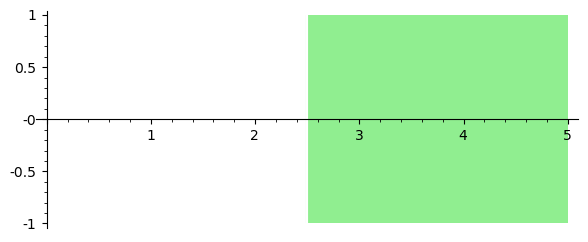

In [39]:
_.plot()